In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # Para formatear los ejes
from scipy.stats import norm

#### Se carga el archivo que contiene el dataset

In [2]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 23) #ver todas las columnas
pd.set_option('display.max_rows', 25) #como mucho ver 25 filas

# 1. Observaciones preliminares sobre los datos

#### Algunas observaciones preliminares (adicionales al instructivo de Navent) son:

- Sólo 8 atributos son comunes a todos los valores
- Se podrían renombrar varias columnas
- Podria cambiarse el orden de algunas columnas

In [3]:
df.info() #42 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

No hay filas duplicadas:

In [4]:
len(df.drop_duplicates()) 

240000

#### Con respecto a los tipos de datos:
- id, antiguedad, habitaciones, garages, banos, metroscubiertos, metrostotales, idzonas y precio pueden ser int
- gimnasio, usosmultiples, piscina, escuelascercanas, centroscomercialescercanos pueden ser bool
- fecha se puede pasar a datetime
- tipodepropiedad, ciudad y provincia podrían ser categorías


In [5]:
df.describe()

id     antiguedad   habitaciones        garages  \
count  240000.000000  196445.000000  217529.000000  202235.000000   
mean   149969.382092       8.116114       2.902326       1.546874   
std     86634.579744       9.553830       0.896894       0.853507   
min         1.000000       0.000000       1.000000       0.000000   
25%     74930.750000       0.000000       2.000000       1.000000   
50%    149875.500000       5.000000       3.000000       2.000000   
75%    225016.500000      10.000000       3.000000       2.000000   
max    299999.000000      80.000000      10.000000       3.000000   

               banos  metroscubiertos  metrostotales        idzona  \
count  213779.000000    222600.000000  188533.000000  2.113790e+05   
mean        2.132417       174.016774     176.765145  2.423468e+06   
std         0.912546        98.152950      94.427328  1.056794e+07   
min         1.000000        15.000000      15.000000  2.200000e+01   
25%         1.000000        90.000000     102.000000  2.489000e+04   
50%         2.000000       153.000000     155.000000  5.638300e+04   
75%         3.000000       240.000000     238.000000  8.783800e+04   
max         4.000000       439.000000     439.000000  5.000400e+07   

                 lat            lng       gimnasio  usosmultiples  \
count  116512.000000  116512.000000  240000.000000  240000.000000   
mean       20.696818     -99.509221       0.062475       0.055092   
std         3.137884       9.744143       0.242017       0.228160   
min      -100.886679    -125.859375       0.000000       0.000000   
25%        19.359846    -100.977908       0.000000       0.000000   
50%        19.543273     -99.240387       0.000000       0.000000   
75%        20.740005     -99.134777       0.000000       0.000000   
max        83.026219     121.036000       1.000000       1.000000   

             piscina  escuelascercanas  centroscomercialescercanos  \
count  240000.000000     240000.000000               240000.000000   
mean        0.087383          0.444142                    0.396533   
std         0.282397          0.496871                    0.489179   
min         0.000000          0.000000                    0.000000   
25%         0.000000          0.000000                    0.000000   
50%         0.000000          0.000000                    0.000000   
75%         0.000000          1.000000                    1.000000   
max         1.000000          1.000000                    1.000000   

             precio  
count  2.400000e+05  
mean   2.530838e+06  
std    2.152552e+06  
min    3.100000e+05  
25%    9.527725e+05  
50%    1.850000e+06  
75%    3.390000e+06  
max    1.252500e+07

En cuanto a los datos que son strings, hay todo tipo de inconsistencias

In [6]:
df[['direccion', 'descripcion', 'titulo']]

direccion  \
0       Avenida Division del Norte 2005   
1                            AV. MEXICO   
2                           Urbi Tonala   
3         IGNACIO MANUEL ALTAMIRANO 128   
4                       PASEOS DEL SOL    
...                                 ...   
239995                          BOSQUES   
239996              Filiberto Navas 325   
239997                 Nicolas San Juan   
239998            Javier Rojo Gomez 120   
239999                        AVE. STIM   

                                              descripcion  \
0       depto. interior de 80.15m2, consta de sala com...   
1       <p>entre sonora y guerrero, atr&aacute;s del h...   
2       descripcion \nla mejor ubicacion residencial e...   
3       casa en privada con caseta de vigilancia casas...   
4       bonito departamento en excelentes condiciones ...   
...                                                   ...   
239995  vendo casa en bosques de ica residencial a 10 ...   
239996  casa con un jardin amplio, un cuarto de servic...   
239997  departamento con excelente ubicación, muy cerc...   
239998  casa sola, dividida en cuatro departamentos de...   
239999  id:19816, muy bonito e iluminado departamento,...   

                                                   titulo  
0                                       depto. tipo a-402  
1                          condominio horizontal en venta  
2                   casa en venta urbi 3 recamaras tonala  
3       casa sola en toluca zinacantepec con credito i...  
4                                          paseos del sol  
...                                                   ...  
239995  bonita casas de 2 recamaras a 10 minutos del c...  
239996  casa en condominio a 10 min. del centro de toluca  
239997                                   nicolas san juan  
239998                      casa sola. javier rojo gomez.  
239999  departamento en bosques de las lomas  / av. st...  

[240000 rows x 3 columns]

Todos los precios parecen ser enteros

In [7]:
df['precio'].sample(10)

109715     743916.0
135565    1750000.0
52887     8300000.0
1517       900000.0
196704    2370000.0
69161     1600000.0
132171    5800000.0
231928    1829000.0
26285      380000.0
209368    4850000.0
Name: precio, dtype: float64

#### Se cambian los nombres y se reordenan en un nuevo dataframe

In [8]:
nombresNuevos = {
                 'id' : 'ID',
                 'titulo' : 'Titulo',
                 'descripcion' : 'Descripcion',
                 'tipodepropiedad' : 'TipoPropiedad',
                 'direccion' : 'Direccion',
                 'ciudad' : 'Ciudad',
                 'provincia' : 'Provincia',
                 'antiguedad' : 'Antiguedad',
                 'habitaciones' : 'CantHabitaciones',
                 'garages' : 'CantGarages',
                 'banos' : 'CantBanos',
                 'metroscubiertos' : 'MetrosCuadradosCubiertos',
                 'metrostotales' : 'MetrosCuadradosTotales',
                 'idzona' : 'IDZona',
                 'lat' : 'Latitud',
                 'lng' : 'Longitud',
                 'fecha' : 'Fecha',
                 'gimnasio' : 'TieneGimnasio',
                 'usosmultiples' : 'TieneUsosMultiples',
                 'piscina' : 'TienePileta',
                 'escuelascercanas' : 'TieneEscuelasCerca',
                 'centroscomercialescercanos' : 'TieneShoppingsCerca',
                 'precio' : 'Precio'
                
}

dfok = df.rename(columns = nombresNuevos)

In [9]:
nombresEnOrden = [
                 'ID',
                 'Titulo',
                 'TipoPropiedad',
                 'Precio',
                 'Fecha',
                 'Antiguedad',
                 'MetrosCuadradosCubiertos',
                 'MetrosCuadradosTotales',
                 'Descripcion',
                 
                 'CantHabitaciones',
                 'CantGarages',
                 'CantBanos',
               
                 'IDZona',
                 'Direccion',
                 'Ciudad',
                 'Provincia',
                 'Latitud',
                 'Longitud',
                 
                 'TieneGimnasio',
                 'TieneUsosMultiples',
                 'TienePileta',
                 'TieneEscuelasCerca',
                 'TieneShoppingsCerca'
    ]                 

dfok = dfok[nombresEnOrden]
dfok.head()

ID                                             Titulo  \
0  254099                                  depto. tipo a-402   
1   53461                     condominio horizontal en venta   
2  247984              casa en venta urbi 3 recamaras tonala   
3  209067  casa sola en toluca zinacantepec con credito i...   
4  185997                                     paseos del sol   

        TipoPropiedad     Precio                Fecha  Antiguedad  \
0         Apartamento  2273000.0  2015-08-23 00:00:00         NaN   
1  Casa en condominio  3600000.0  2013-06-28 00:00:00        10.0   
2                Casa  1200000.0  2015-10-17 00:00:00         5.0   
3                Casa   650000.0  2012-03-09 00:00:00         1.0   
4         Apartamento  1150000.0  2016-06-07 00:00:00        10.0   

   MetrosCuadradosCubiertos  MetrosCuadradosTotales  \
0                      80.0                    80.0   
1                     268.0                   180.0   
2                     144.0                   166.0   
3                      63.0                    67.0   
4                      95.0                    95.0   

                                         Descripcion  CantHabitaciones  \
0  depto. interior de 80.15m2, consta de sala com...               2.0   
1  <p>entre sonora y guerrero, atr&aacute;s del h...               3.0   
2  descripcion \nla mejor ubicacion residencial e...               3.0   
3  casa en privada con caseta de vigilancia casas...               2.0   
4  bonito departamento en excelentes condiciones ...               2.0   

   CantGarages  CantBanos   IDZona                        Direccion  \
0          1.0        2.0  23533.0  Avenida Division del Norte 2005   
1          2.0        2.0  24514.0                       AV. MEXICO   
2          2.0        2.0  48551.0                      Urbi Tonala   
3          1.0        1.0  53666.0    IGNACIO MANUEL ALTAMIRANO 128   
4          1.0        1.0  47835.0                  PASEOS DEL SOL    

                   Ciudad         Provincia    Latitud   Longitud  \
0           Benito Juárez  Distrito Federal        NaN        NaN   
1  La Magdalena Contreras  Distrito Federal  19.310205 -99.227655   
2                  Tonalá           Jalisco        NaN        NaN   
3            Zinacantepec    Edo. de México  19.301890 -99.688015   
4                 Zapopan           Jalisco        NaN        NaN   

   TieneGimnasio  TieneUsosMultiples  TienePileta  TieneEscuelasCerca  \
0            0.0                 0.0          0.0                 0.0   
1            0.0                 0.0          0.0                 1.0   
2            0.0                 0.0          0.0                 0.0   
3            0.0                 0.0          0.0                 1.0   
4            0.0                 0.0          0.0                 0.0   

   TieneShoppingsCerca  
0                  0.0  
1                  1.0  
2                  0.0  
3                  1.0  
4                  0.0

Se adecuan los tipos de datos en el nuevo dataframe para los tipos de datos que no tienen NaNs

In [10]:
#int
dfok['ID'] = dfok['ID'].astype(np.uint32)
dfok['Precio'] = dfok['Precio'].astype(np.uint32)

# Booleanos
dfok['TieneGimnasio'] = dfok['TieneGimnasio'].astype(np.bool)
dfok['TieneUsosMultiples'] = dfok['TieneUsosMultiples'].astype(np.bool)
dfok['TienePileta'] = dfok['TienePileta'].astype(np.bool)
dfok['TieneEscuelasCerca'] = dfok['TieneEscuelasCerca'].astype(np.bool)
dfok['TieneShoppingsCerca'] = dfok['TieneShoppingsCerca'].astype(np.bool)

# Fecha
dfok['Fecha'] = dfok['Fecha'].astype('datetime64')

#### Hay muchas filas que contienen una cantidad mayor de metros cubiertos que de metros totales, pero si se mira la descripción se ve que esto no es un error: es sólo una nomenclatura confusa.

In [11]:
pd.options.display.max_colwidth = 1000 ## Ver strings largos
dfok[ ( dfok['MetrosCuadradosCubiertos'] > dfok['MetrosCuadradosTotales'] ) & ( dfok['ID'] >= 47890 ) ].head()

ID                                  Titulo       TipoPropiedad  \
1    53461          condominio horizontal en venta  Casa en condominio   
12   47890  hermosa casa en zibata queretaro 170m²                Casa   
13  130216      casa matias romero - sión bancaria                Casa   
14  181436             casa en venta en valle real                Casa   
21  224513              casa en venta en querétaro  Casa en condominio   

     Precio      Fecha  Antiguedad  MetrosCuadradosCubiertos  \
1   3600000 2013-06-28        10.0                     268.0   
12  1500000 2013-08-12         0.0                     170.0   
13  3000000 2015-03-31        20.0                     227.0   
14  5300000 2014-11-25         NaN                     250.0   
21  2300000 2016-02-01         NaN                     181.0   

    MetrosCuadradosTotales  \
1                    180.0   
12                   141.0   
13                   185.0   
14                   231.0   
21                   150.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Descripcion  \
1   <p>entre sonora y guerrero, atr&aacute;s del hospital &aacute;ngeles del pedregal, en excelente estado de conservaci&oacute;n, construida en 3 niveles, estacionamiento para 2 autos, 3 rec&aacute;maras con pisos de madera natural la principal con vestidor y ba&ntilde;o, 2 ba&ntilde;os completos pisos y muros de loseta espa&ntilde;ola, canceler&iacute;a de aluminio, 2 medios ba&ntilde;os, cocina integral con piso de loseta espa&ntilde;ola, sala de t.v., sala con piso de loseta espa&ntilde;ola, vest&iacute;bulo, comedor con piso de madera, l&iacute;nea telef&oacute;nica, terraza techada con policarbonato puede ser antecomedor, cuarto de servicio con piso de loseta, fachada con policarbonato..&nbsp; 4 casas</p>   
12                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            <p><strong>casa </strong>en venta en fraccionamiento con campo de golf <strong>zibat&aacute;</strong>, 141.4 m de terreno, 170 m de construcci&oacute;n, en esquina, jardin de 98 m, 3 recamaras, 2 1/2 ba&ntilde;os, cocina, cochera 2 autos.</p>   
13                                                   flamante casa habitación en condominio horizontal, desarrollada en 3 niveles. planta baja: estancia, comedor, cocina con desayunador, sala, cuarto de tv, 3 recamaras, 2 baños completos, patio de servicio, cuarto de servicio con baño, estacionamiento para 2 vehículos con cochera semicubierta; ubicada en la calle matías romero, colonia del valle.  la mejor zona de méxico. 3 niveles, cochera, condominio horizontal. 227 m2 construcción 185 m2 terreno etapa - emplazamiento entrega - 36 meses solo pagos de contado.  garantía de entrega**invierte 3 ya que su valor comercial es de $6. los remates bancarios son una gran opción de sión y no representan riesgo alguno.   
14                                                                                                   

In [12]:
pd.options.display.max_colwidth = 100 # Volver a strings más cortos 

# 2. Análisis

## 2.1. Generalidades

En un primer acercamiento, se estudian distribuciones sin un hilo conductor concreto, y se hacen algunas preguntas de interés general

### 2.1.1. ¿Cuándo se publican más propiedades?

<BarContainer object of 7 artists>

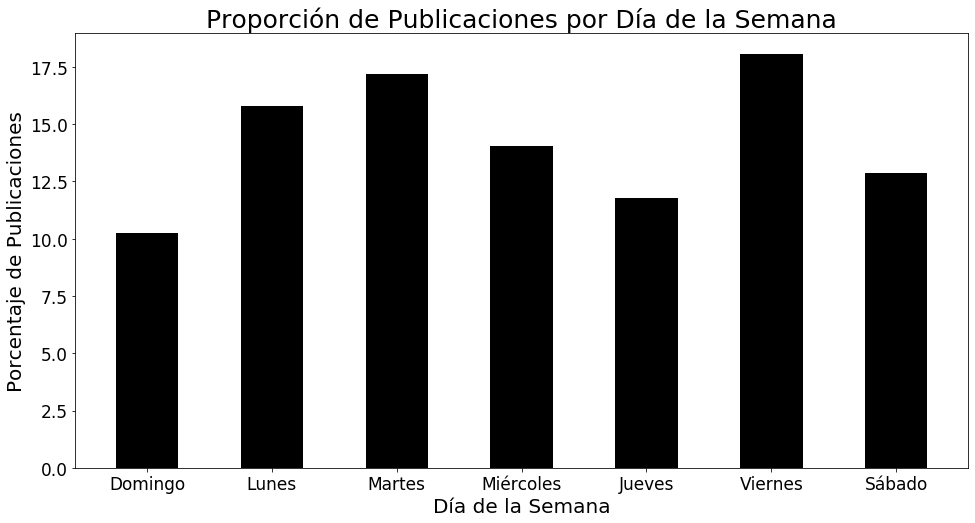

In [13]:
cantPub = [ 
             dfok[ dfok['Fecha'].dt.dayofweek == 6 ]['ID'].count() / 240000 * 100,
            dfok[ dfok['Fecha'].dt.dayofweek == 0 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 1 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 2 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 3 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 4 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.dayofweek == 5 ]['ID'].count()  / 240000 * 100
          ]

dias = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']

dfdias = pd.DataFrame()
dfdias['Días'] = dias
dfdias['Pubs'] = cantPub

# Variables a graficar
x = dias
y = cantPub

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Porcentaje de Publicaciones", fontsize = 20);
plt.xlabel("Día de la Semana", fontsize = 20);

# Título
plt.title("Proporción de Publicaciones por Día de la Semana", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black', width = 0.5)

<BarContainer object of 12 artists>

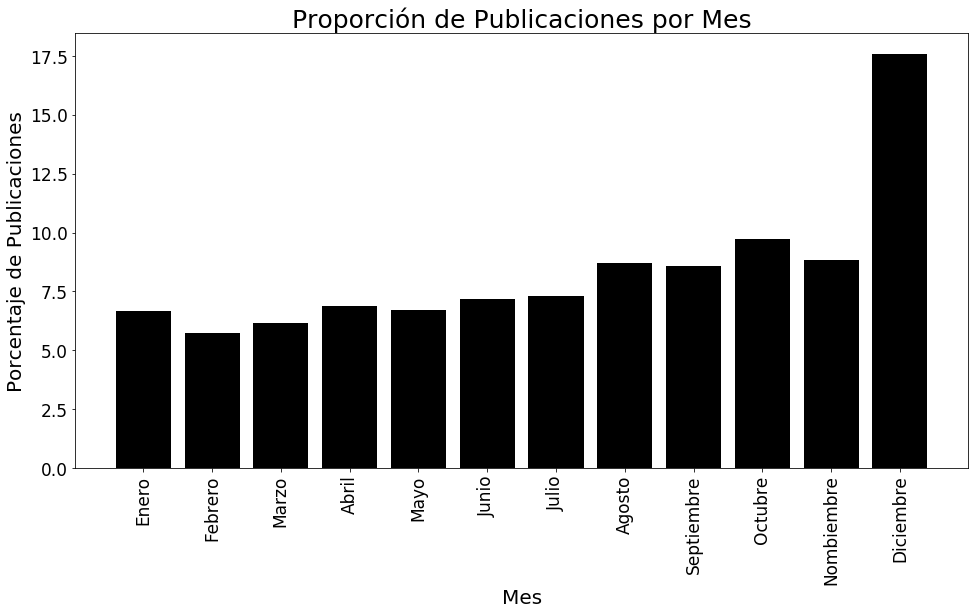

In [14]:
cantPub = [ 
            dfok[ dfok['Fecha'].dt.month == 1 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 2 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 3 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 4 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 5 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 6 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 7 ]['ID'].count() / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 8 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 9 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 10 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 11 ]['ID'].count()  / 240000 * 100,
           dfok[ dfok['Fecha'].dt.month == 12 ]['ID'].count()  / 240000 * 100
          ]

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Nombiembre', 'Diciembre']

# Variables a graficar
x = meses
y = cantPub

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Porcentaje de Publicaciones", fontsize = 20);
plt.xlabel("Mes", fontsize = 20);

# Título
plt.title("Proporción de Publicaciones por Mes", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Tipo de gráfico
plt.bar(x, y, color = 'black')

<BarContainer object of 31 artists>

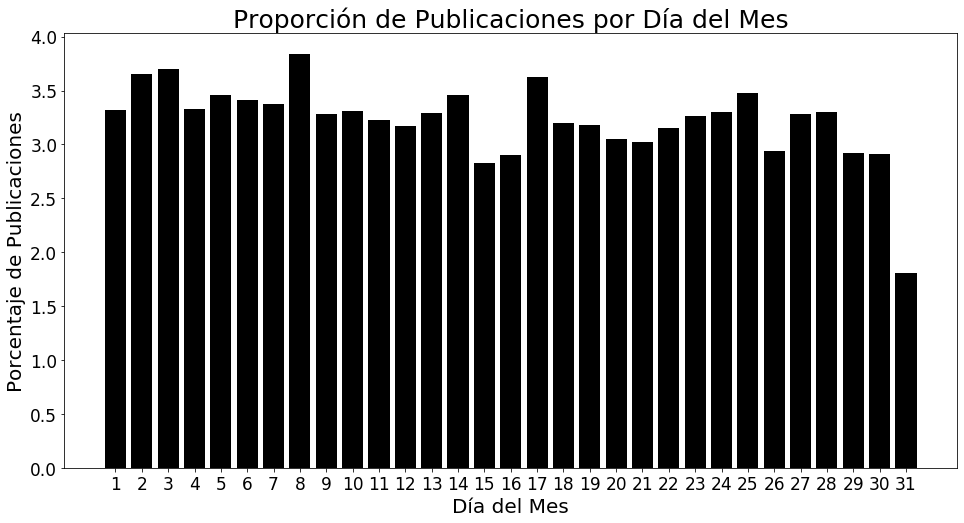

In [15]:
cantPub = [ ]
dias = []

for i in range(1, 32):
    cantPub.append( dfok[ dfok['Fecha'].dt.day == i ]['ID'].count() / 240000 * 100 )
    dias.append( str(i) ) 

# Variables a graficar
x = dias
y = cantPub

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Porcentaje de Publicaciones", fontsize = 20);
plt.xlabel("Día del Mes", fontsize = 20);

# Título
plt.title("Proporción de Publicaciones por Día del Mes", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Tipo de gráfico
plt.bar(x, y, color = 'black')

No se aprecian tendencias claras, excepto la de una tendencia al aumento a lo largo del año de la cantidad de publicaciones, con auge en Diciembre. Para confirmar este comportamiento, se realiza un análisis complementario.

### 2.1.2. ¿Cómo evolucionó la cantidad de propiedades publicadas con el tiempo?

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


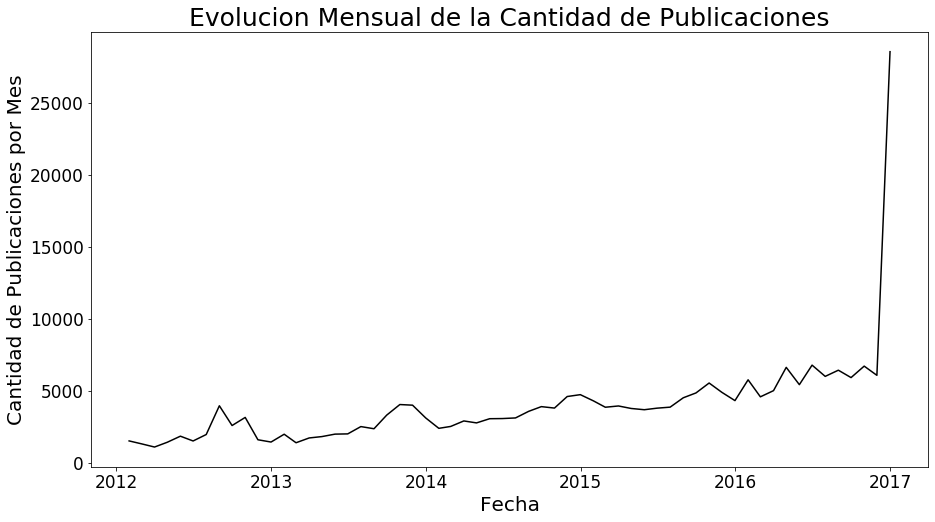

In [16]:
df_pubmes = dfok.copy()
df_pubmes["Fecha"] = df_pubmes["Fecha"].astype('datetime64')
df_pubmes.index = df_pubmes["Fecha"]
df_pubmes = pd.DataFrame(df_pubmes.resample('M').size()).reset_index()
df_pubmes = df_pubmes.rename(columns={0:"Cantidad"})
plt.figure(figsize=(15,8))
plt.plot("Fecha", "Cantidad", data=df_pubmes, color="black")
plt.title("Evolucion Mensual de la Cantidad de Publicaciones", fontsize=25)

plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Cantidad de Publicaciones por Mes", fontsize=20);

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

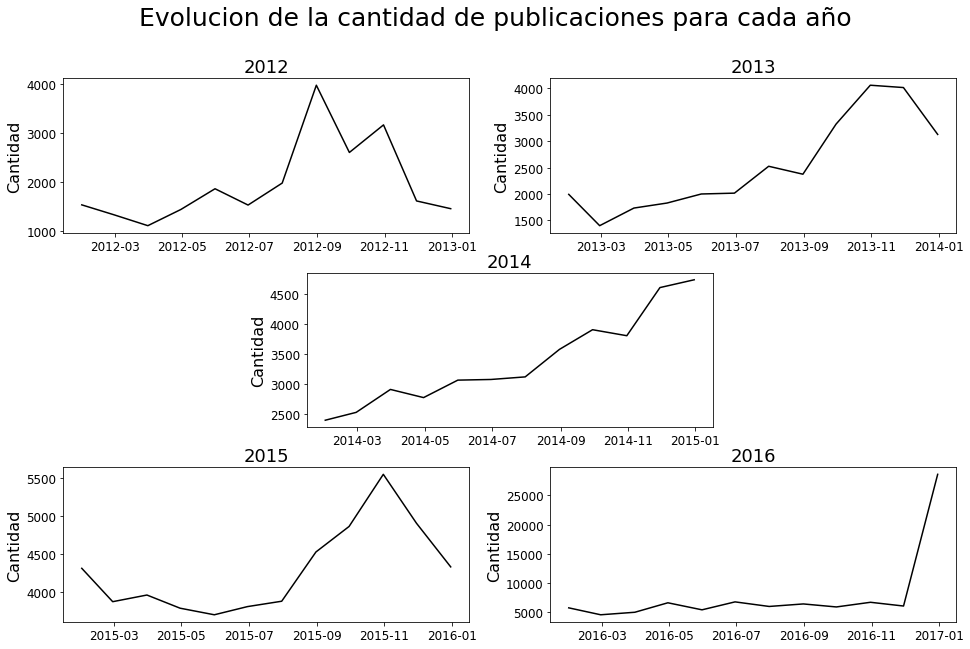

In [17]:
df_pub_an = dfok.copy()
df_pub_an["Fecha"] = df_pub_an["Fecha"].astype('datetime64')
df_pub_an.index = df_pub_an["Fecha"]
df_pub_an = pd.DataFrame(df_pub_an.resample('M').size())
pub_12 = df_pub_an["2012-01-01":"2013-01-01"].reset_index()
pub_13 = df_pub_an["2013-01-01":"2014-01-01"].reset_index()
pub_14 = df_pub_an["2014-01-01":"2015-01-01"].reset_index()
pub_15 = df_pub_an["2015-01-01":"2016-01-01"].reset_index()
pub_16 = df_pub_an["2016-01-01":"2017-01-01"].reset_index()
pub_12 = pub_12.rename(columns={0:"Cantidad"})
pub_13 = pub_13.rename(columns={0:"Cantidad"})
pub_14 = pub_14.rename(columns={0:"Cantidad"})
pub_15 = pub_15.rename(columns={0:"Cantidad"})
pub_16 = pub_16.rename(columns={0:"Cantidad"})

fig = plt.figure(figsize=(16,10))
grid = plt.GridSpec(6, 4, hspace=0.7, wspace=0.5)
pubs_12 = fig.add_subplot(grid[:2, 0:2])
pubs_13 = fig.add_subplot(grid[:2, 2:])
pubs_14 = fig.add_subplot(grid[2:4, 1:3])
pubs_15 = fig.add_subplot(grid[4:6, 0:2])
pubs_16 = fig.add_subplot(grid[4:6, 2:4])


pubs_12.plot("Fecha", "Cantidad", data=pub_12, color="black")
pubs_13.plot("Fecha", "Cantidad", data=pub_13, color="black")
pubs_14.plot("Fecha", "Cantidad", data=pub_14, color="black")
pubs_15.plot("Fecha", "Cantidad", data=pub_15, color="black")
pubs_16.plot("Fecha", "Cantidad", data=pub_16, color="black")

pubs_12.title.set_text("2012")
pubs_13.title.set_text("2013")
pubs_14.title.set_text("2014")
pubs_15.title.set_text("2015")
pubs_16.title.set_text("2016")

pubs_12.title.set_size(18)
pubs_13.title.set_size(18)
pubs_14.title.set_size(18)
pubs_15.title.set_size(18)
pubs_16.title.set_size(18)


pubs_12.set_ylabel("Cantidad", fontsize=16)
pubs_13.set_ylabel("Cantidad", fontsize=16)
pubs_14.set_ylabel("Cantidad", fontsize=16)
pubs_15.set_ylabel("Cantidad", fontsize=16)
pubs_16.set_ylabel("Cantidad", fontsize=16)

pubs_12.tick_params(axis='both', which='major', labelsize = 12)
pubs_12.tick_params(axis='both', which='minor', labelsize = 12)

pubs_13.tick_params(axis='both', which='major', labelsize = 12)
pubs_13.tick_params(axis='both', which='minor', labelsize = 12)

pubs_14.tick_params(axis='both', which='major', labelsize = 12)
pubs_14.tick_params(axis='both', which='minor', labelsize = 12)

pubs_15.tick_params(axis='both', which='major', labelsize = 12)
pubs_15.tick_params(axis='both', which='minor', labelsize = 12)

pubs_16.tick_params(axis='both', which='major', labelsize = 12)
pubs_16.tick_params(axis='both', which='minor', labelsize = 12)


fig.suptitle('Evolucion de la cantidad de publicaciones para cada año', size=25);

(array([736299., 736303., 736307., 736311., 736315., 736319., 736323.,
        736327., 736330.]), <a list of 9 Text xticklabel objects>)

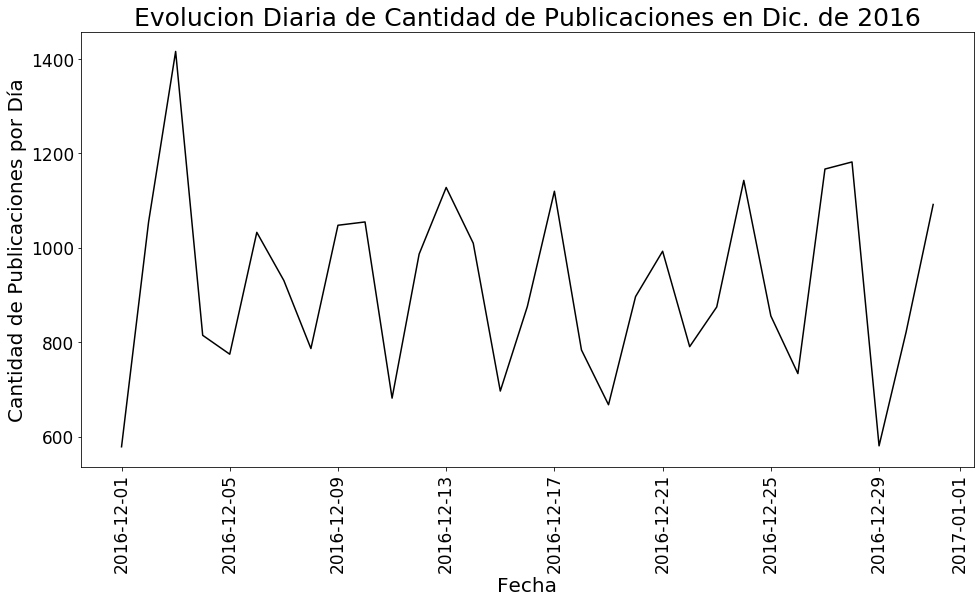

In [18]:
df_pubdic = dfok.copy()
df_pubdic["Fecha"] = df_pubdic["Fecha"].astype('datetime64')
df_pubdic.index = df_pubdic["Fecha"]
df_pubdic = df_pubdic.sort_index()
df_pubdic = df_pubdic["2016-12-01 00:00:00":"2017-01-02 00:00:00"]
df_pubdic = pd.DataFrame(df_pubdic.resample('D').size()).reset_index()
df_pubdic = df_pubdic.rename(columns={0:"Cantidad"})
plt.figure(figsize=(16,8))
plt.plot("Fecha", "Cantidad", data=df_pubdic, color="black")
plt.title("Evolucion Diaria de Cantidad de Publicaciones en Dic. de 2016", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Cantidad de Publicaciones por Día", fontsize=20);


# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

Efectivamente, hay una tendencia a que la cantidad de publicaciones aumente más bien en la última parte del año. Un caso partticularmente interesante es el de 2016, donde la cantidad de publicaciones tiene un pico notable en diciembre.

En general, la cantidad de publicaciones a lo largo del período estudiado va en aumento.

### 2.1.3. ¿Cómo evolucionó la proporción de tipo de propiedad según la fecha de publicación?

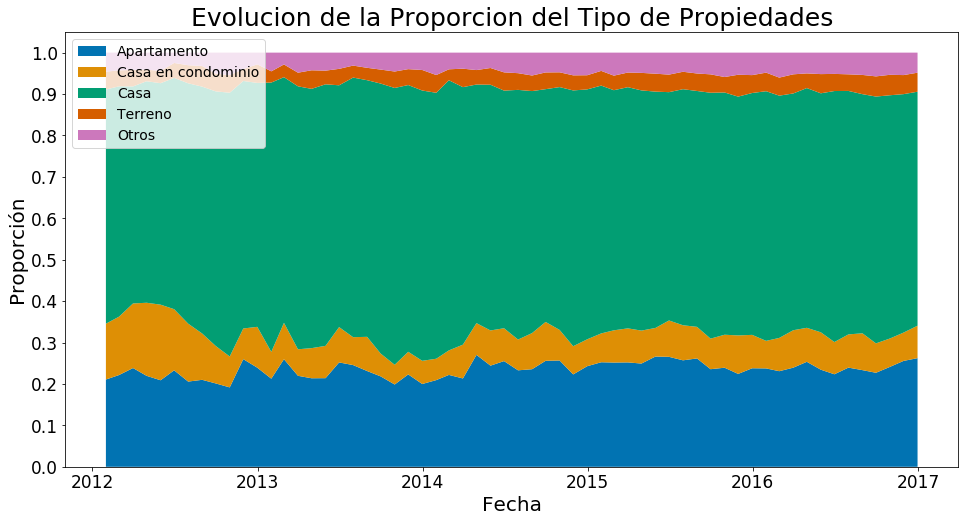

In [19]:
df_pp = dfok.copy()

df_pp["Fecha"] = df_pp["Fecha"].astype('datetime64')

df_pp.index = df_pp["Fecha"]

df_pp = df_pp[["TipoPropiedad"]]

for e in df_pp["TipoPropiedad"].unique():
    df_pp[e] = (df_pp["TipoPropiedad"] == e).apply(int)

df_pp = df_pp.drop("TipoPropiedad", axis=1)

df_pp["Otros"] = sum([df_pp[c] for c in df_pp.columns if c not in ["Apartamento", "Casa en condominio", "Casa", "Terreno"]])

df_pp = df_pp[["Apartamento", "Casa en condominio", "Casa", "Terreno", "Otros"]]

df_pp = df_pp.resample('M').sum()

df_perc = df_pp.divide(df_pp.sum(axis=1), axis=0)

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
paleta = sb.color_palette("colorblind")
plt.stackplot(df_pp.index,
              [df_perc[colu] for colu in df_perc.columns],
              labels=[colu for colu in df_perc.columns], colors=paleta)
# plt.xticks([i for i in range(0, 81, 5)])
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Proporción", fontsize=20)
plt.yticks([i for i in np.arange(0,1.1,0.1)])
plt.title("Evolucion de la Proporcion del Tipo de Propiedades", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

plt.legend(loc='upper left', fontsize=14);

### 2.1.4. ¿Cómo se distribuyen las propiedades según su cantidad de habitaciones?

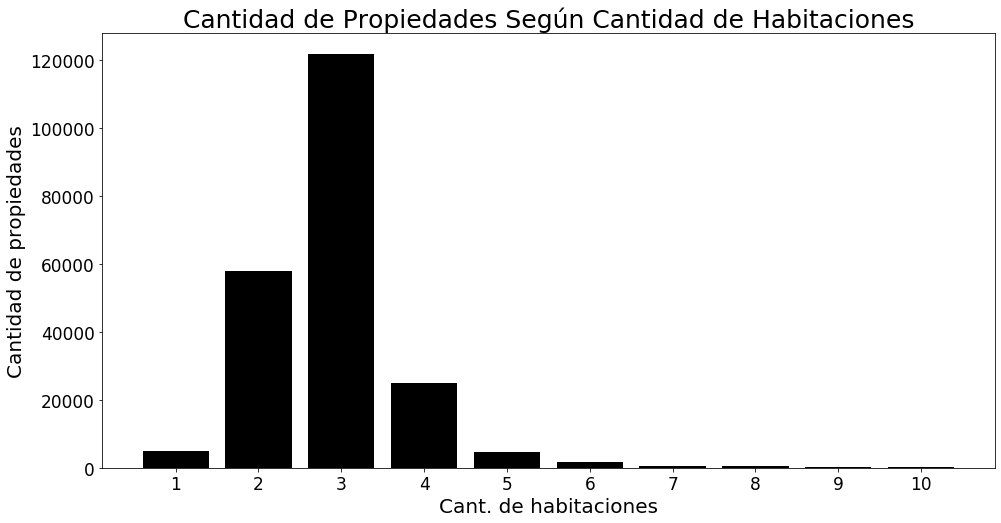

In [20]:
df_hab = dfok.groupby("CantHabitaciones").size()
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
plt.bar(df_hab.index, df_hab.values, color = 'black')
plt.xlabel("Cant. de habitaciones", fontsize =20)
plt.ylabel("Cantidad de propiedades",fontsize=20)
plt.xticks([i for i in range(1,11)])
plt.title("Cantidad de Propiedades Según Cantidad de Habitaciones", fontsize=25
         );

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

### 2.1.5. ¿Cómo se distribuyen las propiedades respecto de su antigüedad?

In [21]:
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)
(dfok.groupby('Antiguedad').count()/240000)['ID']


Antiguedad
0.0     0.209729
1.0     0.051471
2.0     0.021079
3.0     0.023400
4.0     0.033100
5.0     0.138617
6.0     0.013204
7.0     0.008525
8.0     0.010075
9.0     0.004437
10.0    0.120183
11.0    0.005975
12.0    0.006217
13.0    0.002404
14.0    0.002567
15.0    0.016521
16.0    0.002917
17.0    0.002204
18.0    0.003783
19.0    0.001296
20.0    0.082933
21.0    0.003092
22.0    0.001867
23.0    0.001271
24.0    0.001125
25.0    0.009571
26.0    0.001538
27.0    0.001329
28.0    0.001650
29.0    0.000817
30.0    0.012729
31.0    0.000475
32.0    0.000821
33.0    0.000679
34.0    0.000438
35.0    0.003908
36.0    0.000412
37.0    0.000358
38.0    0.000596
39.0    0.000267
40.0    0.005613
41.0    0.000112
42.0    0.000250
43.0    0.000179
44.0    0.000175
45.0    0.001371
46.0    0.000129
47.0    0.000167
48.0    0.000150
49.0    0.000071
50.0    0.004971
51.0    0.000192
52.0    0.000046
53.0    0.000071
54.0    0.000037
55.0    0.000158
56.0    0.000013
57.0    0.000017
58.

In [22]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 23) #ver todas las columnas
pd.set_option('display.max_rows', 25) #como mucho ver 25 filas

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

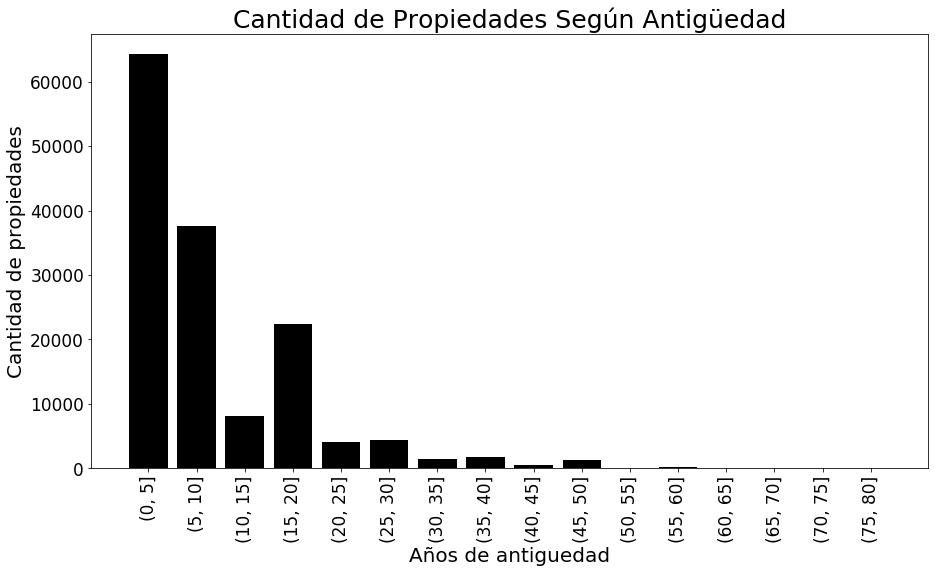

In [23]:
bins = pd.cut(dfok["Antiguedad"], [i for i in range(0, 81, 5)])
df_ant = dfok.groupby(bins).size()
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
plt.bar(df_ant.index.astype(str), df_ant.values, color = 'black')
plt.xlabel("Años de antiguedad", fontsize=20)
plt.ylabel("Cantidad de propiedades",fontsize=20)
plt.title("Cantidad de Propiedades Según Antigüedad", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
plt.xticks(rotation = 90)


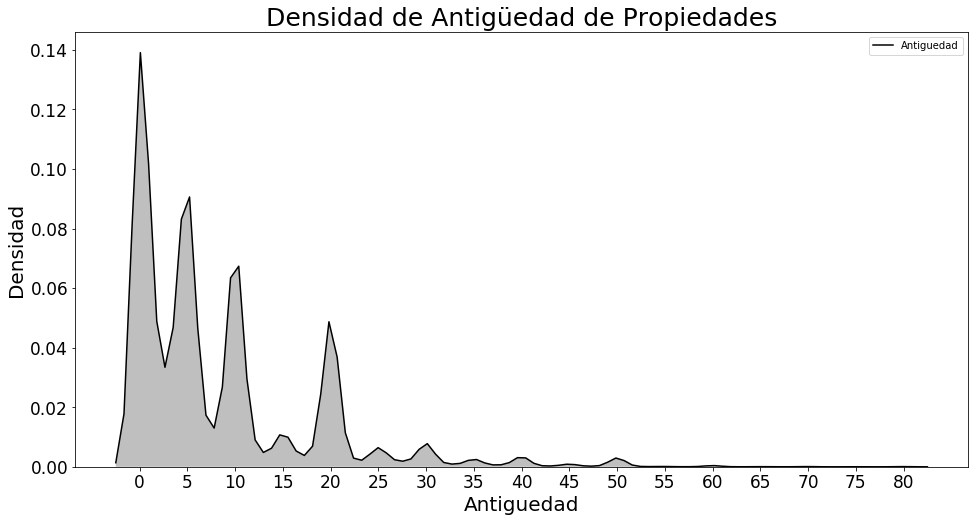

In [24]:
df_ant = dfok[pd.notnull(dfok["Antiguedad"])] # Dropeo los que son Nan para poder hacer el grafico de densidad

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.kdeplot(df_ant['Antiguedad'], shade=True, color = 'black')
plt.xticks([i for i in range(0, 81, 5)])
plt.xlabel("Antiguedad", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Antigüedad de Propiedades", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)


La mayoria de las propiedades tienen una antiguedad relativamente baja(0-10 años).
 
Parece haber una preponderancia de valores que sean multiplos de 10 o de 5 con menor frecuencia (es decir, 20 años por sobre 19 o 21, 30 por sobre 29, 28 o 31, 15 por sobre 14 o 13, etc)

### 2.1.6. ¿Cómo se distribuyen las propiedades según su cantidad de metros cuadrados?

In [25]:
len(dfok[pd.notnull(dfok["MetrosCuadradosCubiertos"])]) / len(dfok)

0.9275

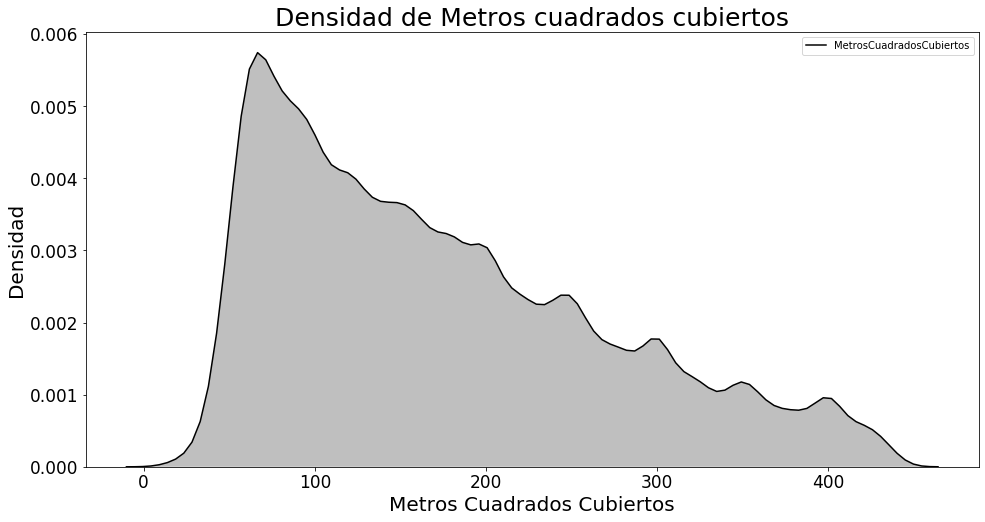

In [26]:
# Se eliminan los que son Nan para poder hacer el grafico de densidad
# siendo menos de un 10%
df_ant = dfok[pd.notnull(dfok["MetrosCuadradosCubiertos"])]

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.kdeplot(df_ant['MetrosCuadradosCubiertos'], shade=True, color = 'black')
# plt.xticks([i for i in range(0, 81, 5)])

plt.xlabel("Metros Cuadrados Cubiertos", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Metros cuadrados cubiertos", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
#ax.legend(fontsize=15);

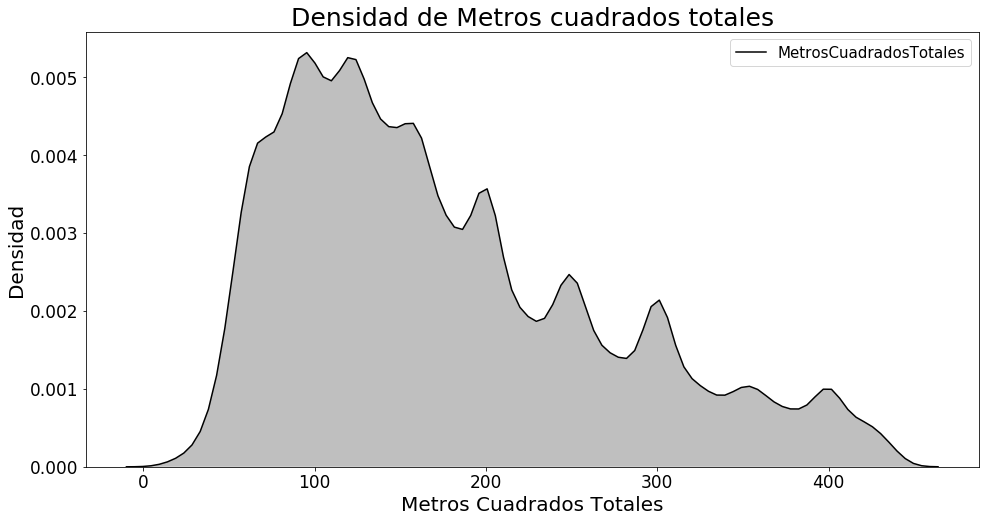

In [27]:
df_ant = dfok[pd.notnull(dfok["MetrosCuadradosTotales"])] # Dropeo los que son Nan para poder hacer el grafico de densidad

fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.kdeplot(df_ant['MetrosCuadradosTotales'], shade=True, color = 'black')
# plt.xticks([i for i in range(0, 81, 5)])
plt.xlabel("Metros Cuadrados Totales", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Metros cuadrados totales", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
ax.legend(fontsize=15);

Se puede apreciar que la mayoria de las propiedades en ambos graficos caen en el rango de 0 - 150 metros, curiosamente la distribucion de metros cuadrados cubiertos parece alcanzar su pico y luego decrecer de manera casi lineal a medida que aumentan los metros.

Tambien en ambos graficos se puede ver que hay unos pequeños picos en valores multiplos de 50 como los son 150, 200, 250, 300 metros, etc. 

## 2.2. Estudio por Provincia

### 2.2.1. ¿En qué zonas se publican más propiedades?

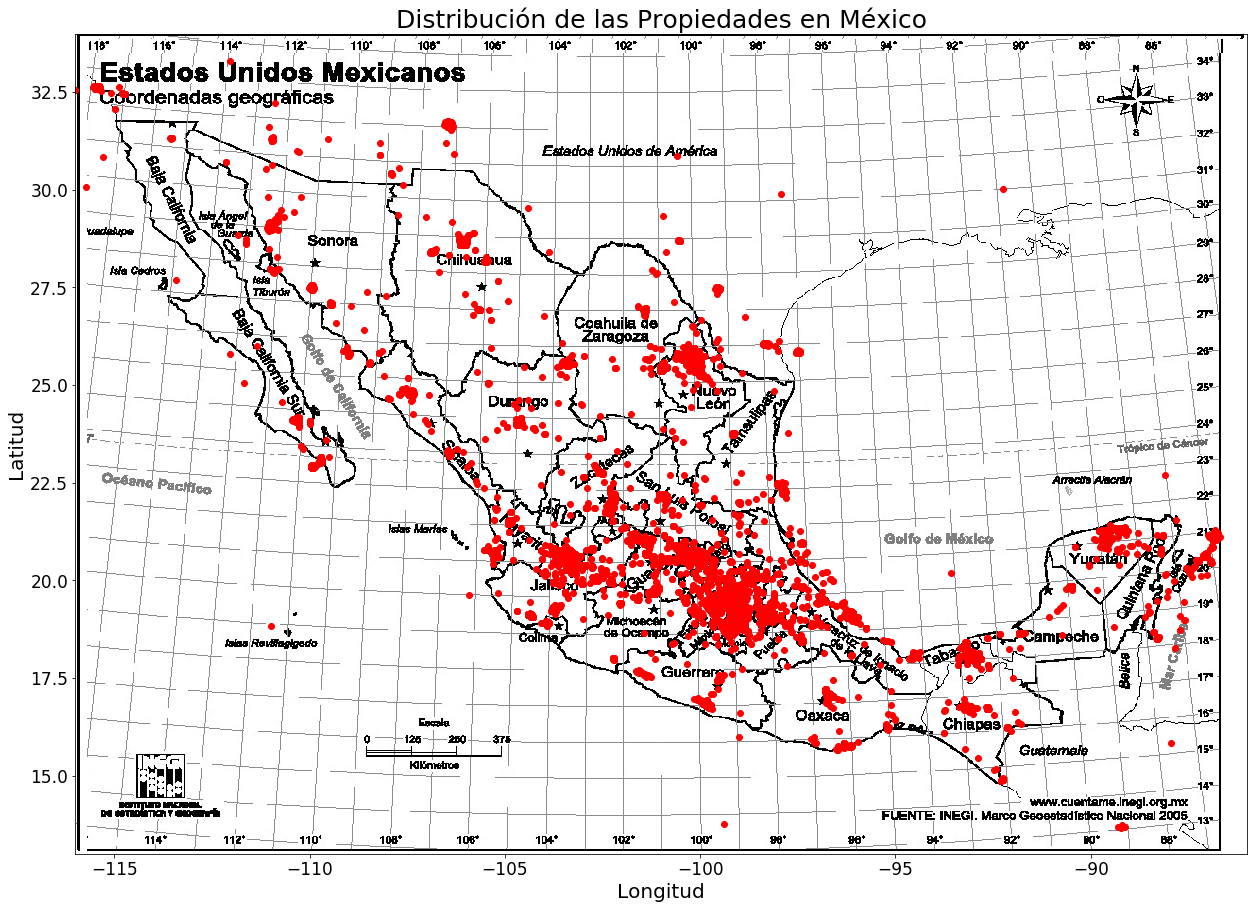

In [28]:
# Declarás variables a graficar
x = dfok['Longitud']
y = dfok['Latitud']

# Tamaño del gráfico
grafico, ax = plt.subplots(figsize = (21, 16));


img = plt.imread("mex.png")
ax.imshow(img, extent = [-116, -86, 13, 34])

# Tamaño de los títulos de los ejes
plt.xlabel("Longitud", fontsize = 20);
plt.ylabel("Latitud", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades en México", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Límites para cada coordenada
plt.ylim([13, 34]);
plt.xlim([-116, -86]);

# Tipo de gráficok
plt.scatter(x, y, color = "red");


<BarContainer object of 32 artists>

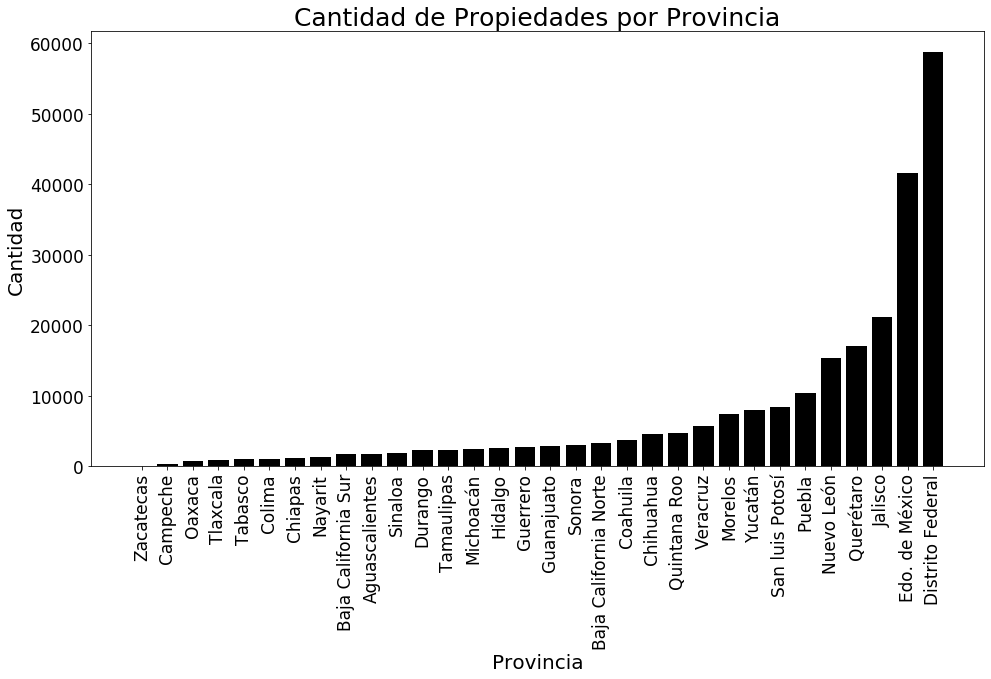

In [29]:
''' ¿Cuáles propiedades son más caras en promedio? '''

dfPorPropiedad = pd.DataFrame()
dfPorPropiedad['Provincia'] = pd.Series( dfok['Provincia'].unique(), index = dfok['Provincia'].unique() )
dfPorPropiedad['Precio'] = dfok.groupby('Provincia').count()['Precio']

dfPorPropiedad = dfPorPropiedad.dropna()
dfPorPropiedad['Precio'] = dfPorPropiedad['Precio'].astype(np.uint32)
dfPorPropiedad['Provincia'] = dfPorPropiedad['Provincia'].astype('category')
dfPorPropiedad = dfPorPropiedad.sort_values(['Precio'])

# Variables a graficar
x = dfPorPropiedad['Provincia']
y = dfPorPropiedad['Precio']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Provincia", fontsize = 20);
plt.ylabel("Cantidad", fontsize = 20);

# Título
plt.title("Cantidad de Propiedades por Provincia", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
plt.bar(x, y, color = 'black')


México está en el hemisferio norte, por lo que la latitud debe ser positiva, ademas está al oeste del meridiano de Greenwich, por lo que su longitud debe ser negativa

### 2.2.2. ¿Dónde están las propiedades más caras y más baratas?

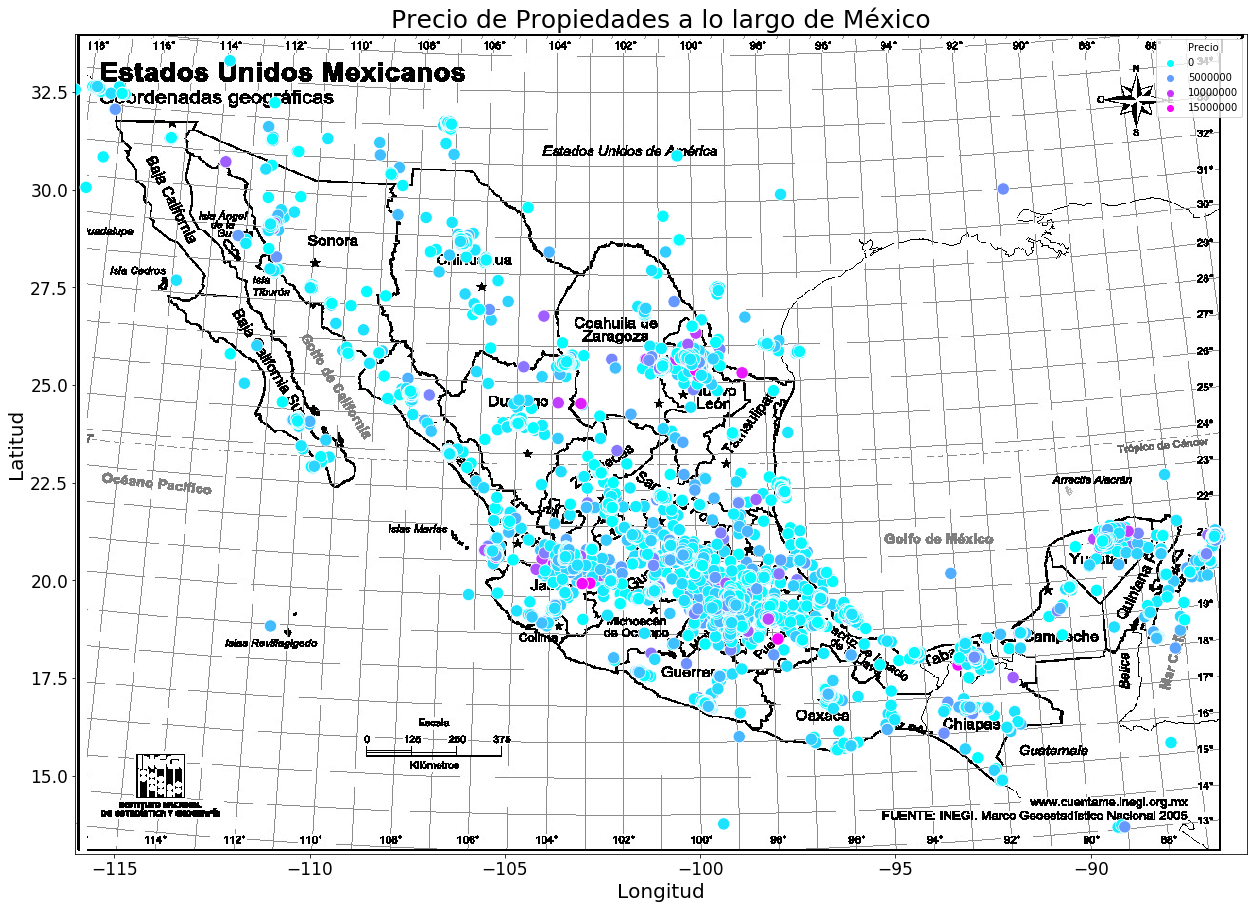

In [30]:
dfnuevo = pd.DataFrame()
dfnuevo['Longitud'] =  dfok['Longitud']
dfnuevo['Latitud'] = dfok['Latitud']
dfnuevo['Precio'] = dfok['Precio']

dfnuevo = dfnuevo.dropna()

grafico, ax = plt.subplots(figsize = (21, 16));

# Límites para cada coordenada
img = plt.imread("mex.png")
ax.imshow(img, extent = [-116, -86, 13, 34])

# Tamaño de los títulos de los ejes
plt.xlabel("Longitud", fontsize = 20);
plt.ylabel("Latitud", fontsize = 20);

# Título
plt.title("Precio de Propiedades a lo largo de México", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Límites para cada coordenada
plt.ylim([13, 34]);
plt.xlim([-116, -86]);

#cmap = sb.cubehelix_palette(dark = .3, light = .7, as_cmap = True)
#cmap = sb.color_palette(as_cmap = True)
#cmap = sb.color_palette("Paired", n_colors = dfnuevo['Precio'].nunique()) ##ESTE

#Cajita
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

#cmap = sb.hls_palette( len( dfnuevo['Precio'] ) )
cmap = plt.get_cmap("cool")
ax = sb.scatterplot(x = 'Longitud', y = 'Latitud', hue = 'Precio', palette = cmap, data = dfnuevo, s = 150)



<BarContainer object of 27 artists>

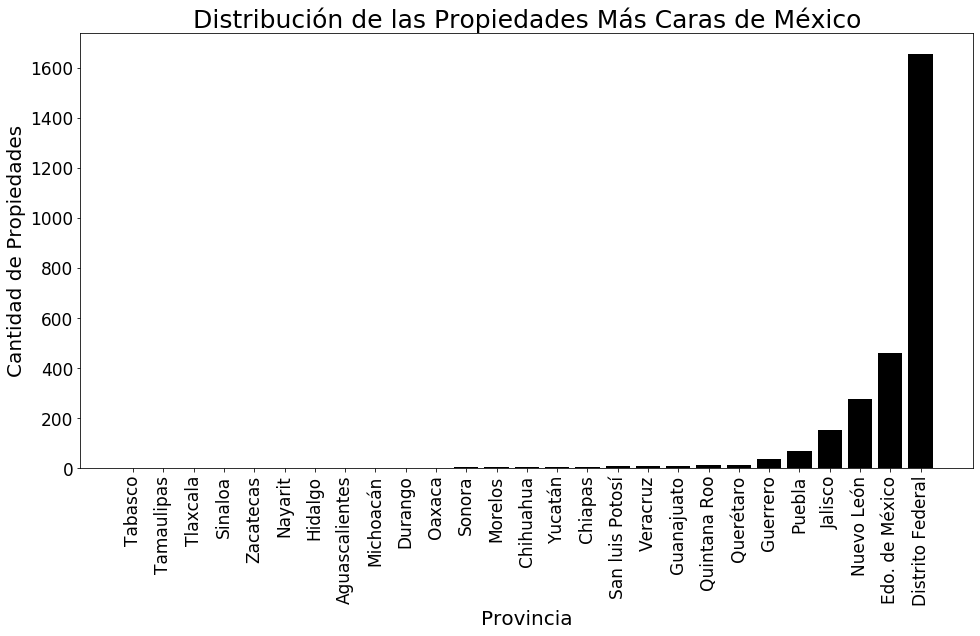

In [31]:
dflatlong = pd.DataFrame()
dflatlong['Provincia'] = pd.Series( dfok[ dfok['Precio'] > 10000000]['Provincia'].unique(), 
                                index = dfok[ dfok['Precio'] > 10000000]['Provincia'].unique() )

dflatlong['Cantidad'] = dfok[ dfok['Precio'] > 10000000].groupby('Provincia')['ID'].count()

# dfok[ dfok['Precio'] > 10000000].count() / len( dfok[ dfok['Precio'] > 10000000] ) #Casi no se pierde ninguno
dflatlong = dflatlong.dropna() 
dflatlong = dflatlong.sort_values(['Cantidad'])

# Variables a graficar
x = dflatlong['Provincia']
y = dflatlong['Cantidad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.xlabel("Provincia", fontsize = 20);
plt.ylabel("Cantidad de Propiedades", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades Más Caras de México", fontsize = 25)
#Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
# mp.rcParams.update( { 'axes.titlesize':'30' } )

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
    #ldt = np.poly1d( np.polyfit(x, y, 1) )
    #plt.plot(x, ldt(x), "g")
    
# Cajita indicadora de colores 
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

# Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)



<BarContainer object of 32 artists>

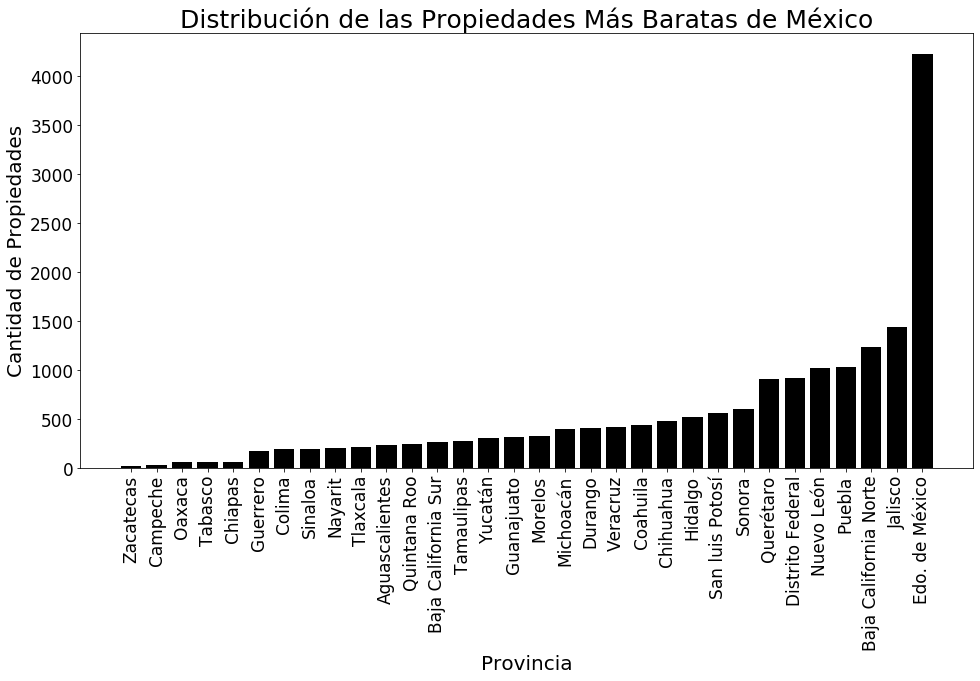

In [32]:
dflatlong = pd.DataFrame()
dflatlong['Provincia'] = pd.Series( dfok[ dfok['Precio'] < 500000]['Provincia'].unique(), 
                                index = dfok[ dfok['Precio'] < 500000]['Provincia'].unique() )

dflatlong['Cantidad'] = dfok[ dfok['Precio'] < 500000].groupby('Provincia')['ID'].count()

# dfok[ dfok['Precio'] < 500000].count() / len( dfok[ dfok['Precio'] > 10000000] ) #Casi no se pierde ninguno
dflatlong = dflatlong.dropna() 
dflatlong = dflatlong.sort_values(['Cantidad'])

# Variables a graficar
x = dflatlong['Provincia']
y = dflatlong['Cantidad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.xlabel("Provincia", fontsize = 20);
plt.ylabel("Cantidad de Propiedades", fontsize = 20);

# Título
plt.title("Distribución de las Propiedades Más Baratas de México", fontsize = 25)
#Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
# mp.rcParams.update( { 'axes.titlesize':'30' } )

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
    #ldt = np.poly1d( np.polyfit(x, y, 1) )
    #plt.plot(x, ldt(x), "g")
    
# Cajita indicadora de colores 
#plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

# Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)



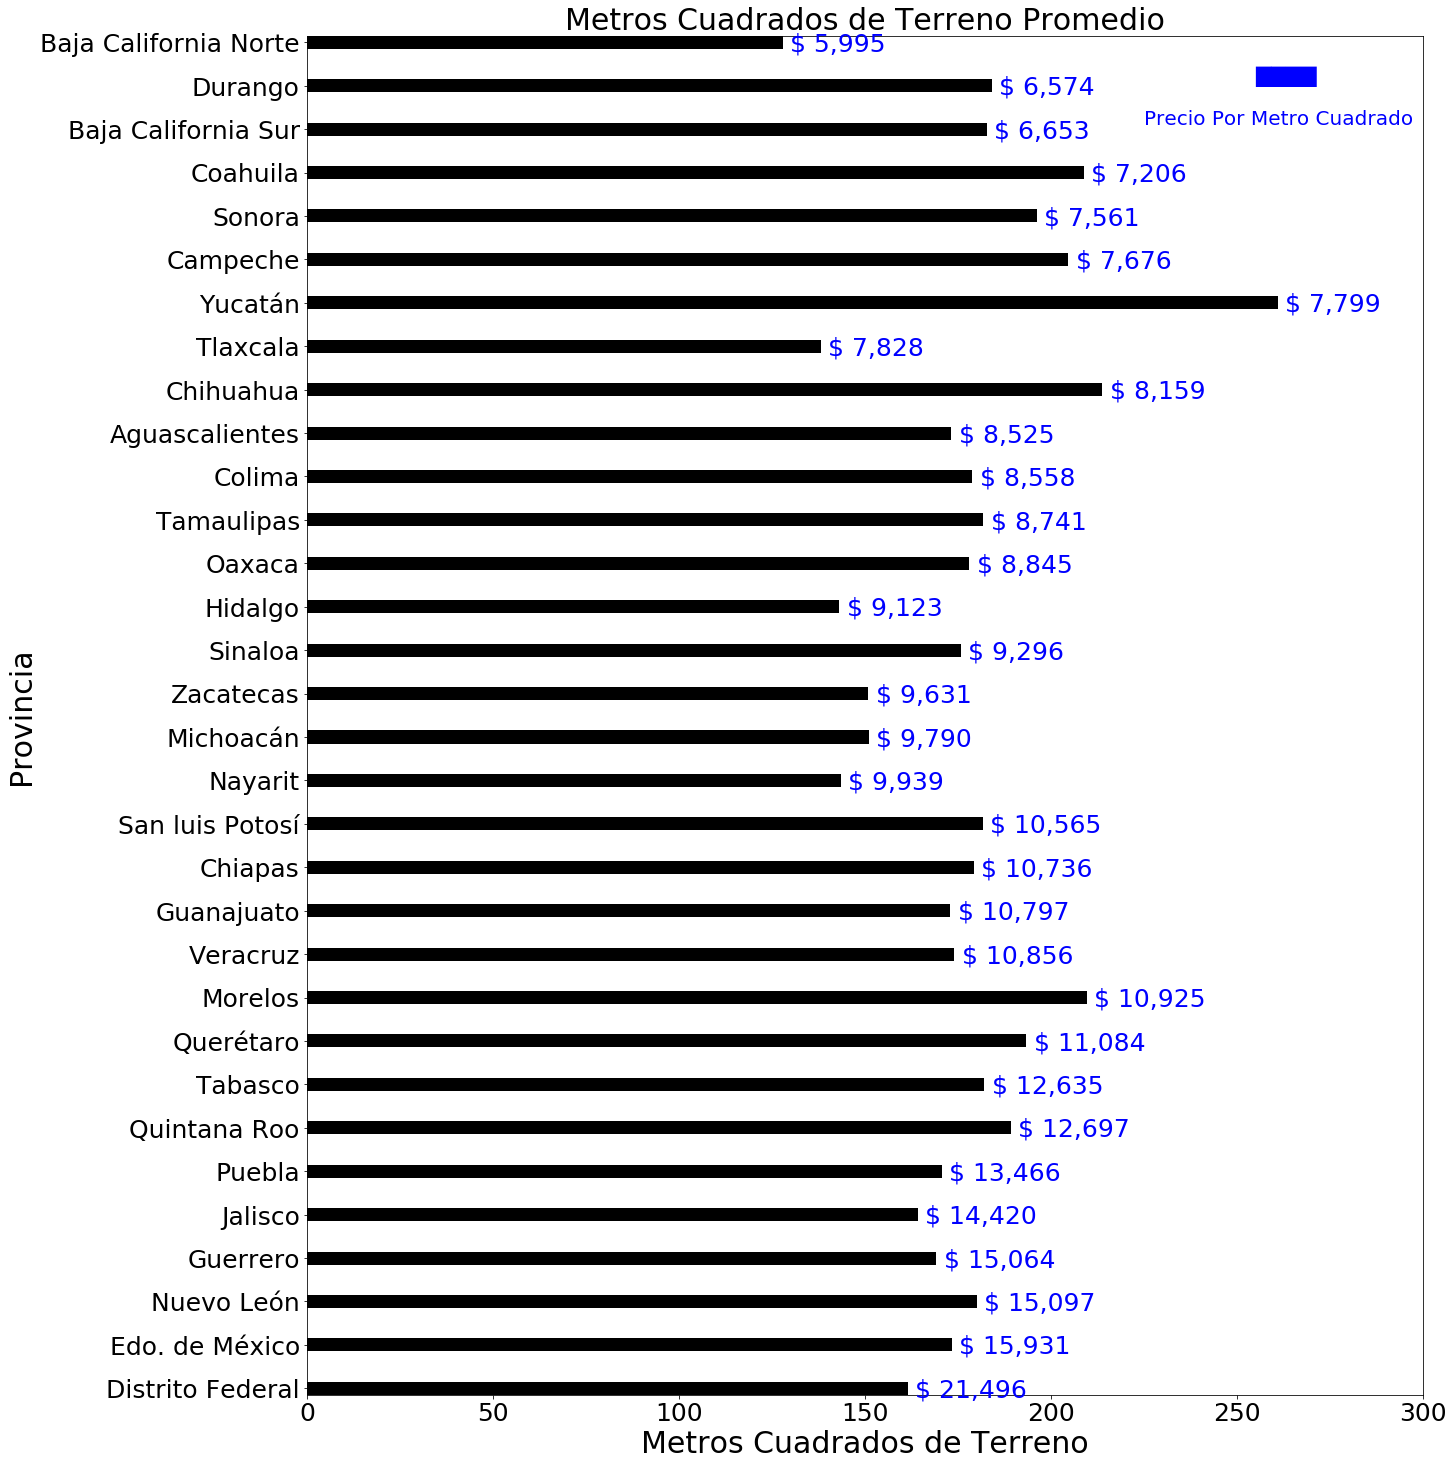

In [33]:
def analizarporm2(tipom, titulo, xaxis):
    dfms = pd.DataFrame()
    dfms['Provincia'] = dfok['Provincia'].dropna().sort_values().unique()
    dfms['MetrosTerreno'] = dfok.groupby('Provincia').mean()[tipom].to_list()
    dfms['PPPM2'] = ( dfok.sort_values('Provincia').groupby('Provincia')['Precio'].mean() /     \
           dfok.sort_values('Provincia').groupby('Provincia')[tipom].mean()
           ).to_list()

    dfms = dfms.sort_values('PPPM2')

    x = np.arange(len(dfms['Provincia']))

    ancho = 0.3
    fig, ax = plt.subplots(figsize = (20, 25))
    plt.barh(x, dfms['MetrosTerreno'], ancho, color = 'black')

    ##########################

    plt.title(titulo, fontsize = 30)

    y = np.arange(len(dfms['Provincia']))

    plt.yticks(y , y + 1)
    ax.set_yticklabels(dfms['Provincia'], fontsize=17)

    plt.xlabel(xaxis, fontsize = 30);
    plt.ylabel("Provincia", fontsize = 30);
    plt.autoscale(tight = True)

    plt.tick_params(axis='both', which='major', labelsize = 25)
    plt.tick_params(axis='both', which='minor', labelsize = 25)
    
    #ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})
    ax.invert_yaxis()

    plt.xlim([0, 300]);

    l = dfms['MetrosTerreno'].to_list()

    ppm2 = dfms['PPPM2'].to_list()

    # Agregar texto en una posición específica
    for i in range( len(dfms['Provincia']) ):
        plt.text(x = l[i] + 2, y = i + 0.2, s = '$ {:,.0f}'.format(ppm2[i]), size = 25, color = 'blue')

    plt.text(x = 255, y = 0.9, s = '████', size = 20, color = 'blue')
    plt.text(x = 225, y = 1.9, s = 'Precio Por Metro Cuadrado', size = 20, color = 'blue')

analizarporm2('MetrosCuadradosTotales', "Metros Cuadrados de Terreno Promedio", "Metros Cuadrados de Terreno")

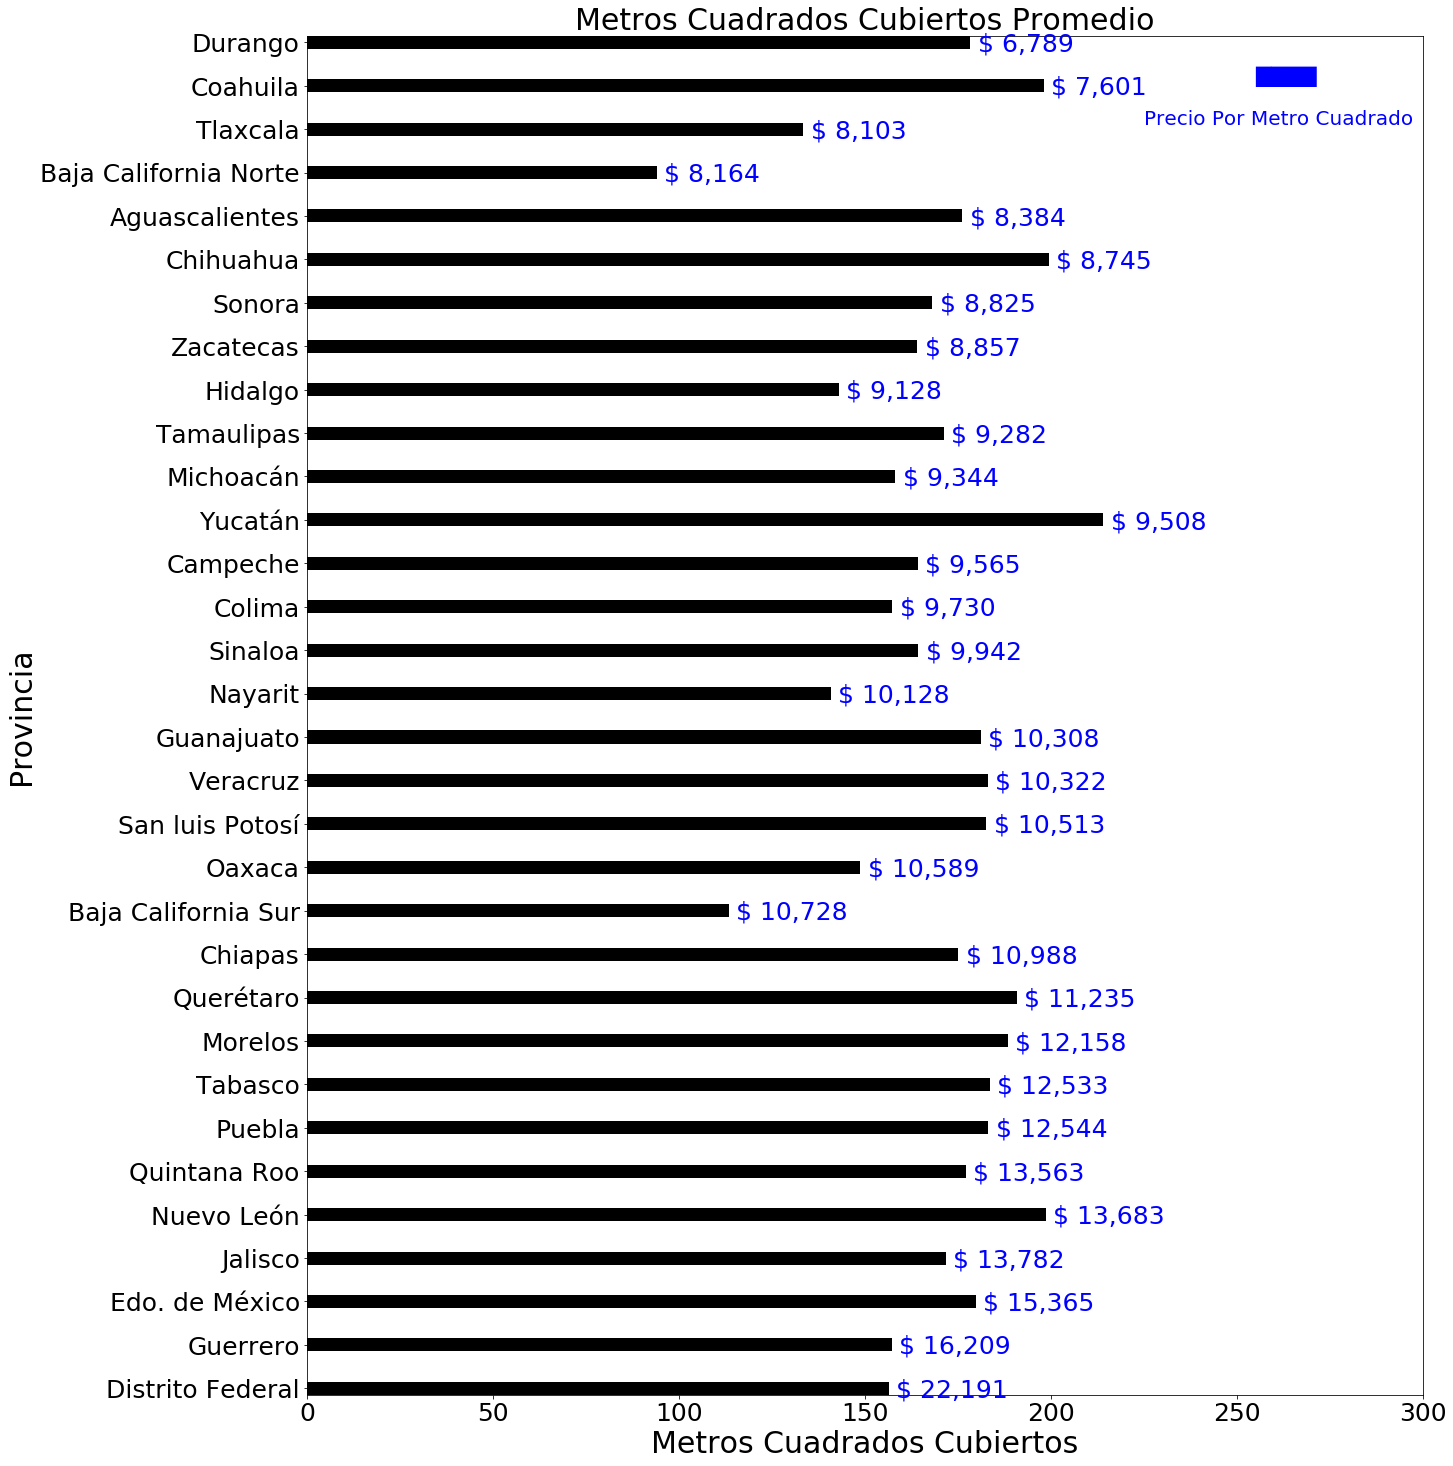

In [34]:
analizarporm2('MetrosCuadradosCubiertos', "Metros Cuadrados Cubiertos Promedio", "Metros Cuadrados Cubiertos")

### 2.2.3. ¿Hay provincias donde se publican más cierto tipo de propiedades?


0.0


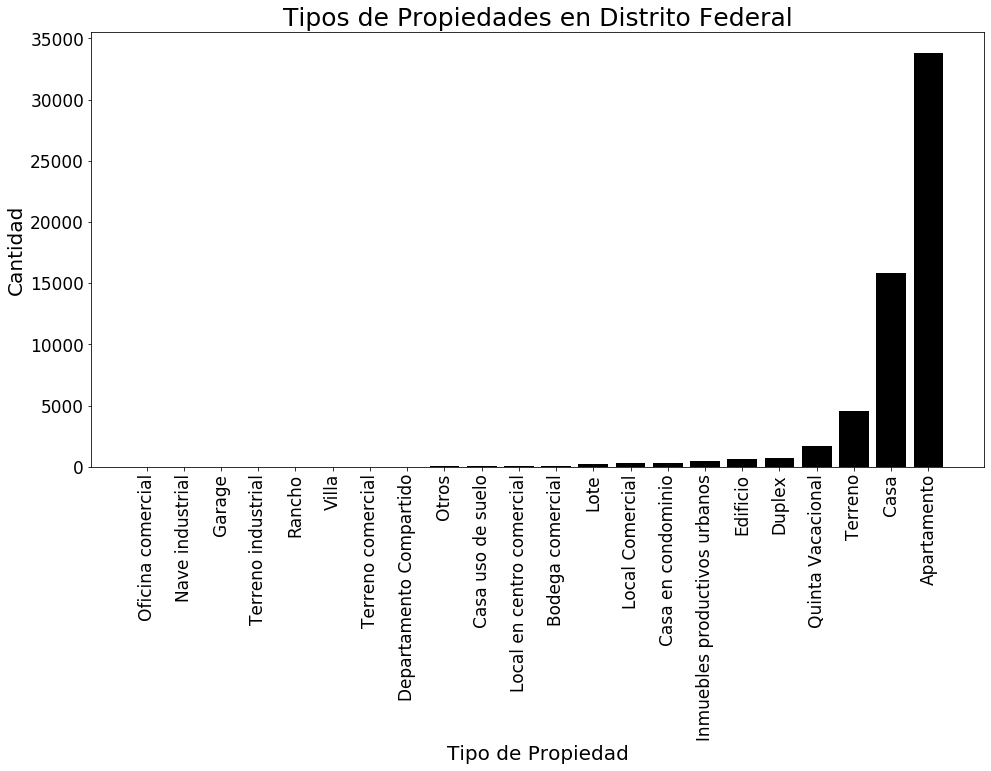

In [35]:
def propiedadesEnProvincia(provincia):
    dfProvincia = dfok[ dfok['Provincia'] == provincia ]

    dfgp = pd.DataFrame()
    
    dfgp['TipoPropiedad'] = dfProvincia['TipoPropiedad'].unique()
   
    dfgp = dfgp.dropna() 
    #Porcentaje de NaN
    print( dfok[ dfok['Provincia'] == provincia].isnull().sum()['TipoPropiedad'] / 
          len(dfok[ dfok['Provincia'] == provincia]['TipoPropiedad']) 
         )


    dfgp['Cantidad'] = dfProvincia.groupby('TipoPropiedad').count()['ID'].to_list()

    dfgp['TipoPropiedad'] = dfgp['TipoPropiedad'].astype('category')
    dfgp = dfgp.sort_values(['Cantidad'])


    x = dfgp['TipoPropiedad'] 
    y = dfgp['Cantidad'] 

    # Tamaño del gráfico
    fig = plt.figure(figsize = (16, 8))

    # Tamaño de los títulos de los ejes
    plt.xlabel("Tipo de Propiedad", fontsize = 20);
    plt.ylabel("Cantidad", fontsize = 20);

    # Título
    plt.title("Tipos de Propiedades en " + provincia, fontsize = 25)
    #Si de esta manera(⬆️) te tira error,hacé :plt.rcParams.update( { 'axes.titlesize':'30' } )
    # mp.rcParams.update( { 'axes.titlesize':'30' } )

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 17)
    plt.tick_params(axis='both', which='minor', labelsize = 17)

    # Rotar ejes
    plt.xticks(rotation = 90)

    # Límites para cada coordenada
    #plt.ylim([13, 34]);
    #plt.xlim([-116, -86]);

    # Tipo de gráfico
    plt.bar(x, y, color = 'black')

    #Línea de regresión
        #ldt = np.poly1d( np.polyfit(x, y, 1) )
        #plt.plot(x, ldt(x), "g")

    # Cajita indicadora de colores 
    #plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 20})

    # Resetear parámetros: plt.rcParams.update(plt.rcParamsDefault)


    ### PARA REVISAR ####
    #dfok[ dfok['Provincia'] == 'Distrito Federal' ].groupby('TipoPropiedad').count()['ID'].sort_values(ascending = False)
    
propiedadesEnProvincia('Distrito Federal')

0.0


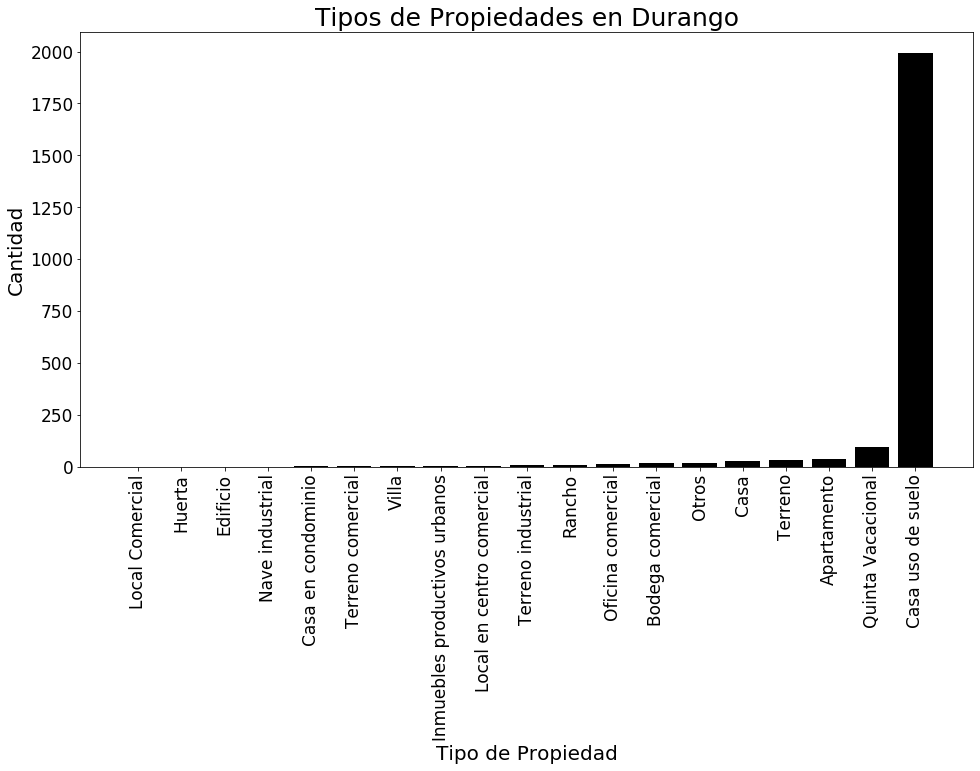

In [36]:
propiedadesEnProvincia('Durango')

In [37]:
def getTiposEn(provincia):
    dfProvincia = dfok[ dfok['Provincia'] == provincia ]

    dfgp = pd.DataFrame()
    
    dfgp['TipoPropiedad'] = dfProvincia['TipoPropiedad'].unique()
   
    dfgp = dfgp.dropna() 

    dfgp['Cantidad'] = dfProvincia.groupby('TipoPropiedad').count()['ID'].to_list()

    dfgp['TipoPropiedad'] = dfgp['TipoPropiedad'].astype('category')
    dfgp = dfgp.sort_values(['Cantidad'])
    
    return dfgp

In [38]:
provincias = dfok['Provincia'].unique()[0:len(dfok['Provincia'].unique()) - 1]
provincias.sort()
for p in provincias:
    df0 = getTiposEn(p)['Cantidad']
    print( df0.max() / df0.sum() )

0.764403879064461
0.8599378881987577
0.8664705882352941
0.7984790874524715
0.8019538188277087
0.8477124183006536
0.9009472259810555
0.7708333333333334
0.5755910869195442
0.8769230769230769
0.6234496683011249
0.8104895104895105
0.5922330097087378
0.8464894882982943
0.6684245220830587
0.8016997167138811
0.6305029303530053
0.7233727810650887
0.7489558861915949
0.7440225035161744
0.6311294501487381
0.6708264657405227
0.49264087468460893
0.6672214956604446
0.8023255813953488
0.9143239625167336
0.7263581488933601
0.7911419887103778
0.8533969010727056
0.7717013888888888
0.8166561514195584
0.851063829787234


En el informe se incluyen los gráficos condensados de todas las provincias, expresados de forma cualitativa.

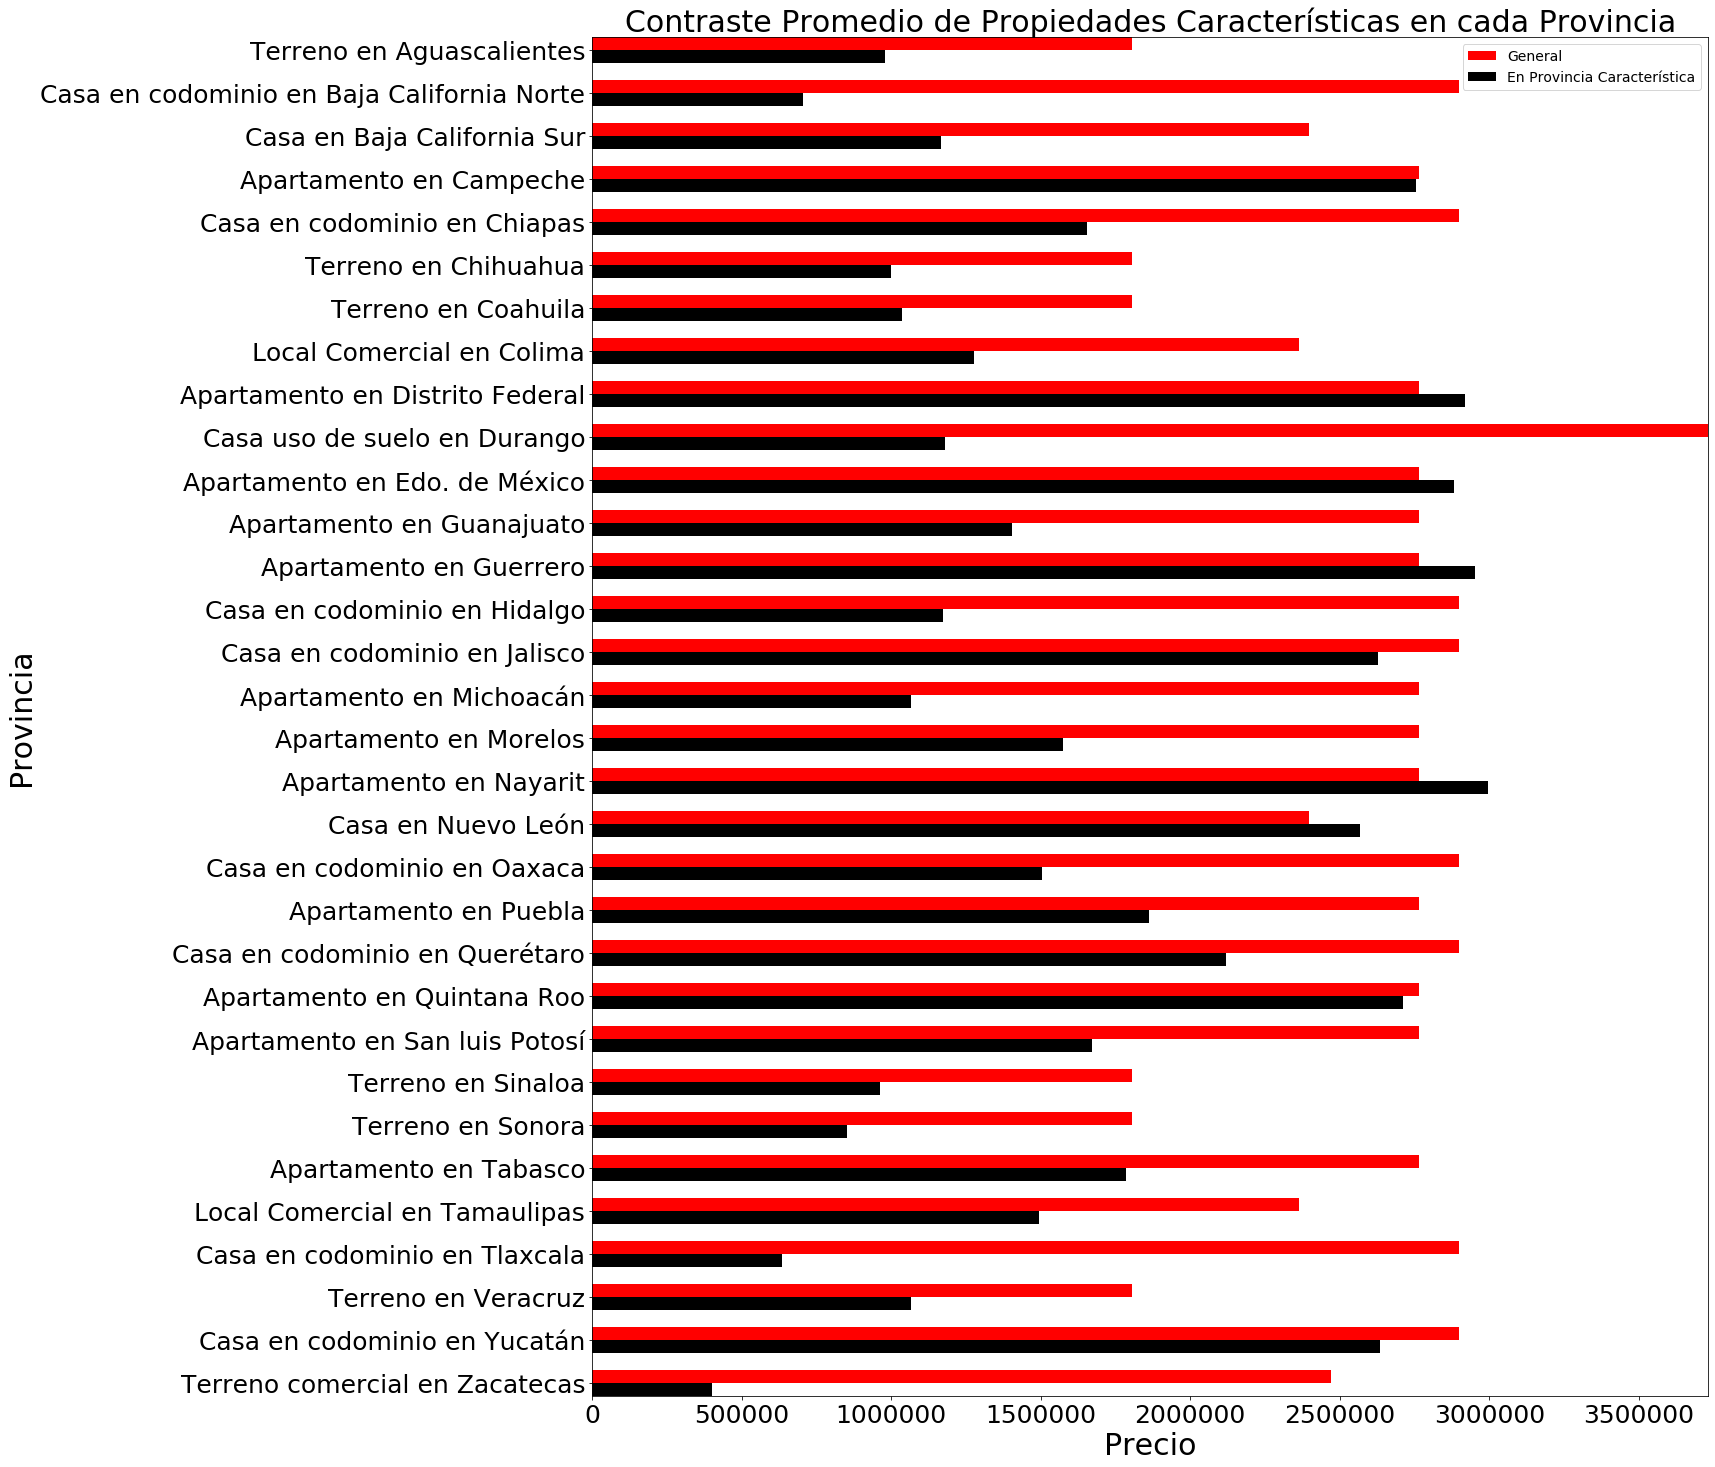

In [39]:
prov = ['Aguascalientes','Baja California Norte',
    'Baja California Sur','Campeche','Chiapas','Chihuahua','Coahuila',
        'Colima','Distrito Federal','Durango','Edo. de México','Guanajuato',
        'Guerrero','Hidalgo','Jalisco','Michoacán','Morelos','Nayarit','Nuevo León',
        'Oaxaca','Puebla','Querétaro','Quintana Roo','San luis Potosí','Sinaloa',
        'Sonora','Tabasco','Tamaulipas','Tlaxcala','Veracruz','Yucatán','Zacatecas' ]

tipo = ['Terreno','Casa en condominio','Casa','Apartamento','Casa en condominio','Terreno','Terreno',
         'Local Comercial','Apartamento','Casa uso de suelo','Apartamento','Apartamento',
         'Apartamento','Casa en condominio','Casa en condominio','Apartamento','Apartamento',
         'Apartamento','Casa','Casa en condominio','Apartamento','Casa en condominio',
         'Apartamento','Apartamento','Terreno','Terreno','Apartamento',
         'Local Comercial','Casa en condominio','Terreno','Casa en condominio','Terreno comercial']

#Promedio de precio en la propiedad especialidad de la
promProv = []

#Promedio de precio por tipo de propiedad
prom = []

for i in range(32):
    promProv.append( dfok[ ( dfok['Provincia'] == prov[i] ) &  ( dfok['TipoPropiedad'] == tipo[i] ) ]['Precio'].mean() )
    prom.append(  dfok[ dfok['TipoPropiedad'] == tipo[i] ]['Precio'].mean() )
    
x = np.arange(len(prov))

ancho = 0.3
fig, ax = plt.subplots(figsize = (20, 25))
plt.barh(x - (ancho/2), prom, ancho, color = 'red', label = 'General')
plt.barh(x + (ancho/2), promProv, ancho, color = 'black', label = 'En Provincia Característica')


prov2 = ['Terreno en Aguascalientes','Casa en codominio en Baja California Norte',
    'Casa en Baja California Sur','Apartamento en Campeche',
	'Casa en codominio en Chiapas','Terreno en Chihuahua','Terreno en Coahuila',
        'Local Comercial en Colima','Apartamento en Distrito Federal',
		'Casa uso de suelo en Durango',
		'Apartamento en Edo. de México','Apartamento en Guanajuato',
        'Apartamento en Guerrero','Casa en codominio en Hidalgo',
		 'Casa en codominio en Jalisco','Apartamento en Michoacán','Apartamento en Morelos'
		 ,'Apartamento en Nayarit','Casa en Nuevo León',
        'Casa en codominio en Oaxaca',
		'Apartamento en Puebla','Casa en codominio en Querétaro',
		'Apartamento en Quintana Roo','Apartamento en San luis Potosí','Terreno en Sinaloa',
        'Terreno en Sonora','Apartamento en Tabasco',
		'Local Comercial en Tamaulipas',
		'Casa en codominio en Tlaxcala','Terreno en Veracruz','Casa en codominio en Yucatán',
		'Terreno comercial en Zacatecas' ]

# Título
plt.title("Contraste Promedio de Propiedades Características en cada Provincia", fontsize = 30)

plt.yticks( np.arange(len(prov2)), np.arange(len(prov2)) + 1)
ax.set_yticklabels(prov2, fontsize=17)

p1 = plt.xlabel("Precio", fontsize = 30);
p2 = plt.ylabel("Provincia", fontsize = 30);
plt.autoscale(tight = True)

plt.tick_params(axis='both', which='major', labelsize = 25)
plt.tick_params(axis='both', which='minor', labelsize = 25)
plt.legend(prop={'size': 14})

ax.invert_yaxis()

## 2.3. Análisis básico de formación del precio

### 2.3.1. ¿Qué tipo de propiedades son más caras en promedio?

<BarContainer object of 24 artists>

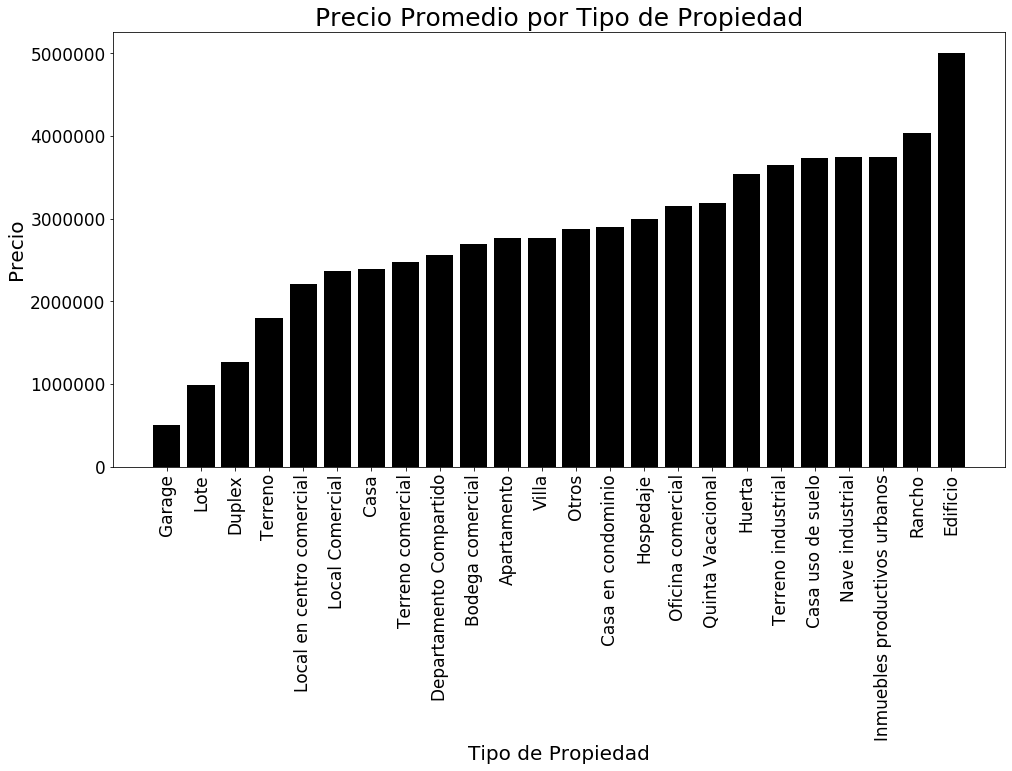

In [40]:
dfPorPropiedad = pd.DataFrame()
dfPorPropiedad['TipoPropiedad'] = pd.Series( dfok['TipoPropiedad'].unique(), index = dfok['TipoPropiedad'].unique() )
dfPorPropiedad['Precio'] = dfok.groupby('TipoPropiedad').mean()['Precio']

dfPorPropiedad = dfPorPropiedad.dropna()
dfPorPropiedad['Precio'] = dfPorPropiedad['Precio'].astype(np.uint32)
dfPorPropiedad['TipoPropiedad'] = dfPorPropiedad['TipoPropiedad'].astype('category')
dfPorPropiedad = dfPorPropiedad.sort_values(['Precio'])

# Variables a graficar
x = dfPorPropiedad['TipoPropiedad']
y = dfPorPropiedad['Precio']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')


# Tamaño de los títulos de los ejes
plt.xlabel("Tipo de Propiedad", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio Promedio por Tipo de Propiedad", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
plt.bar(x, y, color = 'black')


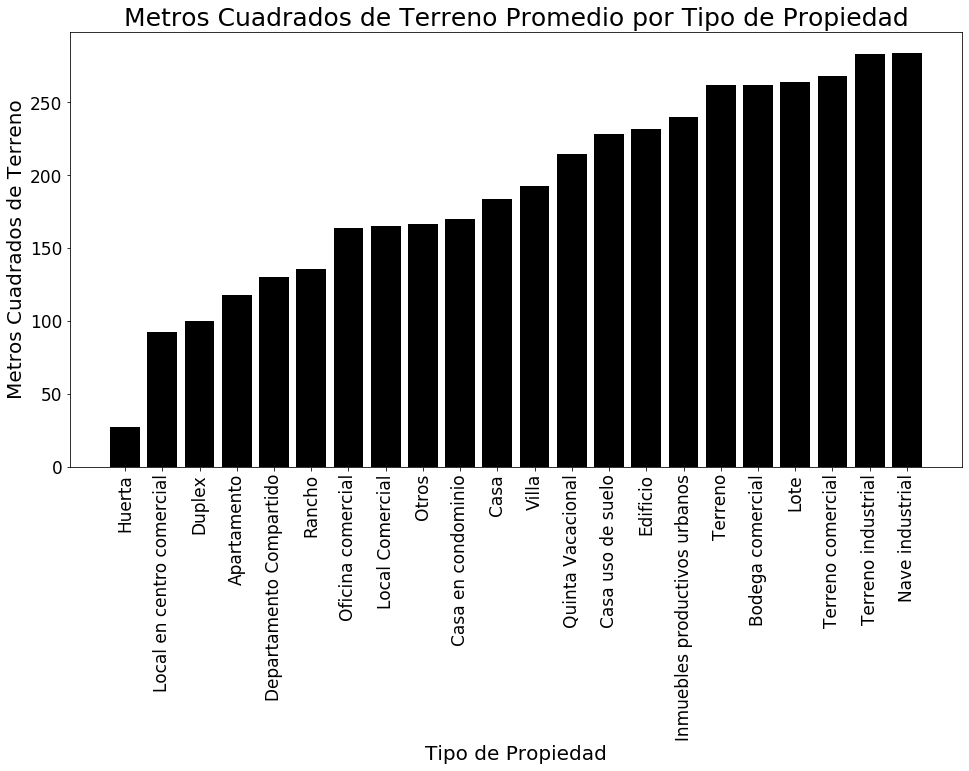

In [41]:
def ppm2(atributo, xlabel, titulo):
    dfaux = dfok.groupby('TipoPropiedad').mean()
    dfaux = dfaux.sort_values(atributo)
     # Sólo se sacan dos publicaciones: las únicas garage y hospedaje
    dfaux = dfaux.drop( index = 'Garage')
    dfaux = dfaux.drop( index = 'Hospedaje')

    if atributo == 'MetrosCuadradosCubiertos':
        dfaux = dfaux.drop( index = 'Lote') #Ninguna de los 5 lotes tiene bien cargado este atributo
    
    # Variables a graficar
    x = dfaux.index.to_list()
    y = dfaux[atributo]

    # Tamaño del gráfico
    fig = plt.figure(figsize = (16, 8))
    ax = fig.add_subplot(111)
    ax.set_aspect('auto')


    # Tamaño de los títulos de los ejes
    plt.xlabel("Tipo de Propiedad", fontsize = 20);
    plt.ylabel(xlabel, fontsize = 20);

    # Título
    plt.title(titulo, fontsize = 25)

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 17)
    plt.tick_params(axis='both', which='minor', labelsize = 17)

    # Rotar ejes
    plt.xticks(rotation = 90)

    # Límites para cada coordenada

    # Tipo de gráficok
    plt.bar(x, y, color = 'black')


ppm2('MetrosCuadradosTotales', "Metros Cuadrados de Terreno", "Metros Cuadrados de Terreno Promedio por Tipo de Propiedad")

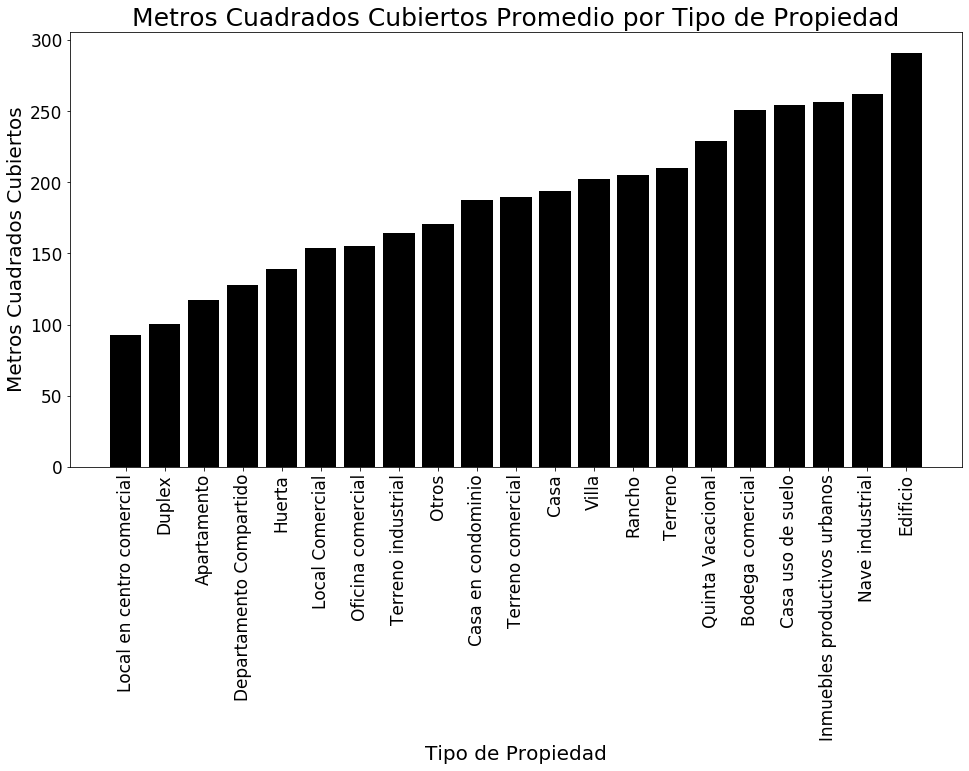

In [42]:

ppm2('MetrosCuadradosCubiertos', "Metros Cuadrados Cubiertos", "Metros Cuadrados Cubiertos Promedio por Tipo de Propiedad")

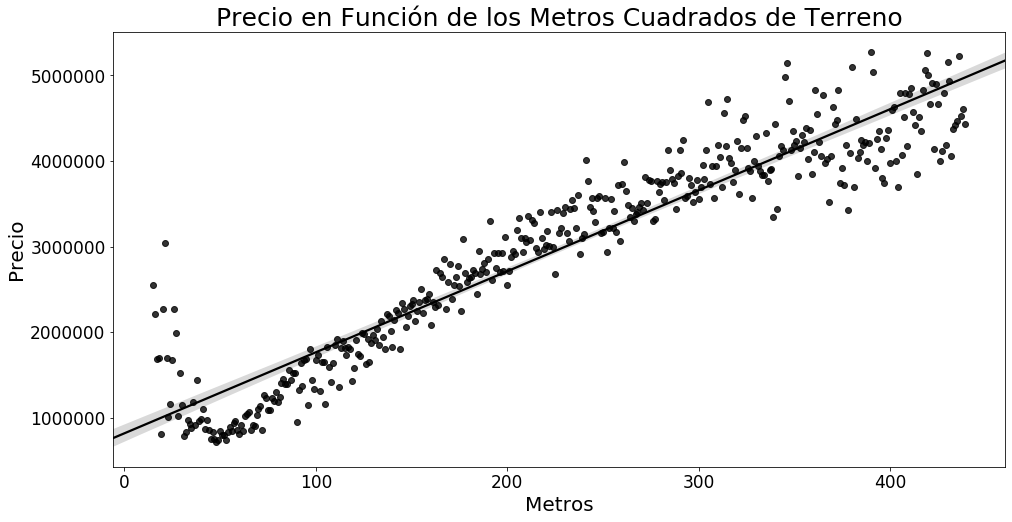

In [43]:
dfPorMetros = pd.DataFrame()
dfPorMetros['Metros'] = pd.Series( dfok['MetrosCuadradosTotales'].unique(), 
                                index = dfok['MetrosCuadradosTotales'].unique() )

dfPorMetros['Precio'] = dfok.groupby('MetrosCuadradosTotales').mean()['Precio']

dfPorMetros = dfPorMetros.dropna() # Nos quedamos con más del 80%

dfPorMetros['Precio'] = dfPorMetros['Precio'].astype(np.uint32)
dfPorMetros['Metros'] = dfPorMetros['Metros'].astype(np.uint16)

# Variables a graficar
#x = dfPorMetros['Metros']
#y = dfPorMetros['Precio']

# Tamaño del gráfico
grafico = plt.figure(figsize = (16, 8));

# Tamaño de los títulos de los ejes
plt.xlabel("Metros Cuadrados", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio en Función de los Metros Cuadrados de Terreno", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
#plt.scatter(x, y, color = 'black')

#Línea de regresión
#regre = np.poly1d( np.polyfit(x, y, 1) )
#plt.plot(x, regre(x), "red", linewidth = 5);

sb.regplot(x = "Metros", y = "Precio", data = dfPorMetros, color = 'black');

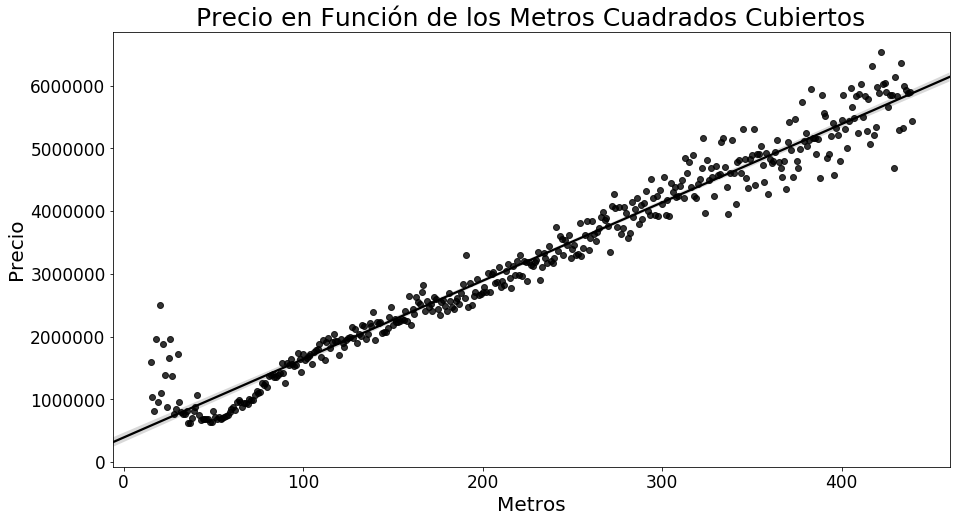

In [44]:
dfPorMetros = pd.DataFrame()
dfPorMetros['Metros'] = pd.Series( dfok['MetrosCuadradosCubiertos'].unique(), 
                                index = dfok['MetrosCuadradosCubiertos'].unique() )

dfPorMetros['Precio'] = dfok.groupby('MetrosCuadradosCubiertos').mean()['Precio']

dfPorMetros = dfPorMetros.dropna() # Nos quedamos con más del 92%

dfPorMetros['Precio'] = dfPorMetros['Precio'].astype(np.uint32)
dfPorMetros['Metros'] = dfPorMetros['Metros'].astype(np.uint16)

# Variables a graficar
#x = dfPorMetros['Metros']
#y = dfPorMetros['Precio']

# Tamaño del gráfico
fig = plt.figure(figsize = (15,  8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Tamaño de los títulos de los ejes
plt.xlabel("Metros Cuadrados", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.title("Precio en Función de los Metros Cuadrados Cubiertos", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
#plt.scatter(x, y, color = 'black')

#Línea de regresión
#regre = np.poly1d( np.polyfit(x, y, 1) )
#plt.plot(x, regre(x), "red", linewidth = 5);

sb.regplot(x = "Metros", y = "Precio", data = dfPorMetros, color = 'black');

En resumen, se vio que los tipos de propiedades más caros parecen ser los que más área tienen en promedio, habiendo una dependencia aproximadamente lineal del precio con respecto a la cantidad de metros cuadrados.

Sin embargo, esto es una tendencia, y no un comportamiento generalizado. Un caso particular de estas excepciones que se toma para analizar es el de las casas y los departamentos.

<BarContainer object of 22 artists>

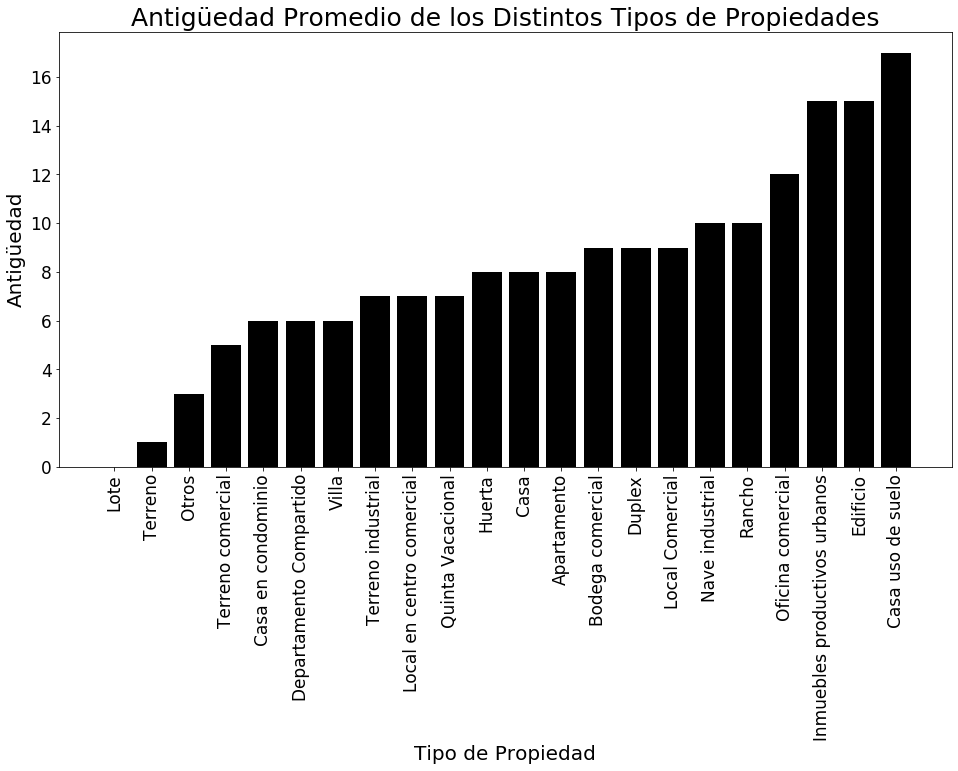

In [45]:
dfPorAntiguedad = pd.DataFrame()
dfPorAntiguedad['TipoPropiedad'] = pd.Series( dfok['TipoPropiedad'].unique(), 
                                index = dfok['TipoPropiedad'].unique() )

dfPorAntiguedad['Antiguedad'] = dfok.groupby('TipoPropiedad')['Antiguedad'].mean()

dfPorAntiguedad = dfPorAntiguedad.dropna() #80%

dfPorAntiguedad['TipoPropiedad'] = dfPorAntiguedad['TipoPropiedad'].astype('category')
dfPorAntiguedad['Antiguedad'] = dfPorAntiguedad['Antiguedad'].astype(np.uint8)

dfPorAntiguedad = dfPorAntiguedad.sort_values(['Antiguedad'])

# Variables a graficar
y = dfPorAntiguedad['Antiguedad']
x = dfPorAntiguedad['TipoPropiedad']

# Tamaño del gráfico
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Tamaño de los títulos de los ejes
plt.ylabel("Antigüedad", fontsize = 20);
plt.xlabel("Tipo de Propiedad", fontsize = 20);

# Título
plt.title("Antigüedad Promedio de los Distintos Tipos de Propiedades", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
#ldt = np.poly1d( np.polyfit(x, y, 1) )
#plt.plot(x, ldt(x), "g")


### 2.3.2. ¿Por qué los departamentos son en promedio más caros que las casas?

In [46]:
casas = dfok[ dfok['TipoPropiedad'] == 'Casa'];
1999307 / pow(len(casas), 1/2) #De Moivre

5310.90473707445

In [47]:
dptos = dfok[ dfok['TipoPropiedad'] == 'Apartamento']
2342775 / pow(len(dptos), 1/2) #De Moivre

9783.583359412307

In [48]:
len(casas)

141717

In [49]:
len(dptos)

57341

Text(0.5, 1.05, 'Comparación de Características Promedio de Casas y Departamentos')

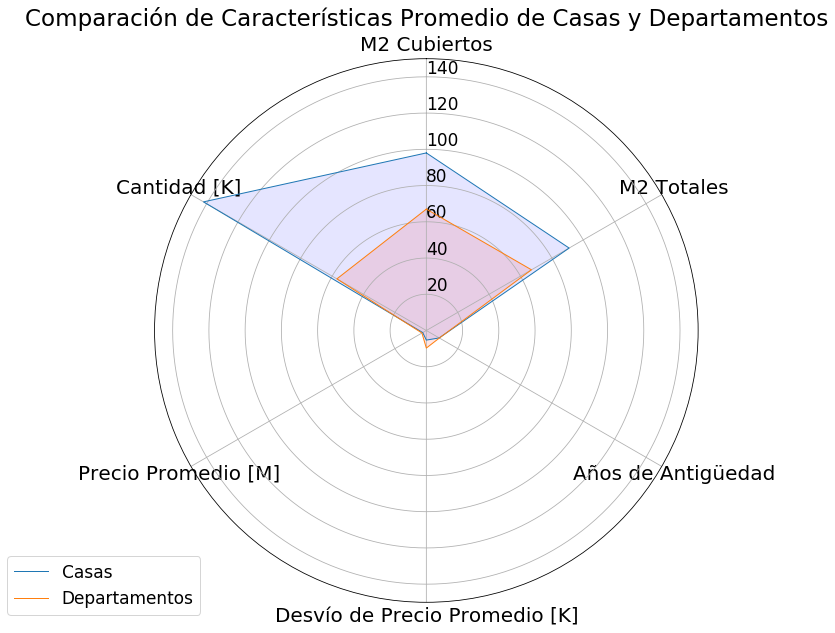

In [50]:
''' 
CÓDIGO DEL RADAR CHART SACADA DE
https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
'''

dfradar = pd.DataFrame({
    'Propiedad': ['Casas','Departamentos'],
'M2 Cubiertos': [98, 67],
    'M2 Totales': [91, 67],
'Años de Antigüedad': [8.2, 8.3],
    'Desvío de Precio Promedio [K]': [5.3, 9.7],
'Precio Promedio [M]': [2.3, 2.8],
'Cantidad [K]': [142, 57]
})
    
categories=list(dfradar)[1:]
N = len(categories)

# Ajustar ángulos
angulos = [n / float(N) * 2 * 3.1415 for n in range(N)]
angulos += angulos[:1]
 
# Crear radar
grafico = plt.figure(figsize = (15, 10));
ax = plt.subplot(111, polar = True)
# Variables en orden
ax.set_theta_offset(3.1415 / 2)
ax.set_theta_direction(-1)
 
# Poner nombres de las variables
plt.xticks(angulos[:-1], categories, color='black', size=20)
 
# Límites para las variables
ax.set_rlabel_position(0)
plt.yticks(color="black", size=17)
plt.ylim(0,150)
  
# Casas
values = dfradar.loc[0].drop('Propiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angulos, values, linewidth=1, linestyle='solid', label="Casas")
ax.fill(angulos, values, 'b', alpha=0.1)
 
# Dptos
values = dfradar.loc[1].drop('Propiedad').values.flatten().tolist()
values += values[:1]
ax.plot(angulos, values, linewidth=1, linestyle='solid', label="Departamentos")
ax.fill(angulos, values, 'r', alpha=0.1)

#Cartelito
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 17})

plt.title("Comparación de Características Promedio de Casas y Departamentos", fontsize = 23)


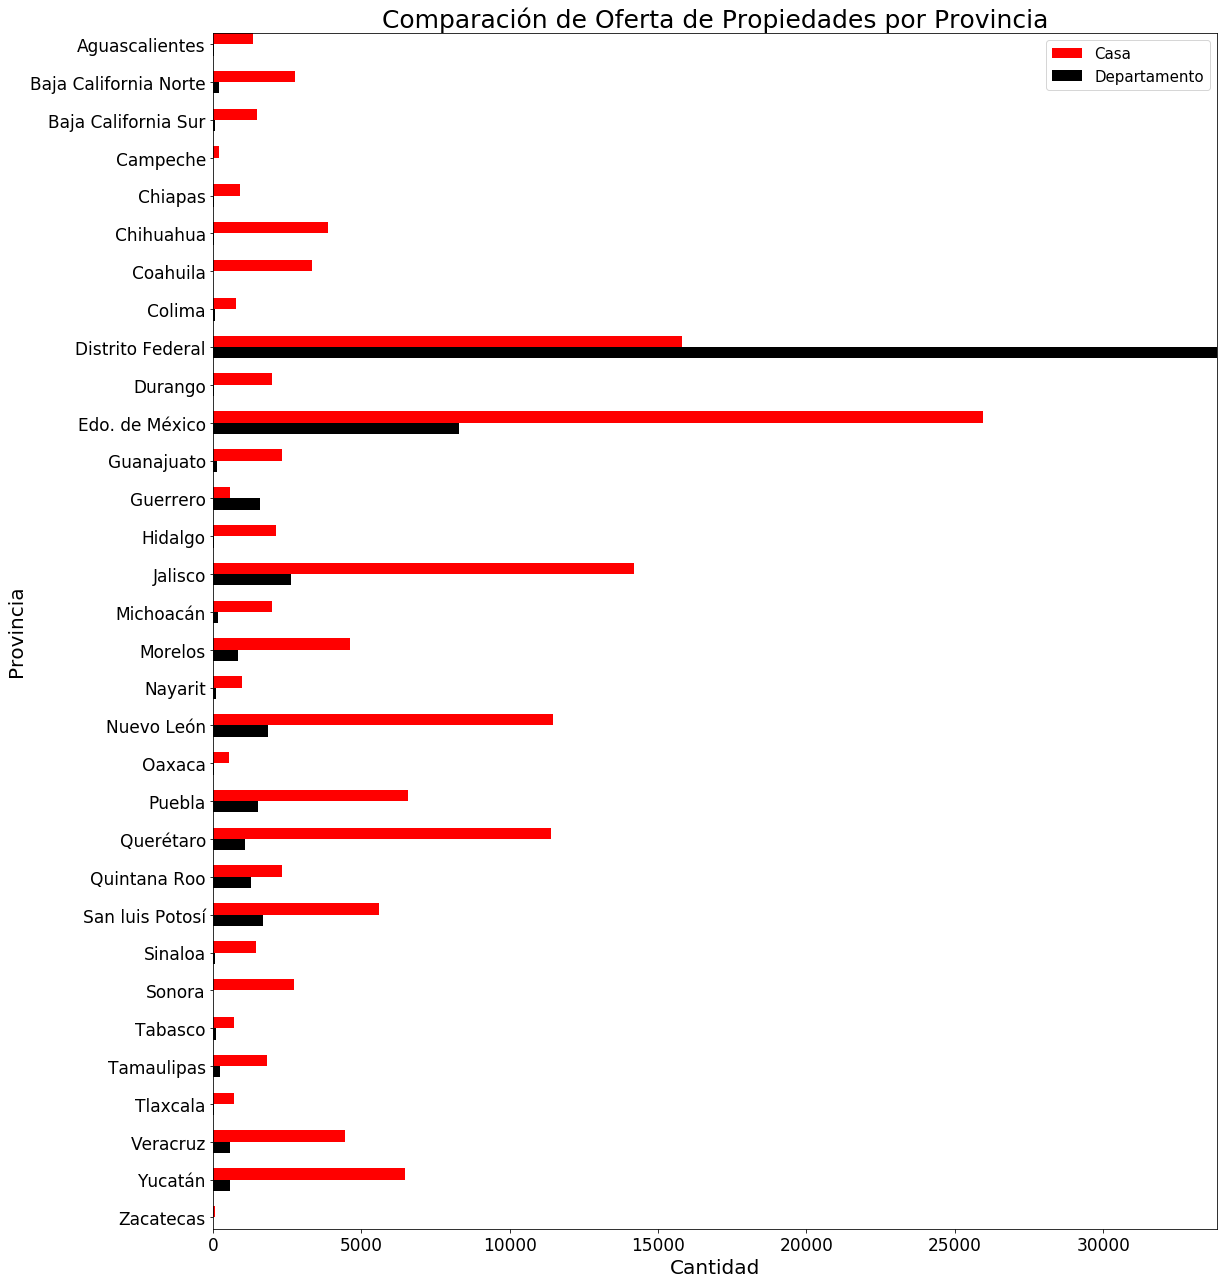

In [51]:
prov = ['Aguascalientes','Baja California Norte',
    'Baja California Sur','Campeche','Chiapas','Chihuahua','Coahuila',
        'Colima','Distrito Federal','Durango','Edo. de México','Guanajuato',
        'Guerrero','Hidalgo','Jalisco','Michoacán','Morelos','Nayarit','Nuevo León',
        'Oaxaca','Puebla','Querétaro','Quintana Roo','San luis Potosí','Sinaloa',
        'Sonora','Tabasco','Tamaulipas','Tlaxcala','Veracruz','Yucatán','Zacatecas' ]

casas = []
dptos = []

for i in range(32):
    casas.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Casa' ) ]['Precio'].count() )
    dptos.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Apartamento' ) ]['Precio'].count() )
        
x = np.arange(len(prov))

ancho = 0.3
fig, ax = plt.subplots(figsize = (18, 22))
plt.barh(x - (ancho/2), casas, ancho, color = 'red', label = 'Casa')
plt.barh(x + (ancho/2), dptos, ancho, color = 'black', label = 'Departamento')

plt.yticks( np.arange(len(prov)), np.arange(len(prov)) + 1)
ax.set_yticklabels(prov, fontsize=17)

p1 = plt.xlabel("Cantidad", fontsize = 20);
p2 = plt.ylabel("Provincia", fontsize = 20);
plt.autoscale(tight = True)

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
plt.legend(prop={'size': 15})


plt.title("Comparación de Oferta de Propiedades por Provincia", fontsize = 25)


ax.invert_yaxis()

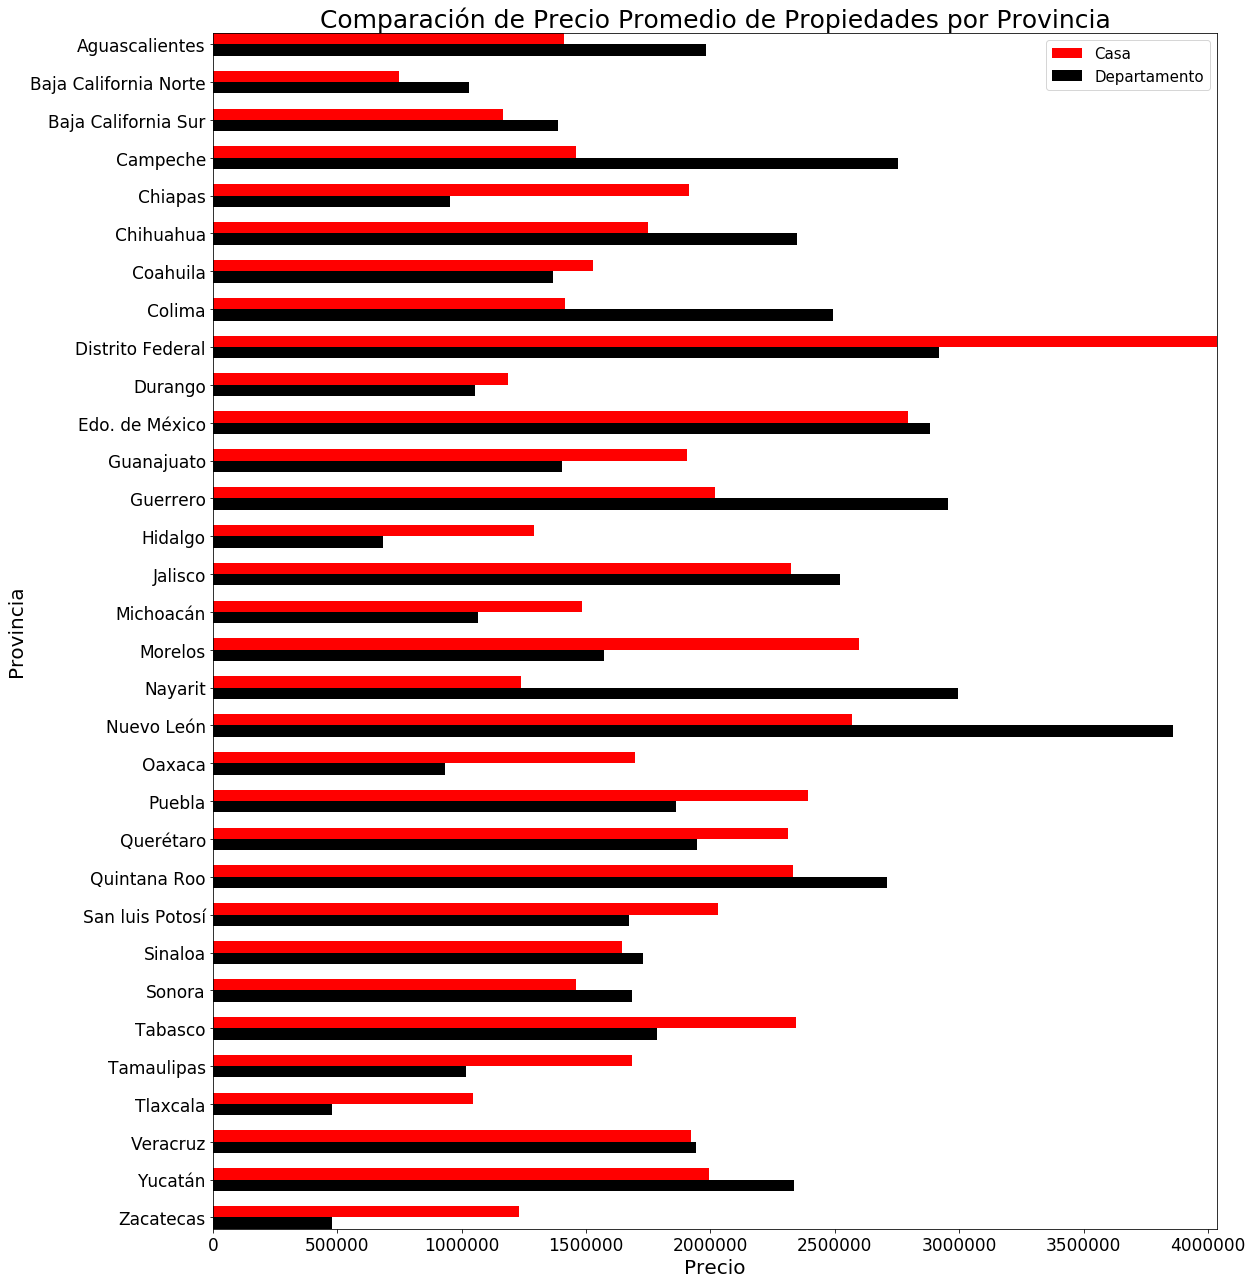

In [52]:
casas = []
dptos = []

for i in range(32):
    casas.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Casa' ) ]['Precio'].mean() )
    dptos.append( dfok[ ( dfok['Provincia'] == prov[i] ) & ( dfok['TipoPropiedad'] == 'Apartamento' ) ]['Precio'].mean() )
        
x = np.arange(len(prov))

ancho = 0.3
fig, ax = plt.subplots(figsize = (18, 22))
plt.barh(x - (ancho/2), casas, ancho, color = 'red', label = 'Casa')
plt.barh(x + (ancho/2), dptos, ancho, color = 'black', label = 'Departamento')

plt.yticks( np.arange(len(prov)), np.arange(len(prov)) + 1)
ax.set_yticklabels(prov, fontsize=17)

p1 = plt.xlabel("Precio", fontsize = 20);
p2 = plt.ylabel("Provincia", fontsize = 20);
plt.autoscale(tight = True)

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)
plt.legend(prop={'size': 15})


plt.title("Comparación de Precio Promedio de Propiedades por Provincia", fontsize = 25)

ax.invert_yaxis()

### 2.3.3. ¿Cómo se distribuye el precio de las propiedades? ¿Sigue alguna distribución conocida?

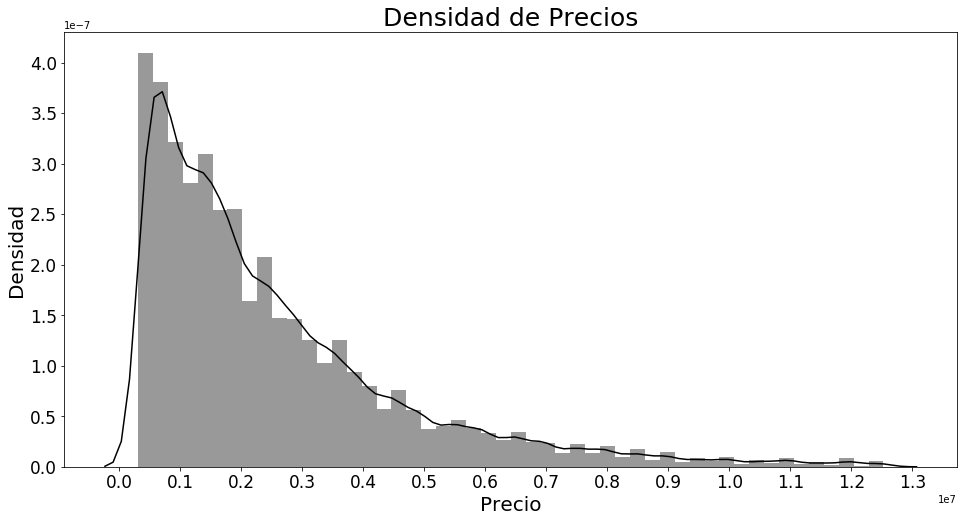

In [53]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.distplot(dfok['Precio'], color = 'black')
plt.xticks([i for i in range(0,14000000, 1000000)])
plt.xlabel("Precio", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.title("Densidad de Precios", fontsize=25);
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

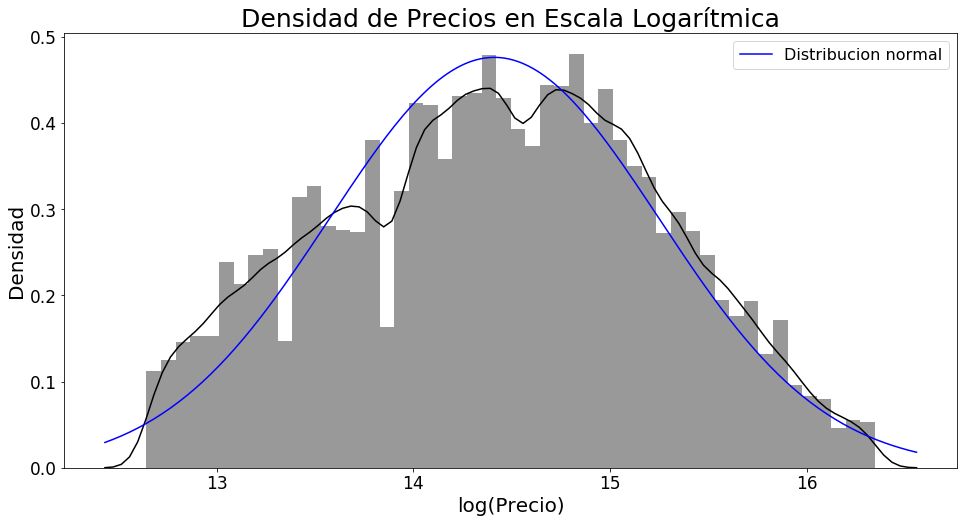

In [54]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
sb.distplot(np.log(dfok['Precio']), color = 'black', fit=norm, fit_kws={"color":"blue"})
# plt.xticks([i for i in range(0,14000000, 1000000)])
plt.xlabel("log(Precio)", fontsize=20)
plt.ylabel("Densidad", fontsize=20)
plt.legend(["Distribucion normal"], fontsize=16)
plt.title("Densidad de Precios en Escala Logarítmica", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17);

El precio distribuye aproximadamente como una log-normal.

### 2.3.4. ¿Cómo evolucionó el precio promedio de las propiedades publicadas en el tiempo?

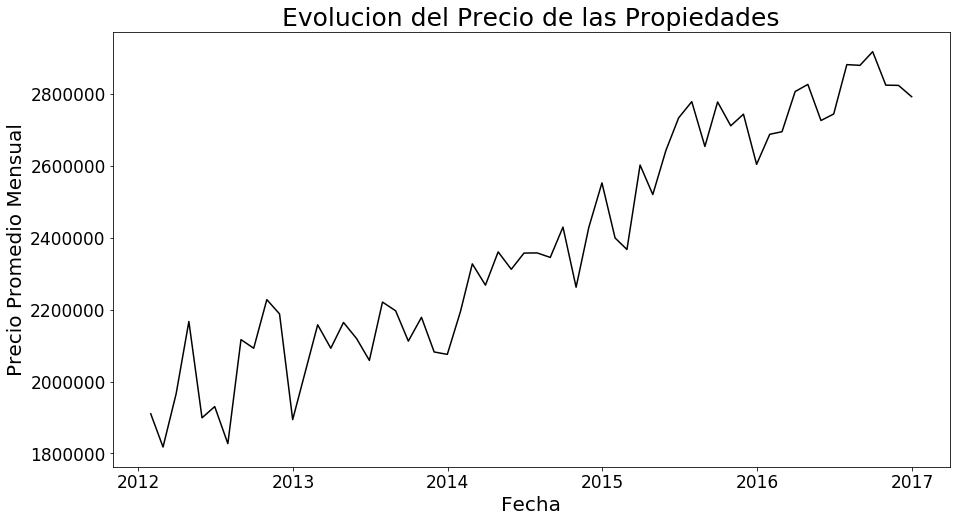

In [55]:
df_pt = dfok.copy()
df_pt["Fecha"] = df_pt["Fecha"].astype('datetime64')
df_pt.index = df_pt["Fecha"]
df_pt = df_pt.resample('M').mean()[["Precio"]].sort_index()
df_pt["Fecha"] = df_pt.index

plt.figure(figsize=(15,8))
plt.plot("Fecha", "Precio", data=df_pt, color="black")
plt.title("Evolucion del Precio de las Propiedades", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Precio Promedio Mensual", fontsize=20);

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17);

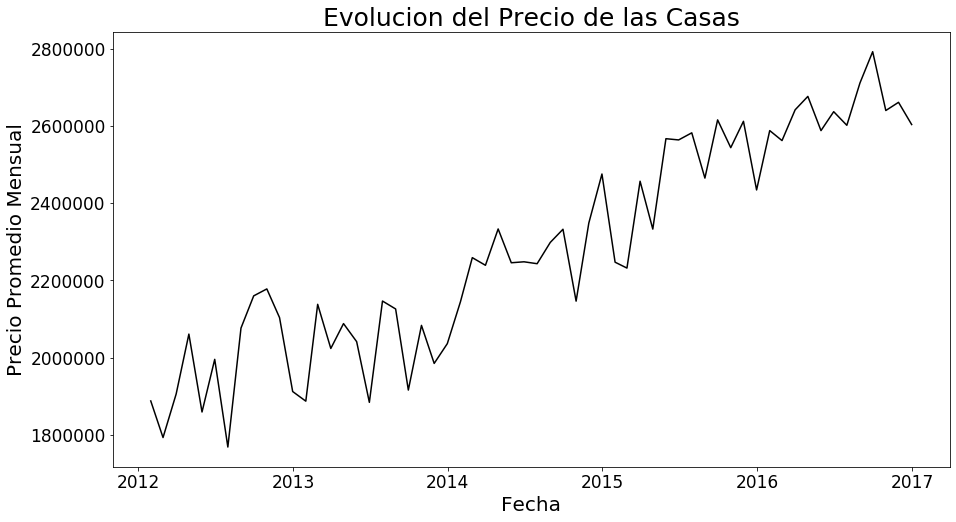

In [56]:
df_pt = dfok[dfok['TipoPropiedad'] == 'Casa'].copy()
df_pt["Fecha"] = df_pt["Fecha"].astype('datetime64')
df_pt.index = df_pt["Fecha"]
df_pt = df_pt.resample('M').mean()[["Precio"]].sort_index()
df_pt["Fecha"] = df_pt.index

plt.figure(figsize=(15,8))
plt.plot("Fecha", "Precio", data=df_pt, color="black")
plt.title("Evolucion del Precio de las Casas", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Precio Promedio Mensual", fontsize=20);

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17);

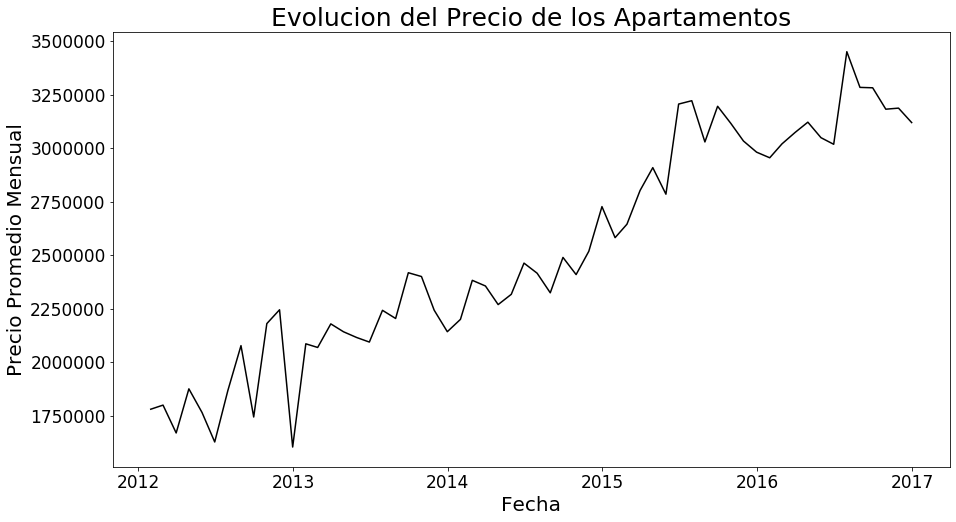

In [57]:
df_pt = dfok[dfok['TipoPropiedad'] == 'Apartamento'].copy()
df_pt["Fecha"] = df_pt["Fecha"].astype('datetime64')
df_pt.index = df_pt["Fecha"]
df_pt = df_pt.resample('M').mean()[["Precio"]].sort_index()
df_pt["Fecha"] = df_pt.index

plt.figure(figsize=(15,8))
plt.plot("Fecha", "Precio", data=df_pt, color="black")
plt.title("Evolucion del Precio de los Apartamentos", fontsize=25)
plt.xlabel("Fecha", fontsize=20)
plt.ylabel("Precio Promedio Mensual", fontsize=20);

plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17);

Existe una tendencia de crecimiento generalizada, completamente solidaria a las casas, y con un auge más pronunciado para el caso de los departamentos

## 2.4. Análisis de Comodidades

### 2.4.1. ¿Qué tipo de propiedades tienen comodidades?

Se consideran como comodidades a las piletas, gimnsarios, SUM o garages mútiples.

In [58]:
def propiedadesCon(ax, atributo, titulo, nomAtributo, n):
    dfPorPropiedad = pd.DataFrame()

    dfPorPropiedad['TipoPropiedad'] = pd.Series( dfok[ dfok[atributo] == True ]['TipoPropiedad'].unique(), \
                                                index = dfok[ dfok[atributo] == True ]['TipoPropiedad'].unique())

    dfPorPropiedad['Cantidad'] =  dfok[ dfok[atributo] == True ].groupby('TipoPropiedad').count()['Precio']

    dfPorPropiedad = dfPorPropiedad.dropna()

    dfPorPropiedad = dfPorPropiedad.sort_values(['TipoPropiedad'])


    dfPorPropiedad = dfPorPropiedad.sort_values(['Cantidad'])


    # Variables a graficar
    x = dfPorPropiedad['TipoPropiedad']
    y = dfPorPropiedad['Cantidad']

    ax = plt.subplot(n)
    
    # Tamaño de los títulos de los ejes
    plt.xlabel("Tipo de Propiedad", fontsize = 20);
    plt.ylabel("Cantidad", fontsize = 20);
    # Título
    plt.title(titulo + " " + nomAtributo, fontsize = 25)

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 17)
    plt.tick_params(axis='both', which='minor', labelsize = 17)

    # Rotar ejes
    plt.xticks(rotation = 90)

    # Límites para cada coordenada

    # Tipo de gráficok
    plt.bar(x, y, color = 'black')


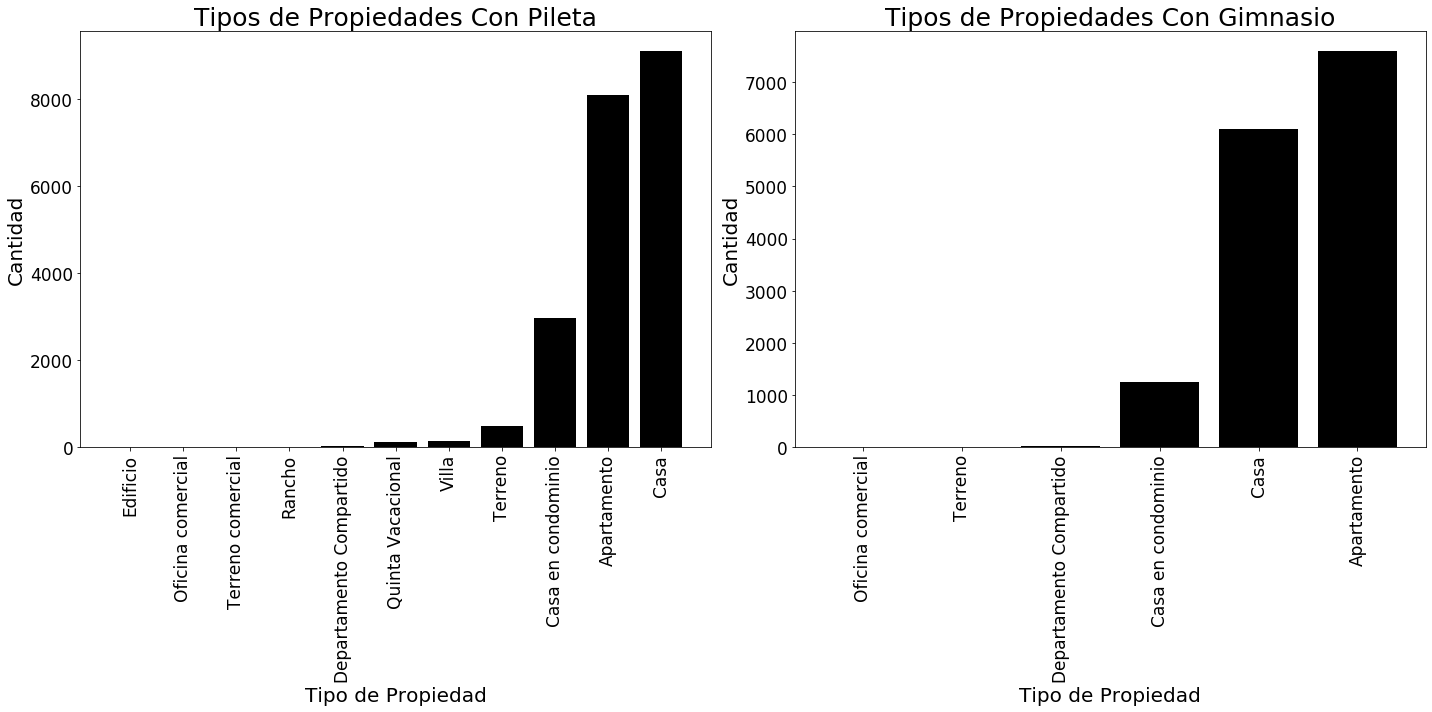

In [59]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(20,10))

propiedadesCon(ax1, 'TienePileta', "Tipos de Propiedades", "Con Pileta", "121")
propiedadesCon(ax2, 'TieneGimnasio', "Tipos de Propiedades", "Con Gimnasio", "122")
#propiedadesCon(ax3, 'TieneUsosMultiples', "Comparación de Tipos de Propiedades", "Con SUMs", "212")

plt.tight_layout()

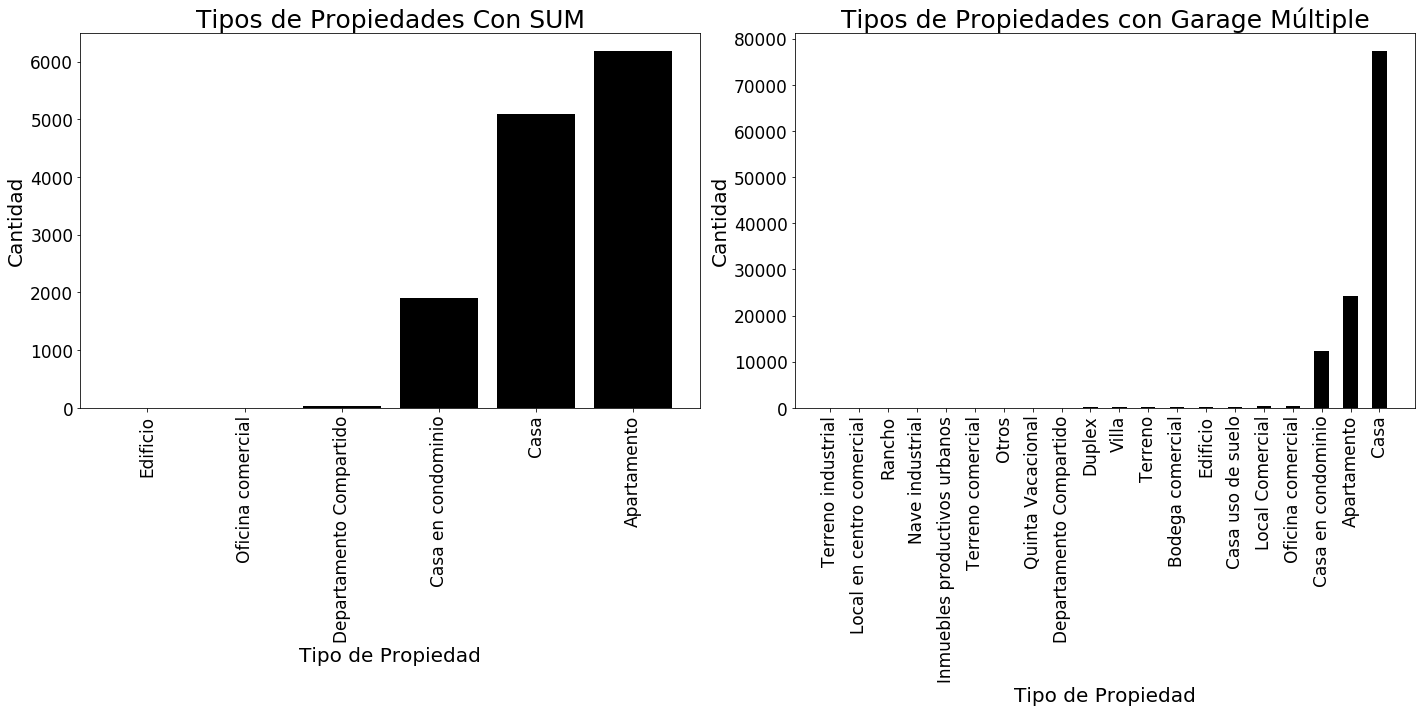

In [60]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(20,10))


propiedadesCon(ax1, 'TieneUsosMultiples', "Tipos de Propiedades", "Con SUM", "121")



dfPorPropiedad = pd.DataFrame()

dfPorPropiedad['TipoPropiedad'] = pd.Series( dfok[ dfok['CantGarages'] > 1 ]['TipoPropiedad'].unique(), \
                                            index = dfok[ dfok['CantGarages'] > 1 ]['TipoPropiedad'].unique())

dfPorPropiedad['Cantidad'] =  dfok[ dfok['CantGarages'] > 1 ].groupby('TipoPropiedad').count()['Precio']

dfPorPropiedad = dfPorPropiedad.dropna()

dfPorPropiedad = dfPorPropiedad.sort_values(['TipoPropiedad'])


dfPorPropiedad = dfPorPropiedad.sort_values(['Cantidad'])


# Variables a graficar
x = dfPorPropiedad['TipoPropiedad']
y = dfPorPropiedad['Cantidad']

# Tamaño del gráfico
#fig = plt.figure(figsize = (16, 8))
ax2 = plt.subplot(122)


# Tamaño de los títulos de los ejes
plt.xlabel("Tipo de Propiedad", fontsize = 20);
plt.ylabel("Cantidad", fontsize = 20);
# Título
plt.title("Tipos de Propiedades con Garage Múltiple", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 90)

# Límites para cada coordenada

# Tipo de gráficok
plt.bar(x, y, color = 'black', width = 0.5)

plt.tight_layout()

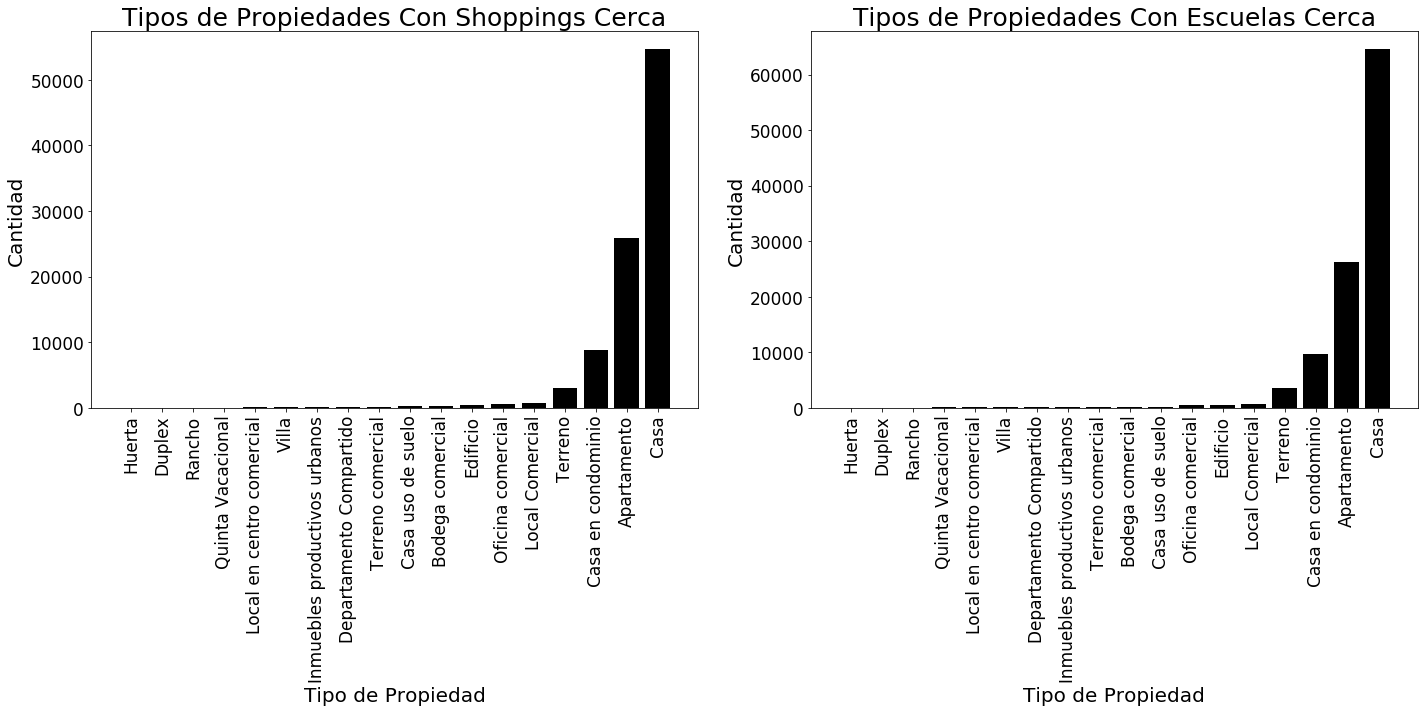

In [61]:
fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(20,10))

propiedadesCon(ax1, 'TieneShoppingsCerca', "Tipos de Propiedades", "Con Shoppings Cerca", "121")
propiedadesCon(ax2, 'TieneEscuelasCerca', "Tipos de Propiedades", "Con Escuelas Cerca", "122")

plt.tight_layout()

Es clara y predominante la tendencia de las casas, departamentos y casas en codominio para la presencia de comodidades.

### 2.4.2. ¿Cómo cambia la proporción de comodidades según la antiguedad?

Para este análisis es necesario contar con datos válidos en el atributo de Antigüedad, así que se filtró aquellos que tenían valores nulos. Quedaron 196 445 casos totales (más del 80%).


In [62]:
# Se usa df_ok para las columnas porque tiene números en las columnas, sirve para contar.
df_comodidad = dfok[['Antiguedad', \
                     'TieneGimnasio', \
                     'TieneUsosMultiples', \
                     'TienePileta', \
                     'TieneEscuelasCerca', \
                     'TieneShoppingsCerca']].copy() # Para modificar df_comodidad sin warnings.

Se analiza si hay casos nulos.

In [63]:
print('Casos nulos por columna:')
print(df_comodidad.isnull().sum())
print('\nTipo de dato de las columnas:')
print(df_comodidad.dtypes)
memoria_usada = df_comodidad.memory_usage().sum()/(1024*1024)
print('\nMemoria usada', memoria_usada.round(2), "MB")

Casos nulos por columna:
Antiguedad             43555
TieneGimnasio              0
TieneUsosMultiples         0
TienePileta                0
TieneEscuelasCerca         0
TieneShoppingsCerca        0
dtype: int64

Tipo de dato de las columnas:
Antiguedad             float64
TieneGimnasio             bool
TieneUsosMultiples        bool
TienePileta               bool
TieneEscuelasCerca        bool
TieneShoppingsCerca       bool
dtype: object

Memoria usada 2.98 MB


Hay 43555 casos nulos y es necesario rmoverlos para covertir los tipos. Hasta aquí los tipos del DataFrame `df_comodidad` son `float64`.

In [64]:
# Se eliminan las filas nulas, para así poder realizar las conversión de tipos.
# Además, para este análisis es necesario un valor en la columna 'Antiguedad'.
df_comodidad.dropna(inplace = True)

In [65]:
df_comodidad.head()

Antiguedad  TieneGimnasio  TieneUsosMultiples  TienePileta  \
1        10.0          False               False        False   
2         5.0          False               False        False   
3         1.0          False               False        False   
4        10.0          False               False        False   
5         5.0          False               False        False   

   TieneEscuelasCerca  TieneShoppingsCerca  
1                True                 True  
2               False                False  
3                True                 True  
4               False                False  
5               False                 True

In [66]:
# Se cambian los tipos del DataFrame.
df_comodidad['Antiguedad'] = df_comodidad['Antiguedad'].astype(np.uint8)
df_comodidad['TieneGimnasio'] = df_comodidad['TieneGimnasio'].astype(np.uint8)
df_comodidad['TieneUsosMultiples'] = df_comodidad['TieneUsosMultiples'].astype(np.uint8)
df_comodidad['TienePileta'] = df_comodidad['TienePileta'].astype(np.uint8)
df_comodidad['TieneEscuelasCerca'] = df_comodidad['TieneEscuelasCerca'].astype(np.uint8)
df_comodidad['TieneShoppingsCerca'] = df_comodidad['TieneShoppingsCerca'].astype(np.uint8)
memoria_usada = df_comodidad.memory_usage().sum()/(1024*1024)
print('Memoria usada', memoria_usada.round(2), "MB")

Memoria usada 2.62 MB


Como se tienen 80 años para antigüedad, agregro una columna con rango de años tomados de a 5 años(lustros).

Para esto se define una función de calcula el rango de años dónde cae la antigüedad de la propiedad. Primero se elige un orden y luego se cambia el nombre de las filas. De esta manera se evita tener que insertar una fila en medio del DataFrame: 
 - el rango `6 - 10` quedaría entre `56 - 60` y `61 - 65`.

In [67]:
# Se define una función de calcula el rango de años dónde cae la antigüedad de la propiedad.
# Primero se elige un orden y luego se cambia el nombre de las filas.
# Esto es para evitar tener que insertar una fila en medio del DataFrame.
def rango_de_años(df):
    if df['Antiguedad'] <= 5: return '00'# '0 - 5'
    elif 6  <= df['Antiguedad'] <= 10: return '01'# '6 - 10'
    elif 11 <= df['Antiguedad'] <= 15: return '02'# '11 - 15'
    elif 16 <= df['Antiguedad'] <= 20: return '03'# '16 - 20'
    elif 21 <= df['Antiguedad'] <= 25: return '04'# '21 - 25'
    elif 26 <= df['Antiguedad'] <= 30: return '05'# '26 - 30'
    elif 31 <= df['Antiguedad'] <= 35: return '06'# '31 - 35'
    elif 36 <= df['Antiguedad'] <= 40: return '07'# '26 - 40'
    elif 41 <= df['Antiguedad'] <= 45: return '08'# '41 - 45'
    elif 46 <= df['Antiguedad'] <= 50: return '09'# '46 - 50'
    elif 51 <= df['Antiguedad'] <= 55: return '10'# '51 - 55'
    elif 56 <= df['Antiguedad'] <= 60: return '11'# '56 - 60'
    elif 61 <= df['Antiguedad'] <= 65: return '12'# '61 - 65'
    elif 66 <= df['Antiguedad'] <= 70: return '13'# '66 - 70'
    elif 71 <= df['Antiguedad'] <= 75: return '14'# '71 - 75'
    elif 76 <= df['Antiguedad'] <= 80: return '15'# '76 - 80'

In [68]:
# Auxiliar para asignar lustros.
aux = df_comodidad.apply(rango_de_años, axis = 1) # Devuelve una Serie

# Se hace una copia para los agrupados y se agrega la columna LustroAntiguedad.
df_comodidad_lustros = df_comodidad.copy()
df_comodidad_lustros['LustrosAntiguedad'] = aux

# Se agrupa por LustroAntiguedad y se suman los unos.
# Se termina descartando la columna Antiguedad en df_comodidad_lustro.
df_comodidad_lustros = \
    df_comodidad_lustros.\
        groupby('LustrosAntiguedad')\
        .agg({'TieneGimnasio':'sum', \
              'TieneUsosMultiples':'sum', \
              'TienePileta':'sum', \
              'TieneEscuelasCerca':'sum', \
              'TieneShoppingsCerca':'sum'})
# Cambio del tipo de datos.
df_comodidad_lustros['TieneGimnasio'] = df_comodidad_lustros['TieneGimnasio'].astype(np.uint16)
df_comodidad_lustros['TieneUsosMultiples'] = df_comodidad_lustros['TieneUsosMultiples'].astype(np.uint16)
df_comodidad_lustros['TienePileta'] = df_comodidad_lustros['TienePileta'].astype(np.uint16)
df_comodidad_lustros['TieneEscuelasCerca'] = df_comodidad_lustros['TieneEscuelasCerca'].astype(np.uint16)
df_comodidad_lustros['TieneShoppingsCerca'] = df_comodidad_lustros['TieneShoppingsCerca'].astype(np.uint16)
# Se reseta el índice
df_comodidad_lustros.reset_index(inplace = True)
# Se renombra la columna LustrosAntiguedad.
df_comodidad_lustros['LustrosAntiguedad'] = \
['0 - 5', '6 - 10', '11 - 15', '16 - 20', \
 '21 - 25', '26 - 30', '31 - 35', '36 - 40', \
 '41 - 45', '46 - 50', '51 - 55', '56 - 60', \
 '61 - 65', '66 - 70', '71 - 75', '76 - 80']
# Se elige como índice la columna LustrosAntiguedad con los nuevos nombres.
df_comodidad_lustros.set_index('LustrosAntiguedad', inplace = True)

df_comodidad_lustros

TieneGimnasio  TieneUsosMultiples  TienePileta  \
LustrosAntiguedad                                                   
0 - 5                      10782                9652        15573   
6 - 10                      1659                1498         2236   
11 - 15                      314                 218          457   
16 - 20                      544                 671          697   
21 - 25                      162                  78          138   
26 - 30                       62                  85          105   
31 - 35                       15                  37           31   
36 - 40                       14                  19           28   
41 - 45                        1                   5            4   
46 - 50                        7                  24           15   
51 - 55                        6                   0            3   
56 - 60                        4                   3            1   
61 - 65                        0                   0            1   
66 - 70                        0                   0            0   
71 - 75                        0                   0            0   
76 - 80                        1                   1            1   

                   TieneEscuelasCerca  TieneShoppingsCerca  
LustrosAntiguedad                                           
0 - 5                           58159                52386  
6 - 10                          20149                18271  
11 - 15                          3610                 2841  
16 - 20                         12406                11514  
21 - 25                          1758                 1343  
26 - 30                          1834                 1494  
31 - 35                           652                  493  
36 - 40                           680                  527  
41 - 45                           187                  140  
46 - 50                           625                  550  
51 - 55                            40                   29  
56 - 60                            59                   47  
61 - 65                             9                    6  
66 - 70                            15                   13  
71 - 75                             4                    4  
76 - 80                            11                    8

In [69]:
# Se calcula la totalidad de comodidades registradas.
total_comodidad_lustros = df_comodidad_lustros.sum(axis = 1)
# Se calculan las porporciones por lustro.
df_comodidad_propor_lustros = df_comodidad_lustros.apply(lambda x : round(x/total_comodidad_lustros,3))
# Se renombran las columnas apropiadamente.
columnas_proporciones = ['Proporcion Gimnasio', \
                         'Proporcion UsosMultiples', \
                         'Proporcion Pileta', \
                         'Proporcion EscuelasCerca', \
                         'Proporcion ShoppingsCerca']
df_comodidad_propor_lustros.columns = columnas_proporciones

# Se agregan las columnas de amenidades propias (gimnasio, SUM y piscina) y compartidas (escuelas y shoppings cercanos).
df_comodidad_propor_lustros['Proporcion Propias'] = \
        df_comodidad_propor_lustros['Proporcion Gimnasio'] + \
        df_comodidad_propor_lustros['Proporcion UsosMultiples'] + \
        df_comodidad_propor_lustros['Proporcion Pileta']
df_comodidad_propor_lustros['Proporcion Compartidas'] = \
        df_comodidad_propor_lustros['Proporcion EscuelasCerca'] + \
        df_comodidad_propor_lustros['Proporcion ShoppingsCerca']
df_comodidad_propor_lustros

Proporcion Gimnasio  Proporcion UsosMultiples  \
LustrosAntiguedad                                                  
0 - 5                            0.074                     0.066   
6 - 10                           0.038                     0.034   
11 - 15                          0.042                     0.029   
16 - 20                          0.021                     0.026   
21 - 25                          0.047                     0.022   
26 - 30                          0.017                     0.024   
31 - 35                          0.012                     0.030   
36 - 40                          0.011                     0.015   
41 - 45                          0.003                     0.015   
46 - 50                          0.006                     0.020   
51 - 55                          0.077                     0.000   
56 - 60                          0.035                     0.026   
61 - 65                          0.000                     0.000   
66 - 70                          0.000                     0.000   
71 - 75                          0.000                     0.000   
76 - 80                          0.045                     0.045   

                   Proporcion Pileta  Proporcion EscuelasCerca  \
LustrosAntiguedad                                                
0 - 5                          0.106                     0.397   
6 - 10                         0.051                     0.460   
11 - 15                        0.061                     0.485   
16 - 20                        0.027                     0.480   
21 - 25                        0.040                     0.505   
26 - 30                        0.029                     0.512   
31 - 35                        0.025                     0.531   
36 - 40                        0.022                     0.536   
41 - 45                        0.012                     0.555   
46 - 50                        0.012                     0.512   
51 - 55                        0.038                     0.513   
56 - 60                        0.009                     0.518   
61 - 65                        0.062                     0.562   
66 - 70                        0.000                     0.536   
71 - 75                        0.000                     0.500   
76 - 80                        0.045                     0.500   

                   Proporcion ShoppingsCerca  Proporcion Propias  \
LustrosAntiguedad                                                  
0 - 5                                  0.357               0.246   
6 - 10                                 0.417               0.123   
11 - 15                                0.382               0.132   
16 - 20                                0.446               0.074   
21 - 25                                0.386               0.109   
26 - 30                                0.417               0.070   
31 - 35                                0.401               0.067   
36 - 40                                0.416               0.048   
41 - 45                                0.415               0.030   
46 - 50                                0.450               0.038   
51 - 55                                0.372               0.115   
56 - 60                                0.412               0.070   
61 - 65                                0.375               0.062   
66 - 70                                0.464               0.000   
71 - 75                                0.500               0.000   
76 - 80                                0.364               0.135   

                   Proporcion Compartidas  
LustrosAntiguedad                          
0 - 5                               0.754  
6 - 10                              0.877  
11 - 15                             0.867  
16 - 20                             0.926  
21 - 25                             0.891  
26 - 30                             0.929  
31 - 35                     

In [70]:
print(df_comodidad_propor_lustros.mean().round(2))

Proporcion Gimnasio          0.03
Proporcion UsosMultiples     0.02
Proporcion Pileta            0.03
Proporcion EscuelasCerca     0.51
Proporcion ShoppingsCerca    0.41
Proporcion Propias           0.08
Proporcion Compartidas       0.92
dtype: float64


La media de la proporción de amenidades compartidas supera por más del 90% del total a las propias. Por esto se realizan una análisis separado.
 
También se puede calcular la proporción de registros que le corresponde a cada lustro. Para eso se puede usar la Serie `total_comodidades`, que contiene la cantidad total de amenidades registradas en cada lustro. Si se suma lo acumulado por cada lustro en los 80 años se obtiene la cantidad total de amenidades.

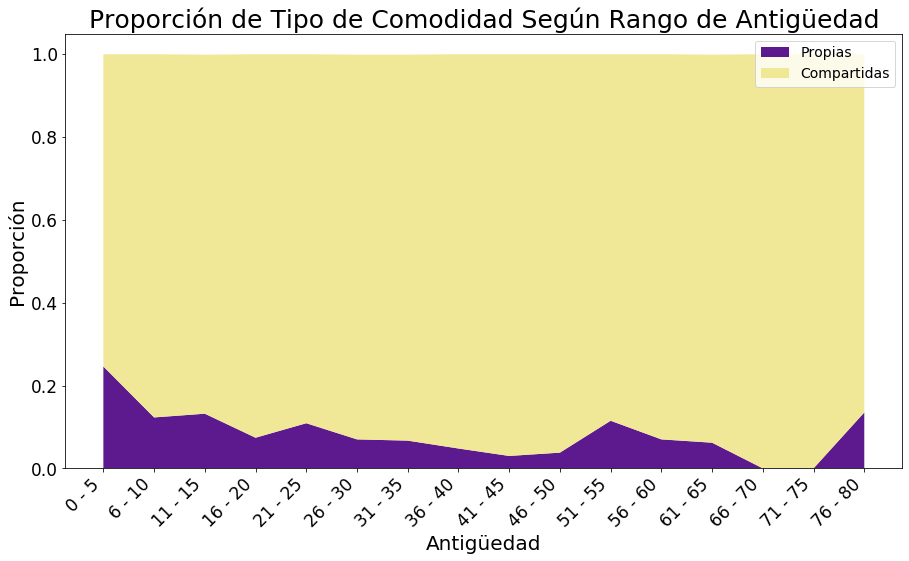

In [71]:
plt.figure(figsize=(15,8))
x = df_comodidad_propor_lustros.index
y = [df_comodidad_propor_lustros['Proporcion Propias'], \
     df_comodidad_propor_lustros['Proporcion Compartidas']
    ]
plt.stackplot(x,y, \
              labels = ['Propias', 'Compartidas'], \
              colors = ['indigo', 'khaki'], \
              alpha = 0.9)

plt.title('Proporción de Tipo de Comodidad Según Rango de Antigüedad', fontsize = 25)

plt.xticks(fontsize = 17, rotation = 45, ha = 'right')
plt.yticks(fontsize = 17)

plt.xlabel('Antigüedad', fontsize = 20)
plt.ylabel('Proporción', fontsize = 20)
plt.legend(loc='upper right', fontsize = 14)

plt.show()

Se nota una clara preponderancia de las amenidades compartidas por sobre las propia.

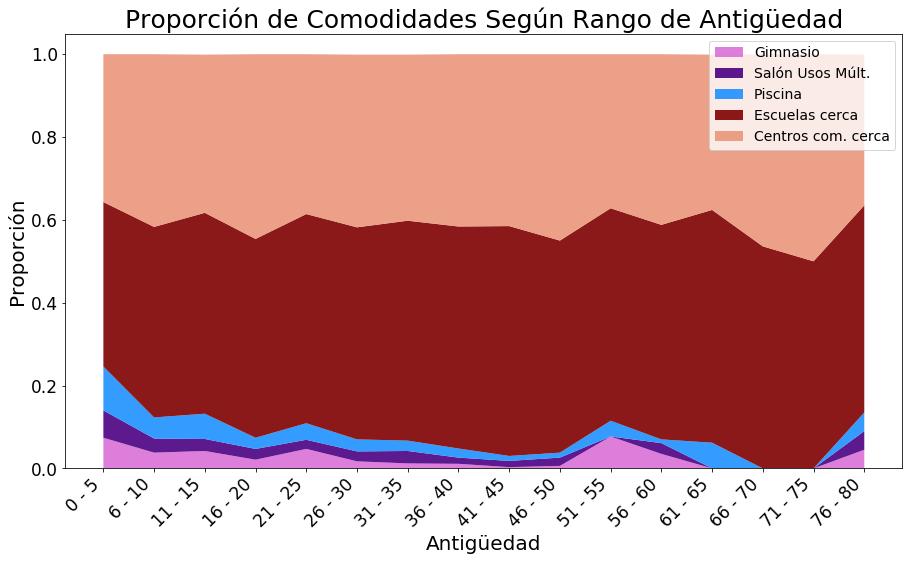

In [72]:
plt.figure(figsize=(15,8))
x = df_comodidad_propor_lustros.index
y = [df_comodidad_propor_lustros['Proporcion Gimnasio'], \
     df_comodidad_propor_lustros['Proporcion UsosMultiples'], \
     df_comodidad_propor_lustros['Proporcion Pileta'], \
     df_comodidad_propor_lustros['Proporcion EscuelasCerca'], \
     df_comodidad_propor_lustros['Proporcion ShoppingsCerca']
    ]
plt.stackplot(x,y, \
              labels = ['Gimnasio', \
                        'Salón Usos Múlt.', \
                        'Piscina', \
                        'Escuelas cerca', \
                        'Centros com. cerca'], \
              colors = ['orchid', 'indigo', 'dodgerblue', 'maroon', 'darksalmon'], \
              alpha = 0.9)
plt.title('Proporción de Comodidades Según Rango de Antigüedad', fontsize = 25)
plt.xticks(fontsize = 17, rotation = 45, ha = 'right')
plt.yticks(fontsize = 17)
plt.xlabel('Antigüedad', fontsize = 20)
plt.ylabel('Proporción', fontsize = 20)
plt.legend(loc='upper right', fontsize = 14)
plt.show()

In [73]:
# Se agrupa por Antiguedad y se suman los unos.
df_comodidad_anios = \
    df_comodidad\
        .groupby('Antiguedad')\
        .agg({'TieneGimnasio':'sum', \
              'TieneUsosMultiples':'sum', \
              'TienePileta':'sum', \
              'TieneEscuelasCerca':'sum', \
              'TieneShoppingsCerca':'sum'})

# Se calcula la totalidad de comodidades registradas por año.
total_comodidad_anios = df_comodidad_anios.sum(axis=1)
# Se calculan las porporciones por año.
df_comodidad_propor_anios = df_comodidad_anios.apply(lambda x : round(x/total_comodidad_anios, 3))
# Se renombran las columnas apropiadamente, con los mismos nombres de antes: columnas_proporciones.
df_comodidad_propor_anios.columns = columnas_proporciones

# Se reemplaza los datos nulos con ceros.
df_comodidad_propor_anios.fillna(0, inplace = True)
df_comodidad_propor_anios.loc[df_comodidad_propor_anios.sum(axis = 1) == 0]

Proporcion Gimnasio  Proporcion UsosMultiples  Proporcion Pileta  \
Antiguedad                                                                     
64                          0.0                       0.0                0.0   
71                          0.0                       0.0                0.0   
74                          0.0                       0.0                0.0   
76                          0.0                       0.0                0.0   
79                          0.0                       0.0                0.0   

            Proporcion EscuelasCerca  Proporcion ShoppingsCerca  
Antiguedad                                                       
64                               0.0                        0.0  
71                               0.0                        0.0  
74                               0.0                        0.0  
76                               0.0                        0.0  
79                               0.0                        0.0

In [74]:
# Se verifica si hay años faltantes para el atributo antigüedad.
antiguedades = dfok['Antiguedad'].value_counts() # Es una Serie.
print('Cantidad de años que informan registro de antigüedad:', len(antiguedades))
# Se busca obtener la columna Antiguedad.
antiguedades = antiguedades.to_frame()
antiguedades.reset_index(inplace = True)
antiguedades.columns = ['Antiguedad', 'Cantidad']
# Se ordenan de menor a mayor los años de antigüedad.
antiguedades.sort_values(by = 'Antiguedad', ascending = True, inplace = True)
antiguedades.set_index('Antiguedad', inplace = True)
# Se muestran los últimos casos.
print(antiguedades[71:80].index)

Cantidad de años que informan registro de antigüedad: 78
Float64Index([71.0, 74.0, 75.0, 76.0, 77.0, 79.0, 80.0], dtype='float64', name='Antiguedad')



Entonces se tienen los siguientes años sin registro de comodidades:
        64 - 71 - 72 - 73 - 74 - 76 - 78 - 79

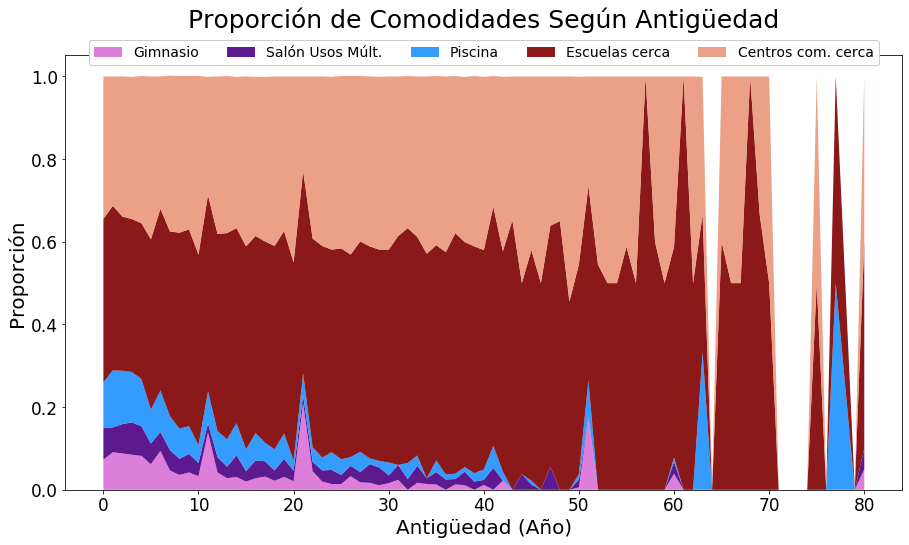

In [75]:
plt.figure(figsize=(15,8))
x = df_comodidad_propor_anios.index
y = [df_comodidad_propor_anios['Proporcion Gimnasio'], \
     df_comodidad_propor_anios['Proporcion UsosMultiples'], \
     df_comodidad_propor_anios['Proporcion Pileta'], \
     df_comodidad_propor_anios['Proporcion EscuelasCerca'], \
     df_comodidad_propor_anios['Proporcion ShoppingsCerca']
    ]
plt.stackplot(x,y, \
              labels = ['Gimnasio', 'Salón Usos Múlt.', 'Piscina', 'Escuelas cerca', 'Centros com. cerca'], \
              colors = ['orchid', 'indigo', 'dodgerblue', 'maroon', 'darksalmon'], \
              alpha = 0.9)
plt.title('Proporción de Comodidades Según Antigüedad', fontsize = 25, y = 1.05)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center')
plt.yticks(fontsize = 17)
plt.xlabel('Antigüedad (Año)', fontsize = 20)
plt.ylabel('Proporción', fontsize = 20)
plt.legend(loc = 'upper center', fontsize = 14, bbox_to_anchor = (0.5, 1.05), ncol = 5, framealpha = 1)
plt.show()

In [76]:
# Se crea columna con la suma de amenidades por año.
df_comodidad_anios['Total'] = total_comodidad_anios
# Se resetea el índice para tener una columna Antiguedad.
df_comodidad_anios.reset_index(inplace = True)

In [77]:
# Se calcula la proporción de comodidades registradas según rango de antigüedad.
print('Proporción de comodidades con antigüedad de hasta 5 años:', \
      round(total_comodidad_anios[0:6].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Proporción de comodidades con antigüedad de hasta 10 años:', \
      round(total_comodidad_anios[0:11].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Proporción de comodidades con antigüedad de hasta 20 años:', \
      round(total_comodidad_anios[0:21].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Proporción de comodidades con antigüedad de hasta 30 años:', \
      round(total_comodidad_anios[0:31].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Proporción de comodidades con antigüedad de hasta 38 años:', \
      round(total_comodidad_anios[0:39].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Proporción de comodidades con antigüedad de hasta 40 años:', \
      round(total_comodidad_anios[0:41].sum()/total_comodidad_anios.sum()*100, 2), '%')
print('Cantidad de años que registran comodidades:', len(df_comodidad_anios))

Proporción de comodidades con antigüedad de hasta 5 años: 62.36 %
Proporción de comodidades con antigüedad de hasta 10 años: 81.0 %
Proporción de comodidades con antigüedad de hasta 20 años: 95.16 %
Proporción de comodidades con antigüedad de hasta 30 años: 98.16 %
Proporción de comodidades con antigüedad de hasta 38 años: 98.79 %
Proporción de comodidades con antigüedad de hasta 40 años: 99.22 %
Cantidad de años que registran comodidades: 78


Más del 98% de las comodidades se registraron en propiedades de hasta 38 años de antigüedad. 78/2 = 39 entonces, de 0 a 38 años se tiene la mitad de los años que informan anotaciones y en ese rango se condensa la mayoría de registros de amenidades.

In [78]:
# Se crean DataFrames para diferenciar amenidades propias y compartidas.
df_comodidad_anios_propias = df_comodidad_anios[['Antiguedad', 'TieneGimnasio', 'TieneUsosMultiples', 'TienePileta']].copy()
df_comodidad_anios_propias.set_index('Antiguedad', inplace = True)
df_comodidad_anios_propias.columns = [['Gimnasio', 'SUM', 'Piscina']]
df_comodidad_anios_compartidas = df_comodidad_anios[['Antiguedad', 'TieneEscuelasCerca', 'TieneShoppingsCerca']].copy()
df_comodidad_anios_compartidas.set_index('Antiguedad', inplace = True)
df_comodidad_anios_compartidas.columns = [['Escuelas cerca', 'Shoppings cerca']]

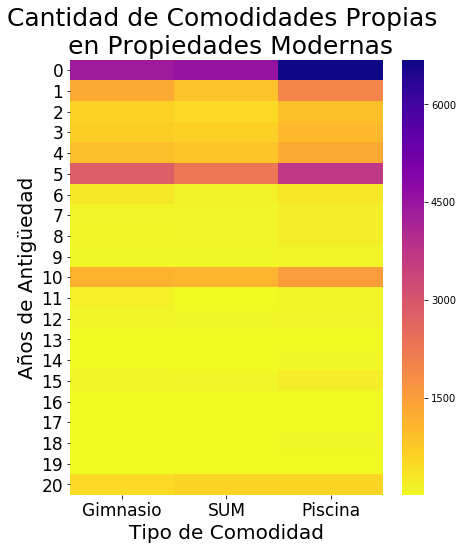

In [79]:
plt.figure(figsize=(7,8))
plot = sb.heatmap(df_comodidad_anios_propias[0:21], cmap = 'plasma_r', cbar = True)
# Un _r al final del colormap invierte el sentido.
plot.set_title('Cantidad de Comodidades Propias \n en Propiedades Modernas',fontsize = 25)
plot.set_xlabel('Tipo de Comodidad', fontsize = 20)
plot.set_ylabel('Años de Antigüedad', fontsize = 20)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center', va = 'top')
plt.yticks(fontsize = 17, rotation = 0)
plt.show()

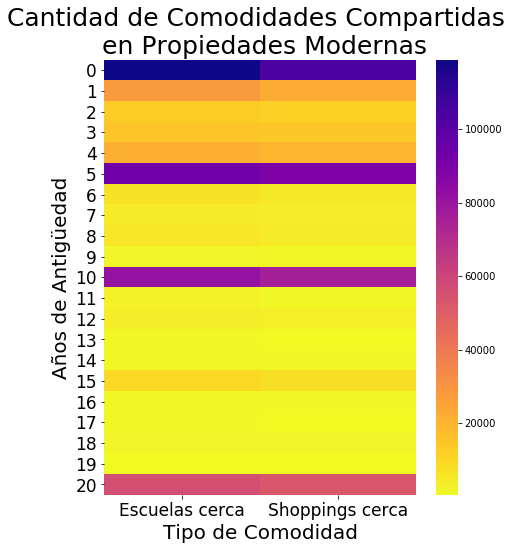

In [80]:
plt.figure(figsize=(7,8))
plot = sb.heatmap(df_comodidad_anios_compartidas[0:21]*5, cmap = 'plasma_r', cbar = True)
plot.set_title('Cantidad de Comodidades Compartidas \n en Propiedades Modernas',fontsize = 25)
plot.set_xlabel('Tipo de Comodidad', fontsize = 20)
plot.set_ylabel('Años de Antigüedad', fontsize = 20)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center', va = 'top')
plt.yticks(fontsize = 17, rotation = 0)
plt.show()

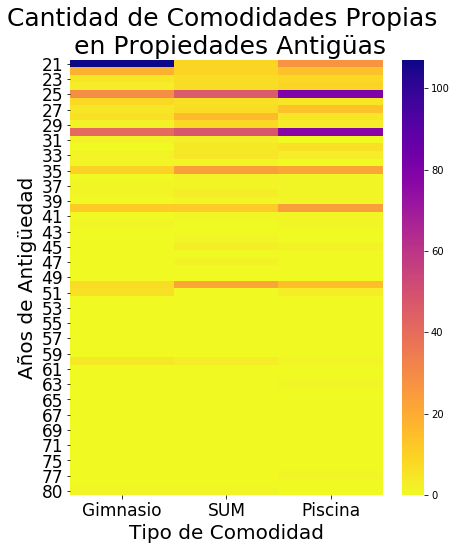

In [81]:
plt.figure(figsize=(7,8))
plot = sb.heatmap(df_comodidad_anios_propias[21:81], cmap = 'plasma_r', cbar = True)
plot.set_title('Cantidad de Comodidades Propias \n en Propiedades Antigüas',fontsize = 25)
plot.set_xlabel('Tipo de Comodidad', fontsize = 20)
plot.set_ylabel('Años de Antigüedad', fontsize = 20)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center', va = 'top')
plt.yticks(fontsize = 17, rotation = 0)
plt.show()

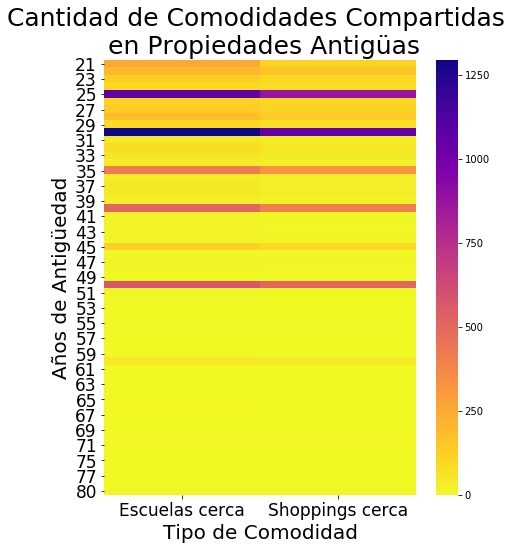

In [82]:
plt.figure(figsize=(7,8))
plot = sb.heatmap(df_comodidad_anios_compartidas[21:81], cmap = 'plasma_r', cbar = True)
plot.set_title('Cantidad de Comodidades Compartidas \n en Propiedades Antigüas',fontsize = 25)
plot.set_xlabel('Tipo de Comodidad', fontsize = 20)
plot.set_ylabel('Años de Antigüedad', fontsize = 20)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center', va = 'top')
plt.yticks(fontsize = 17, rotation = 0)
plt.show()

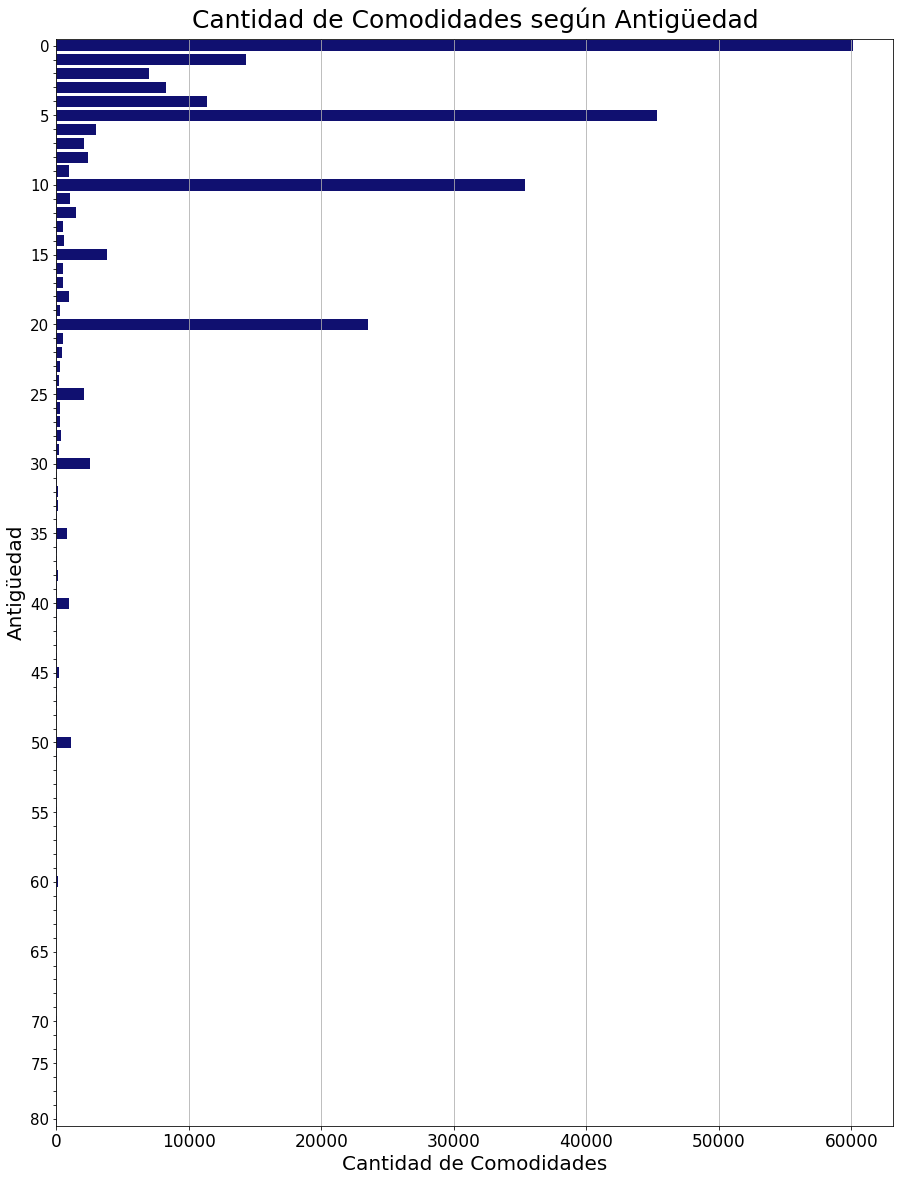

In [83]:
plt.figure(figsize = (15,20))
plot = sb.barplot(x = 'Total', y = 'Antiguedad', data = df_comodidad_anios[0:78], color = 'navy', orient = 'h')
plt.title('Cantidad de Comodidades según Antigüedad', fontsize = 25, y = 1.005)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center')
plt.yticks(fontsize = 15)
plt.ylabel('Antigüedad', fontsize = 20)
plt.xlabel('Cantidad de Comodidades', fontsize = 20)
plt.gca().xaxis.grid(True)

for label in plot.get_yticklabels():
    if np.int(label.get_text()) % 5 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
        
plt.show()

Las cantidades de los casos más antiguas son tan pequeñas que frente a los numeros casos nuevos no se perciben. Si se toman los últimos 49 años se tiene lo siguiente.

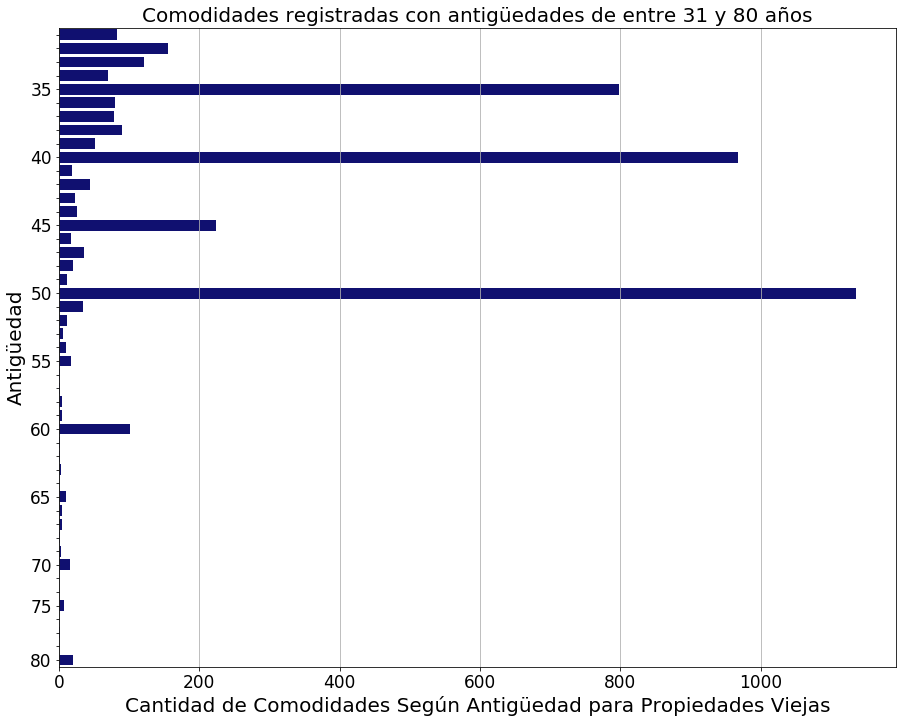

In [84]:
plt.figure(figsize = (15,11.75))
plot = sb.barplot(x = 'Total', y = 'Antiguedad', data = df_comodidad_anios[31:78], color = 'navy', orient = 'h')
plt.title('Comodidades registradas con antigüedades de entre 31 y 80 años', fontsize = 20)
plt.xticks(fontsize = 17, rotation = 0, ha = 'center')
plt.yticks(fontsize = 17)
plt.ylabel('Antigüedad', fontsize = 20)
plt.xlabel('Cantidad de Comodidades Según Antigüedad para Propiedades Viejas', fontsize = 20)
plt.gca().xaxis.grid(True)

for label in plot.get_yticklabels():
    if np.int(label.get_text()) % 5 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
        
plt.show()

### 2.4.3. ¿Cómo se distribuyen las cantidades de los tipos de comodidades por provincia?

In [85]:
df_comodidad = dfok[['Provincia', \
                     'TieneGimnasio', \
                     'TieneUsosMultiples', \
                     'TienePileta', \
                     'TieneEscuelasCerca', \
                     'TieneShoppingsCerca']].copy() # El copy es para diferenciarlo de dfok
# Se cambian tipos, salvo el de Provincia para detectar los casos nulos.
df_comodidad['TieneGimnasio'] = df_comodidad['TieneGimnasio'].astype(np.uint8)
df_comodidad['TieneUsosMultiples'] = df_comodidad['TieneUsosMultiples'].astype(np.uint8)
df_comodidad['TienePileta'] = df_comodidad['TienePileta'].astype(np.uint8)
df_comodidad['TieneEscuelasCerca'] = df_comodidad['TieneEscuelasCerca'].astype(np.uint8)
df_comodidad['TieneShoppingsCerca'] = df_comodidad['TieneShoppingsCerca'].astype(np.uint8)

# Se buscan los casos nulos y se calcula su proporción en los totales.
print('Casos nulos:')
print(df_comodidad.isnull().sum())
print('\nPropoción de casos nulos:', round(df_comodidad.isnull().sum().sum()/len(df_comodidad), 5))

# Se remueven los casos nulos.
df_comodidad.dropna(inplace = True)

# Se crea un nuevo DataFrame para el countplot. Solo se guardan los casos que poseen alguna comodidad.
# Se usan los noombres de las provincias y el tipo de comodidad. Luego se toman solo los casos que sí
# poseen la comodidad. Al final los tipos de comodidad se condensan en una sola columna: Comodidad.

# Gimnasio
como_gim = df_comodidad[['Provincia', 'TieneGimnasio']]
como_gim = como_gim.loc[como_gim['TieneGimnasio'] == 1].copy()
como_gim['TieneGimnasio'].replace({1:'Gimnasio'}, inplace = True)
como_gim.rename(columns = {'TieneGimnasio': 'Comodidad'}, inplace = True)

# Salón de Usos Múltiples
como_sum = df_comodidad[['Provincia', 'TieneUsosMultiples']]
como_sum = como_sum.loc[como_sum['TieneUsosMultiples'] == 1].copy()
como_sum['TieneUsosMultiples'].replace({1:'Salón Usos Múlt.'}, inplace = True)
como_sum.rename(columns = {'TieneUsosMultiples': 'Comodidad'}, inplace = True)

# Piscina
como_pil = df_comodidad[['Provincia', 'TienePileta']]
como_pil = como_pil.loc[como_pil['TienePileta'] == 1].copy()
como_pil['TienePileta'].replace({1:'Piscina'}, inplace = True)
como_pil.rename(columns = {'TienePileta': 'Comodidad'}, inplace = True)

# Escuelas cercanas
como_esc = df_comodidad[['Provincia', 'TieneEscuelasCerca']]
como_esc = como_esc.loc[como_esc['TieneEscuelasCerca'] == 1].copy()
como_esc['TieneEscuelasCerca'].replace({1:'Escuelas cerca'}, inplace = True)
como_esc.rename(columns = {'TieneEscuelasCerca': 'Comodidad'}, inplace = True)

# Centros Comerciales cercanos
como_ccc = df_comodidad[['Provincia', 'TieneShoppingsCerca']]
como_ccc = como_ccc.loc[como_ccc['TieneShoppingsCerca'] == 1].copy()
como_ccc['TieneShoppingsCerca'].replace({1:'Centros com. cerca'}, inplace = True)
como_ccc.rename(columns = {'TieneShoppingsCerca': 'Comodidad'}, inplace = True)

# Se unen los DataFrames por la columna Comodidad.
concatenado = pd.concat([como_gim, como_sum], sort = False)
concatenado = pd.concat([concatenado, como_pil], sort = False).copy()
concatenado = pd.concat([concatenado, como_esc], sort = False).copy()
concatenado = pd.concat([concatenado, como_ccc], sort = False).copy()

Casos nulos:
Provincia              155
TieneGimnasio            0
TieneUsosMultiples       0
TienePileta              0
TieneEscuelasCerca       0
TieneShoppingsCerca      0
dtype: int64

Propoción de casos nulos: 0.00065


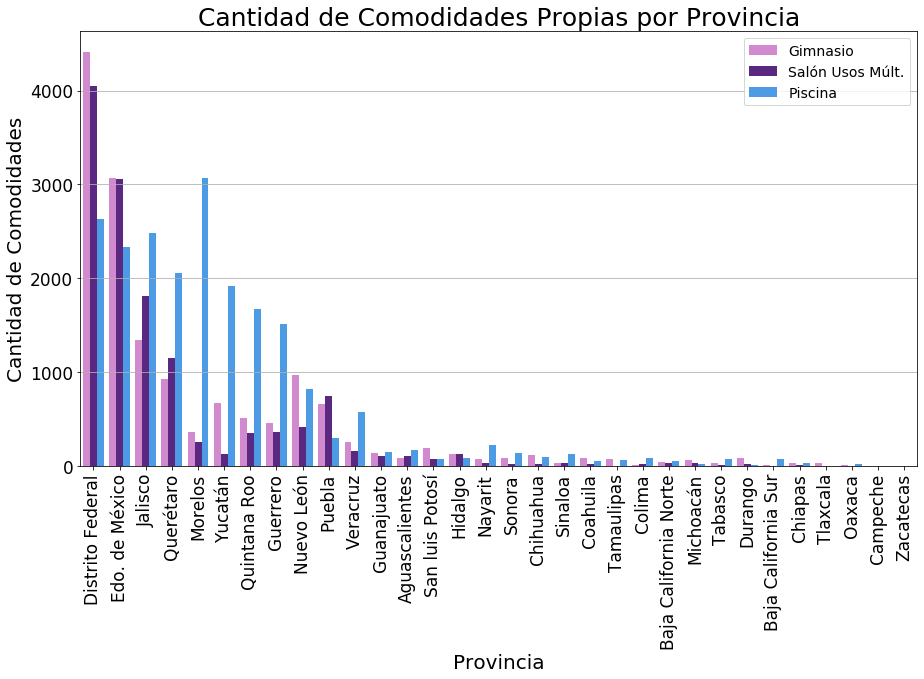

In [86]:
concatenado_propias = \
    concatenado\
        .loc[(concatenado['Comodidad'] != 'Escuelas cerca') & \
             (concatenado['Comodidad'] != 'Centros com. cerca')]\
        .copy()

plt.figure(figsize = (15, 8))
g = sb.countplot(x = 'Provincia', \
                 hue = 'Comodidad', \
                 data = concatenado_propias, \
                 order = concatenado_propias['Provincia'].value_counts().index, \
                 palette = ['orchid', 'indigo', 'dodgerblue'], \
                 linewidth = 0, edgecolor = 'dimgrey', \
                 alpha = 0.9) # 'hls' 'husl'
g.set_title('Cantidad de Comodidades Propias por Provincia', fontsize=25)
g.set_xlabel('Provincia', fontsize = 20, rotation = 0)
g.set_ylabel('Cantidad de Comodidades', fontsize = 20)
plt.xticks(fontsize=17, rotation = 90, ha = 'center')
plt.yticks(fontsize=17)
plt.legend(loc = 'upper right', fontsize = 14)
plt.gca().yaxis.grid(True)
plt.show()

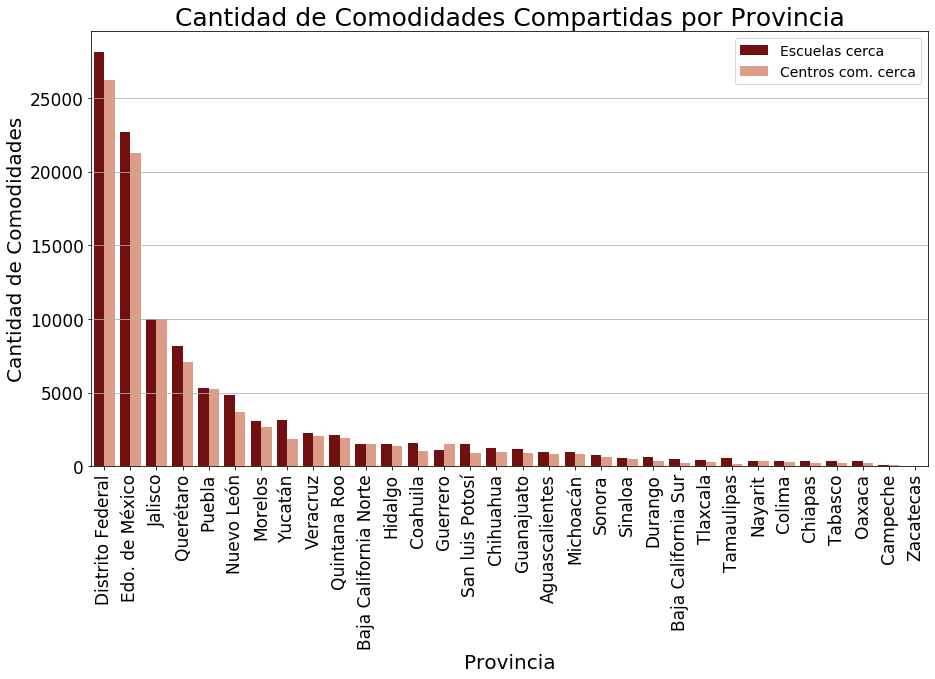

In [87]:
concatenado_compartidas = \
    concatenado\
        .loc[(concatenado['Comodidad'] == 'Escuelas cerca') | \
             (concatenado['Comodidad'] == 'Centros com. cerca')]\
        .copy()

plt.figure(figsize = (15, 8))
g = sb.countplot(x = 'Provincia', \
                 hue = 'Comodidad', \
                 data = concatenado_compartidas, \
                 order = concatenado_compartidas['Provincia'].value_counts().index, \
                 linewidth = 0, edgecolor = 'dimgray', \
                 palette = ['maroon', 'darksalmon'])
g.set_title('Cantidad de Comodidades Compartidas por Provincia', fontsize=25)
g.set_xlabel('Provincia', fontsize = 20, rotation = 0)
g.set_ylabel('Cantidad de Comodidades', fontsize = 20)
plt.xticks(fontsize=17, rotation = 90, ha = 'center')
plt.yticks(fontsize=17)
plt.legend(loc = 'upper right', fontsize = 14)
plt.gca().yaxis.grid(True)
plt.show()

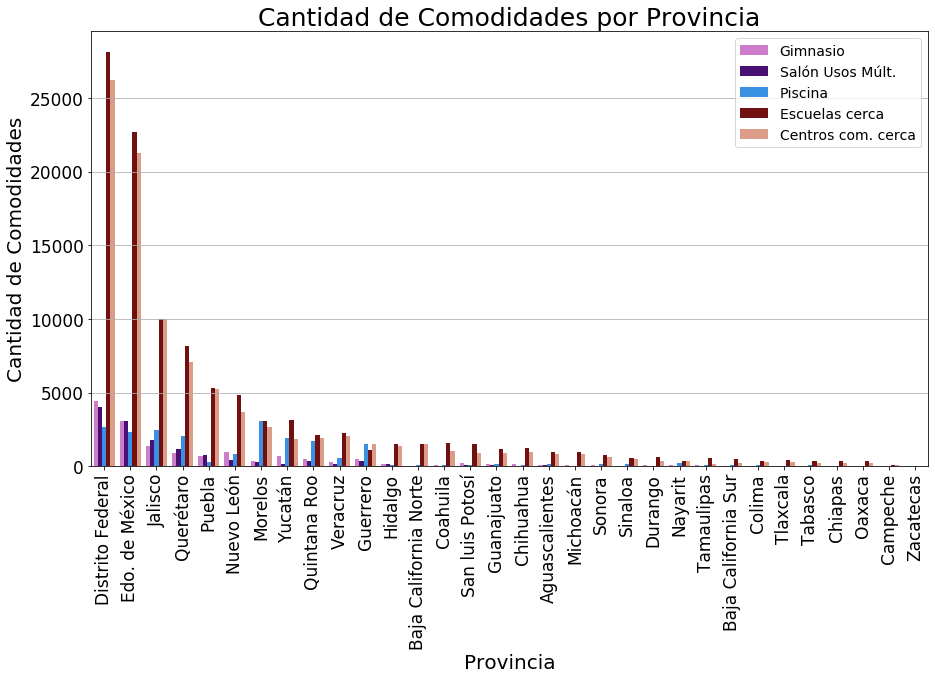

In [88]:
plt.figure(figsize = (15, 8))
g = sb.countplot(x = 'Provincia', \
                 hue = 'Comodidad', \
                 data = concatenado, \
                 order = concatenado['Provincia'].value_counts().index, \
                 palette = ['orchid', 'indigo', 'dodgerblue', 'maroon', 'darksalmon'], \
                 linewidth = 0, edgecolor = 'dimgray')
g.set_title('Cantidad de Comodidades por Provincia', fontsize = 25)
g.set_xlabel('Provincia', fontsize = 20, rotation = 0)
g.set_ylabel('Cantidad de Comodidades', fontsize = 20)
plt.xticks(fontsize=17, rotation = 90, ha = 'center')
plt.yticks(fontsize=17)
plt.legend(loc = 'upper right', fontsize = 14)
plt.gca().yaxis.grid(True)
plt.show()

Las provincias con más comodidades son las que más propiedades tienen.

### 2.4.4. ¿Cómo varía la cantidad de comodidades propias según los metros cuadrados?


In [89]:
dfok['CantLujos']=((dfok['TienePileta']) +
                    (dfok['TieneGimnasio']) + 
                    (dfok['TieneUsosMultiples'])
                    #+(dfok['CantGarages']>1)
                                              )

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:193: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


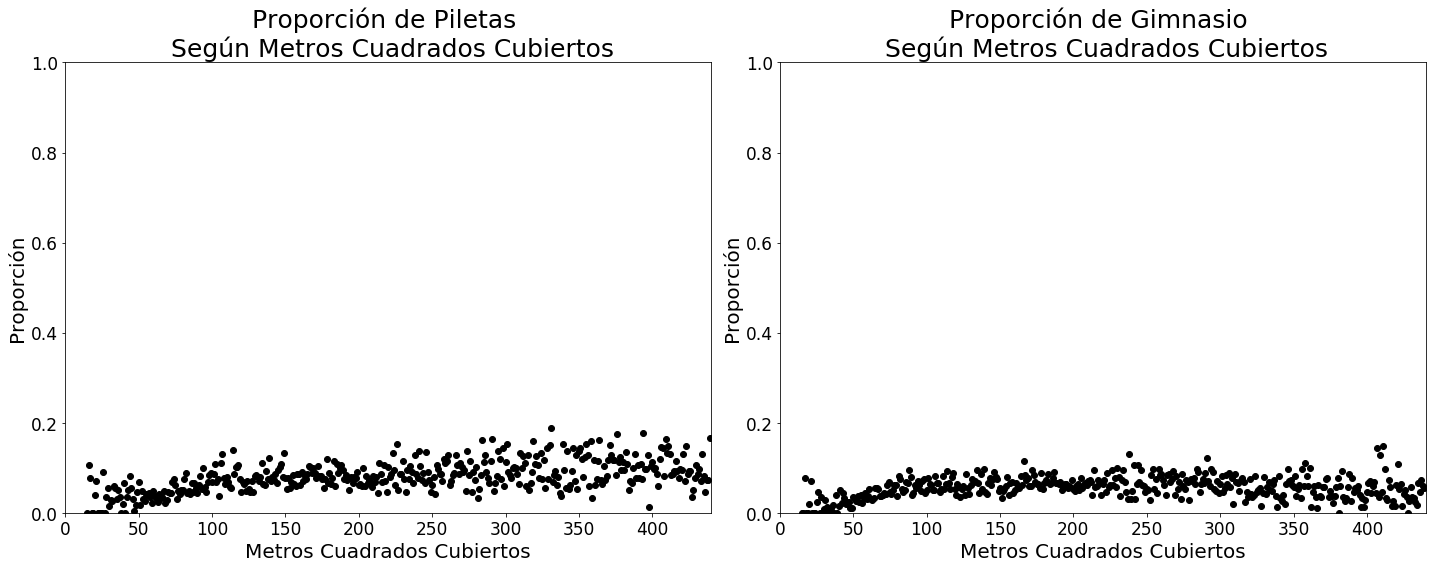

In [90]:
def proporcionCom(ax1, n, prop, yeje, titulo, comodidad):
    comodidadesPorMetro =  dfok.groupby(['MetrosCuadradosTotales']).agg({comodidad :['mean']})
    CantLujos= comodidadesPorMetro[comodidad]
    MetrosCuadrados=comodidadesPorMetro.index

    # Variables a graficar
    y = MetrosCuadrados
    x = CantLujos

    # Tamaño del gráfico
    ax1 = plt.subplot(n)

    # Tamaño de los títulos de los ejes
    plt.xlabel(yeje, fontsize = 20);
    plt.ylabel(prop, fontsize = 20);

    # Título
    plt.title(titulo, fontsize = 25)

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 17)
    plt.tick_params(axis='both', which='minor', labelsize = 17)

    # Rotar ejes
    #plt.xticks(rotation = 90)

    # Límites para cada coordenada
    plt.ylim([0, 1]);
    plt.xlim([0, 440]);

    #plt.xlim([-116, -86]);

    # Tipo de gráfico
    plt.plot(x, 'o', color='black')

fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(20,8))

proporcionCom(ax1, "121", "Proporción", "Metros Cuadrados Cubiertos", "Proporción de Piletas \n Según Metros Cuadrados Cubiertos", "TienePileta")
proporcionCom(ax2, "122", "Proporción", "Metros Cuadrados Cubiertos", "Proporción de Gimnasio \n Según Metros Cuadrados Cubiertos", \
              "TieneGimnasio")

plt.tight_layout()   


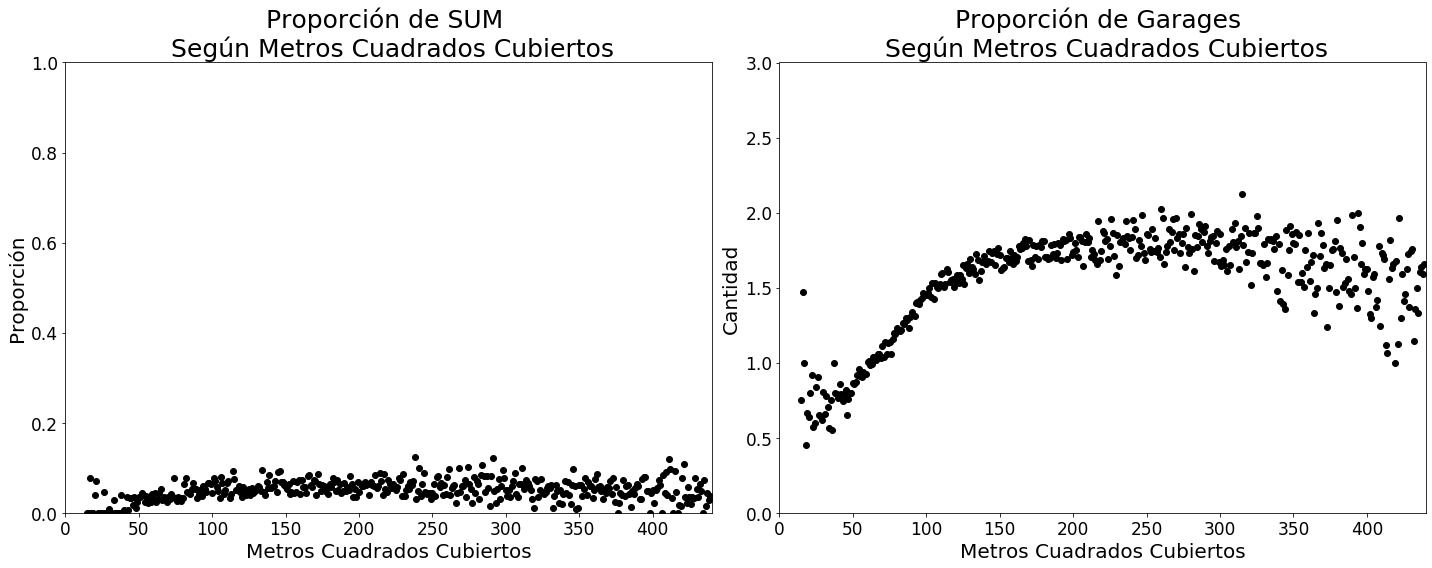

In [91]:
def proporcionCom(ax1, n, prop, yeje, titulo, comodidad, n2 = 1):
    comodidadesPorMetro =  dfok.groupby(['MetrosCuadradosTotales']).agg({comodidad :['mean']})
    CantLujos= comodidadesPorMetro[comodidad]
    MetrosCuadrados=comodidadesPorMetro.index

    # Variables a graficar
    y = MetrosCuadrados
    x = CantLujos

    # Tamaño del gráfico
    ax1 = plt.subplot(n)

    # Tamaño de los títulos de los ejes
    plt.xlabel(yeje, fontsize = 20);
    plt.ylabel(prop, fontsize = 20);

    # Título
    plt.title(titulo, fontsize = 25)

    # Tamaño de las letras de los ejes
    plt.tick_params(axis='both', which='major', labelsize = 17)
    plt.tick_params(axis='both', which='minor', labelsize = 17)

    # Rotar ejes
    #plt.xticks(rotation = 90)

    # Límites para cada coordenada
    plt.ylim([0, n2]);
    plt.xlim([0, 440]);

    #plt.xlim([-116, -86]);

    # Tipo de gráfico
    plt.plot(x, 'o', color='black')

fig, ((ax1, ax2)) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(20,8))

proporcionCom(ax1, "121", "Proporción", "Metros Cuadrados Cubiertos", "Proporción de SUM \n Según Metros Cuadrados Cubiertos", "TieneUsosMultiples")
proporcionCom(ax2, "122", "Cantidad", "Metros Cuadrados Cubiertos", "Proporción de Garages \n Según Metros Cuadrados Cubiertos", \
              "CantGarages", n2 = 3)

plt.tight_layout()   


ConversionError: Failed to convert value(s) to axis units: 'Garage'

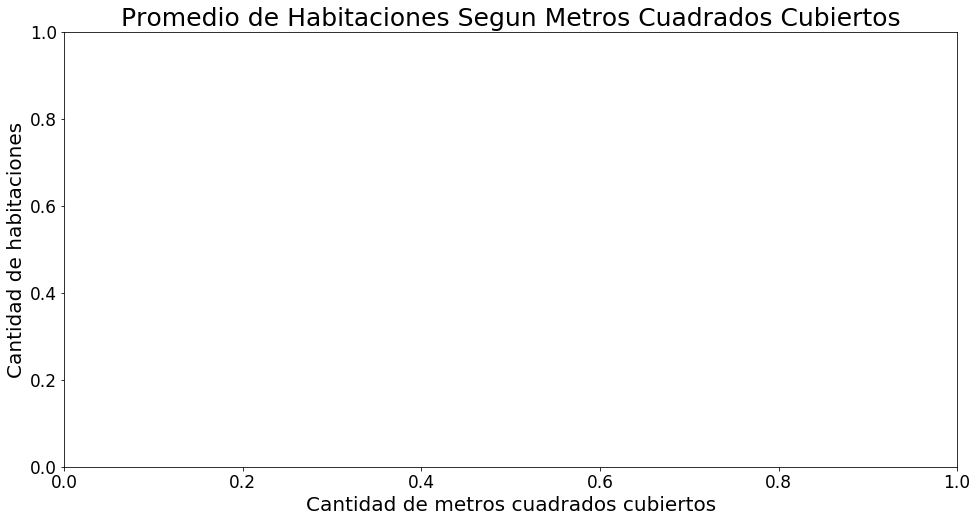

In [92]:
comodidadesPorMetro=dfok.groupby(['MetrosCuadradosCubiertos']).agg({"CantHabitaciones" :['mean']})

CantLujos= comodidadesPorMetro.CantHabitaciones
MetrosCuadrados=comodidadesPorMetro.index

# Variables a graficar
y = MetrosCuadrados
x = CantLujos

# Tamaño del gráfico
fig, ax = plt.subplots(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Cantidad de habitaciones", fontsize = 20);
plt.xlabel("Cantidad de metros cuadrados cubiertos", fontsize = 20);

# Título
plt.title("Promedio de Habitaciones Segun Metros Cuadrados Cubiertos", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
plt.ylim([0, e]);
plt.xlim([0, 440]);

#plt.xlim([-116, -86]);


# Tipo de gráfico
plt.plot(x, 'o', color='black')

In [ ]:
comodidadesPorMetro=dfok.groupby(['MetrosCuadradosCubiertos']).agg({"CantBanos" :['mean']})

CantLujos= comodidadesPorMetro.CantBanos
MetrosCuadrados=comodidadesPorMetro.index

# Variables a graficar
y = MetrosCuadrados
x = CantLujos

# Tamaño del gráfico
fig, ax = plt.subplots(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Cantidad promedio de baños", fontsize = 20);
plt.xlabel("Cantidad de metros cuadrados cubiertos", fontsize = 20);

# Título
plt.title("Promedio de Baños Segun Metros Cuadrados Cubiertos", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
plt.ylim([0, 7]);
plt.xlim([0, 440]);

#plt.xlim([-116, -86]);


# Tipo de gráfico
plt.plot(x, 'o', color='black')

A partir de los 150 metros cuadrados cubiertos, las comodidades tienden a estabilizarse, con leves perturbaciones en el extremo superior en la cantidad de metros cuadrados.

## 2.5. Influencia de las comodidades en el precio de la propiedad

### 2.5.1. ¿En qué medida influyen las comodidades en el precio de la propiedad?

In [ ]:
dfok2 = pd.DataFrame(dfok)
dfok2['NoTieneLujos']=((dfok['TienePileta']==0) & 
                    (dfok['TieneGimnasio']==0) & 
                    (dfok['TieneUsosMultiples']==0) &
                       (dfok['CantGarages']<=1))

propiedadesSinLujos=dfok2[ (dfok2['NoTieneLujos']) ]

Simples=propiedadesSinLujos #simples son,entonces,viviendas propiedades sin lujos
Simples['Precio'].mean() 

ConGimnasio=dfok[ (dfok['TieneGimnasio'] == 1) ]
ConGimnasio['Precio'].median()

ConPileta=dfok[ (dfok['TienePileta'] == 1) ]
ConPileta['Precio'].median()

ConSalonMultiple=dfok[ (dfok['TieneUsosMultiples'] == 1)  ]
ConSalonMultiple['Precio'].mean()

ConMasDeUnGarage=dfok[ (dfok['CantGarages'] > 1) ]
ConMasDeUnGarage['Precio'].median()
#Esto se considera como un lujo porque la gran mayoria de las familias puede vivir con un unico auto


AtributosPrescindibles = pd.DataFrame({'Atributos de viviendas':['Sin comodidades', 'Con Garaje múltiple' , \
                                                                 'Con Pileta','Con Gimnasio','Con SUM'], \
                       'Precio':[Simples['Precio'].mean() , ConMasDeUnGarage['Precio'].mean() , \
                        ConPileta['Precio'].mean() , ConGimnasio['Precio'].mean(), \
                              ConSalonMultiple['Precio'].mean()]})      

x = AtributosPrescindibles['Atributos de viviendas']
y = AtributosPrescindibles['Precio']
grafico = plt.figure(figsize = (15, 7));

# Tamaño de los títulos de los ejes
plt.xlabel("Comodidades", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.rcParams.update( { 'axes.titlesize':'25' } )
plt.title("Precio Promedio Según Comodidades")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 0)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black', width = 0.4)


In [ ]:
def evaluarAtributo(atributo, titulo, nomAtributo):
    print("Comparación de promedios")
    print([ dfok[ dfok[atributo] == True]['Precio'].mean(),  dfok['Precio'].mean() ])
    
    ##########################
    
    dfprovs = dfok.groupby('Provincia')['Precio'].mean()
    dfprovs = dfprovs.to_frame()
    
    dfesc = dfok[ dfok[atributo] == True].groupby('Provincia')['Precio'].mean()
    dfesc = dfesc.to_frame()
    
    dfesc = dfesc.rename(columns = {'Precio':'PrecioEsc'} )
    
    ################
    ancho = 0.3
    fig, ax = plt.subplots(figsize = (20, 25))
    
    x = np.arange(len(prov))
    
    dfcomp = dfprovs.merge(dfesc, how = 'left', on = 'Provincia')
    dfcomp = dfcomp.fillna(0);
    plt.barh(x - (ancho/2), dfcomp['Precio'], ancho, color = 'red', label = 'General')
    plt.barh(x + (ancho/2), dfcomp['PrecioEsc'], ancho, color = 'black', label = nomAtributo)
    
    plt.yticks( np.arange(len(prov)), np.arange(len(prov)) + 1)
    ax.set_yticklabels(prov, fontsize=17)
    
    plt.title(titulo + " " + nomAtributo, fontsize = 25)
    
    p1 = plt.xlabel("Precio Promedio", fontsize = 20);
    p2 = plt.ylabel("Provincia", fontsize = 20);
    plt.autoscale(tight = True)
    
    plt.tick_params(axis='both', which='major', labelsize = 17)
    plt.tick_params(axis='both', which='minor', labelsize = 17)
    plt.legend(prop={'size': 14})
    
    ax.invert_yaxis()

In [ ]:
evaluarAtributo('TienePileta', "Precio Promedio por Provincia Contrastando el Impacto de la", "Pileta") #28 de 32, clara tendencia a aumentar el precio

In [ ]:
evaluarAtributo('TieneUsosMultiples', "Precio Promedio por Provincia Contrastando el Impacto del", "SUM") #27 de 32, clara tendencia a aumentar el precio

In [ ]:
evaluarAtributo('TieneGimnasio', "Precio Promedio por Provincia Contrastando el Impacto del", "Gimnasio") #31 de 32, clara tendencia a aumentar el precio

In [ ]:
    print("Comparación de promedios")
    print([ dfok[ dfok['CantGarages'] >1]['Precio'].mean(),  dfok['Precio'].mean() ])
    
    ##########################
    
    dfprovs = dfok.groupby('Provincia')['Precio'].mean()
    dfprovs = dfprovs.to_frame()
    
    dfesc = dfok[  dfok['CantGarages'] >1].groupby('Provincia')['Precio'].mean()
    dfesc = dfesc.to_frame()
    
    dfesc = dfesc.rename(columns = {'Precio':'PrecioEsc'} )
    
    ################
    ancho = 0.3
    fig, ax = plt.subplots(figsize = (20, 25))
    
    x = np.arange(len(prov))
    
    dfcomp = dfprovs.merge(dfesc, how = 'left', on = 'Provincia')
    dfcomp = dfcomp.fillna(0);
    plt.barh(x - (ancho/2), dfcomp['Precio'], ancho, color = 'red', label = 'General')
    plt.barh(x + (ancho/2), dfcomp['PrecioEsc'], ancho, color = 'black', label = 'Multi Garage')
    
    plt.yticks( np.arange(len(prov)), np.arange(len(prov)) + 1)
    ax.set_yticklabels(prov, fontsize=17)
    
    plt.title("Precio Promedio por Provincia Contrastando el Impacto del Garage Múltiple", fontsize = 25)
    
    p1 = plt.xlabel("Precio Promedio", fontsize = 20);
    p2 = plt.ylabel("Provincia", fontsize = 20);
    plt.autoscale(tight = True)
    
    plt.tick_params(axis='both', which='major', labelsize = 17)
    plt.tick_params(axis='both', which='minor', labelsize = 17)
    plt.legend(prop={'size': 14})
    
    ax.invert_yaxis()

Parece que las comodidades aumentaran el precio de las propiedades. Se quiere ahora visualizar el impacto de cada una de forma exclusiva. 

In [ ]:
SoloConGimnasio=dfok[ (dfok['TienePileta'] == 0) & 
                        (dfok['TieneGimnasio'] == 1) & 
                        (dfok['CantGarages'] <= 1) & 
                        (dfok['TieneUsosMultiples'] == 0) ]
SoloConPileta=dfok[ (dfok['TienePileta'] == 1) & 
                        (dfok['TieneGimnasio'] == 0) & 
                        (dfok['CantGarages'] <= 1) & 
                        (dfok['TieneUsosMultiples'] == 0) ]
SoloConMasDeUnGarage=dfok[ (dfok['TienePileta'] == 0) & 
                        (dfok['TieneGimnasio'] == 0) & 
                        (dfok['CantGarages'] > 1) & 
                        (dfok['TieneUsosMultiples'] == 0) ]
SoloConSalonMultiple=dfok[ (dfok['TienePileta'] == 0) & 
                        (dfok['TieneGimnasio'] == 0) & 
                        (dfok['CantGarages'] <= 1) & 
                        (dfok['TieneUsosMultiples'] == 1) ]

AtributosPrescindibles = pd.DataFrame({'Atributos de viviendas':['Sin comidades', 'Solo garaje múltiple' , 'Solo pileta','Solo gimnasio','Solo salón múltiple'], \
                       'Precio':[Simples['Precio'].mean() , SoloConMasDeUnGarage['Precio'].mean() , \
                        SoloConPileta['Precio'].mean() , SoloConGimnasio['Precio'].mean(), \
                              SoloConSalonMultiple['Precio'].mean()]})
AtributosPrescindibles.head()       

x = AtributosPrescindibles['Atributos de viviendas']
y = AtributosPrescindibles['Precio']
grafico = plt.figure(figsize = (15, 7));

# Tamaño de los títulos de los ejes
plt.xlabel("Comodidad", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.rcParams.update( { 'axes.titlesize':'25' } )
plt.title("Precio Promedio Según Comodidades Exclusivas")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 0)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black', width = 0.4)


In [ ]:
cantidadSimples=len(Simples)
cantidadSimples

cantidadConGimnasio=len(ConGimnasio)
cantidadSoloConGimnasio=len(SoloConGimnasio)

cantidadConPileta=(len(ConPileta))
cantidadSoloConPileta=(len(SoloConPileta))

cantidadConSalonMultiple=(len(ConSalonMultiple))
cantidadSoloConSalonMultiple=(len(SoloConSalonMultiple))

cantidadConMasDeUnGarage=(len(ConMasDeUnGarage))
cantidadSoloConMasDeUnGarage=(len(SoloConMasDeUnGarage))

labels = ['Garaje múltiple', 'Pileta','Gimnasio', 'Salón múltiple']
MultiplesAtributos = [cantidadConMasDeUnGarage, cantidadConPileta ,cantidadConGimnasio,cantidadConSalonMultiple]
UnicoAtributo = [cantidadSoloConMasDeUnGarage, cantidadSoloConPileta ,cantidadSoloConGimnasio,cantidadSoloConSalonMultiple]

x = np.arange(len(labels))  # the label locations
width = 0.24  # the width of the bars

fig, ax =plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - width, MultiplesAtributos, width, color='red', label='Multiples Comodidades')
rects2 = ax.bar(x, UnicoAtributo, width, color='blue', label='Comodidad Única')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Comodidades de viviendas', fontsize=20)
ax.set_title('Contraste de Cantidad de Comodidades por Propiedad', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)


plt.tick_params(axis='both', which='minor', labelsize = 17)
ax.legend(fontsize=17)


#autolabel(rects1)
#autolabel(rects2)

plt.show()


In [ ]:
df_aux = dfok.copy()
def rango_del_precio(df):
    if df["Precio"] <= 1000000:
        return "0\$ - 1 000 000\$"
    elif 1000000 < df["Precio"] <= 2000000:
        return "1 000 000\$ - 2 000 000\$"
    elif 2000000 < df["Precio"] <= 3000000:
        return "2 000 000\$ - 3 000 000\$"
    elif 3000000 < df["Precio"] <= 4000000:
        return "3 000 000\$ - 4 000 000\$"
    elif 4000000 < df["Precio"] <= 6000000:
        return "4 000 000\$ - 6 000 000\$"
    elif 6000000 < df["Precio"] <= 8000000:
        return "6 000 000\$ - 8 000 000\$"
    elif 8000000 < df["Precio"] <= 10000000:
        return "8 000 000\$ - 10 000 000\$"
    elif 10000000 < df["Precio"]:
        return "10 000 000\$ - 13 000 000\$"

df_aux["RangoDePrecios"] = df_aux.apply(rango_del_precio, axis=1)

df_aux = df_aux[["RangoDePrecios", "TieneGimnasio", "TieneUsosMultiples", "TienePileta", "TieneEscuelasCerca", "TieneShoppingsCerca"]]

df_rango = df_aux.groupby("RangoDePrecios").mean().reset_index()

"""Reordeno una fila del DF a mano para que se vean en el orden correcto los rangos de precios"""
temp = df_rango.iloc[2].copy()
df_rango.drop(df_rango.index[2], inplace=True)
df_rango = df_rango.append(temp)

df_rango.index = df_rango["RangoDePrecios"]

df_rango = df_rango.drop("RangoDePrecios", axis=1)

fig = plt.figure(figsize = (15,  8))
ax = fig.add_subplot(111)
ax.set_aspect('auto')

# Ajustar tamaño de los títulos de los ejes


# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)


ax = sb.heatmap(df_rango*100,cmap="PuBu", cbar=False);
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([8, 16, 24, 32, 40])
cbar.set_ticklabels(["8%", "16%", "24%", "32%", "40%"])
plt.title("Comodidades Según el Rango de Precios", fontsize=25);




### 2.5.2. ¿Cómo se distribuyen los precios según las comodidades propias por provincia? 

In [ ]:
columnas = ['Ciudad',
            'Provincia',
            'TieneGimnasio',
            'TieneUsosMultiples',
            'TienePileta',
            'TieneEscuelasCerca',
            'TieneShoppingsCerca',
            'Precio'] 
df_abool = dfok[columnas].copy()

En el análisis exploratorio de Navent se indica que los nombres de ciudades y provincias son String, el precio se representa con tipo entero y las demás columnas de comodidades son Booleanas.

Se crea un nuevo DataFrame df_abool que copia columnas de interés del DataFrame original.

In [ ]:
df_abool.dropna(subset=['Provincia'], inplace=True)
df_abool.isnull().sum()

A continuación se verifica qué proporción de valores nulos de ciudades por provincia queda, para ver si es correcto eliminarlas.

In [ ]:
# Se crea un DataFrame donde solo se almacenan los casos con valores nulos de ciudades
cant_nulos_provincia = df_abool.loc[df_abool['Ciudad'].isnull() == True].copy() # Devuelve un DataFrame
# Se elije solo la columna Provincia y se realiza un conteo. Devuelve una Serie
cant_nulos_provincia = cant_nulos_provincia['Provincia'].value_counts() # Devuelve una Serie
# Se transforma la Serie a DataFrame
cant_nulos_provincia = cant_nulos_provincia.to_frame()
# Se resetea el índice para tener una columna con el nombre de las provincias
cant_nulos_provincia.reset_index(inplace = True)
# Se cambia el nombre a la columna de las provincias
cant_nulos_provincia.rename(columns = {'index' : 'Provincia', 'Provincia' : 'cant_nulos'}, inplace = True)
# Se ordena alfabéticamente por nombre de provincia
cant_nulos_provincia.sort_values(by='Provincia', ascending = True, inplace = True)
cant_nulos_provincia.reset_index(drop = True, inplace=True)

Con esto se tiene un DataFrame con una columna con los nombres de las provincias y otra con la cantidad correspondiente de ciudades nulas.

Luego se crea un DataFrame con la cantidad total de casos por provincia, que luego que compara con los casos nulos.

In [ ]:
cant_total_provincia = df_abool['Provincia'] # Devuelve una Serie
# Se convierto a DataFrame
cant_total_provincia = cant_total_provincia.value_counts().to_frame()
# Se resetea el índice para tener una columna con el nombre de las provincias
cant_total_provincia.reset_index(inplace = True)
# Se cambia el nombre a la columna de las provincias
cant_total_provincia.rename(columns = {'index' : 'Provincia', 'Provincia' : 'cant_total'}, inplace = True)
# Se ordena alfabéticamente por nombre de provincia
cant_total_provincia.sort_values(by = 'Provincia', ascending = True, inplace = True)
cant_total_provincia.reset_index(drop = True, inplace = True)

El DataFrame `cant_total_provincia` tiene una columna con los nombres de las provincias y otra con la cantidad total de provincias.

### Merge de `cant_nulos_provincia` con `cant_total_provincia`

1. DataFrame izquierdo `cant_nulos_provincia`
- DataFrame derecho `cant_total_provincia`
 
La unión se realiza sobre la columna Provincia.

In [ ]:
df_joined = pd.merge(cant_nulos_provincia, cant_total_provincia, on='Provincia', how = 'inner')

Como en `cant_nulos_provincia` había ceros (casos de provincias sin valores nulos), se seleccionan solo los casos distintos de cero. Recordar que se quiere eliminar los nulos.

In [ ]:
df_joined = df_joined.loc[df_joined['cant_nulos'] != 0].copy()
df_joined.reset_index(drop = True, inplace = True)
# Ya se tiene un DataFrame para calcular la proporción de los valores nulos en los totales (por provincia)

Se ve que no representan más del 1% de los casos totales. Enonces se pueden eliminar.

In [ ]:
df_abool.dropna(inplace = True)

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(fontsize = 17, rotation = 30, ha = 'right')
plt.yticks(fontsize = 17)
plt.ylim([0, 13000000])
#sb.set(style = 'whitegrid')
plt.title("Distribución del Precio de Propiedades Con y Sin Comodidades", fontsize = 25)
plot = plt.boxplot([df_abool.loc[df_abool['TieneGimnasio'] == True]['Precio'], \
                    df_abool.loc[df_abool['TieneGimnasio'] == False]['Precio'], \
                    df_abool.loc[df_abool['TieneUsosMultiples'] == True]['Precio'], \
                    df_abool.loc[df_abool['TieneUsosMultiples'] == False]['Precio'], \
                    df_abool.loc[df_abool['TienePileta'] == True]['Precio'], \
                    df_abool.loc[df_abool['TienePileta'] == False]['Precio'], \
                    df_abool.loc[df_abool['TieneEscuelasCerca'] == True]['Precio'], \
                    df_abool.loc[df_abool['TieneEscuelasCerca'] == False]['Precio'], \
                    df_abool.loc[df_abool['TieneShoppingsCerca'] == True]['Precio'], \
                    df_abool.loc[df_abool['TieneShoppingsCerca'] == False]['Precio']], 
                   labels = ['Con gimnasio', 'Sin gimnasio', \
                             'Con SUM', 'Sin SUM', \
                             'Con piscina', 'Sin piscina', \
                             'Con escuelas cerca', 'Sin escuelas cerca', \
                             'Con shoppings cerca', 'Sin shoppings cerca'],
                   widths = 0.5, \
                   meanline = True, showmeans=True, \
                   boxprops = dict(linewidth=2), \
                   meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'), \
                   # linestyle = '-' muestra la media con línea sólida
                   flierprops = dict(marker='o', markerfacecolor='none', markersize=5, \
                                     linestyle='none', markeredgecolor = 'darkgrey'), \
                   medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.xlabel('Disponibilidad', fontsize = 20)
plt.ylabel('Precio', fontsize = 20)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.gca().yaxis.grid(True)
#sb.set(style = 'white')
plt.show()

Observando las comodidades propias de las propiedades (gimnasio, Salón de usos múltiples y piscina), se nota que los precios aumentan, lo que es esperable.

La cercanía a comodidades compartidas (escuelas y centros comerciales) no modifica de manera apreciable el valor medio del precio de las propiedades.

In [ ]:
# Se cuentan las propiedades con comodidades exclusivas.
solo_gimnasio = len(df_abool.loc[(df_abool['TieneGimnasio'] == True) & \
                                 (df_abool['TieneUsosMultiples'] == False) & \
                                 (df_abool['TienePileta'] == False)])

solo_sum = len(df_abool.loc[(df_abool['TieneGimnasio'] == False) & \
                            (df_abool['TieneUsosMultiples'] == True) & \
                            (df_abool['TienePileta'] == False)])

solo_piscina = len(df_abool.loc[(df_abool['TieneGimnasio'] == False) & \
                                (df_abool['TieneUsosMultiples'] == False) & \
                                (df_abool['TienePileta'] == True)])

print('Solo con gimnasio:', solo_gimnasio, \
      '\nSolo con salón de usos múltiples:', solo_sum, \
      '\nSolo con piscina:', solo_piscina)
proporcion = (solo_gimnasio + solo_sum + solo_piscina)*100/len(dfok)
print('Proporción de estos casos respecto del total:', round(proporcion,2), '%')

Como son muy pocos casos se va a tratar la distribuciones de comodidades de manera inclusiva, sin preocupación de si tienen o no otro tipo de amenidad.

In [ ]:
# Se referencian los datos para los distintos gráficos.
con_gimnasio = df_abool.loc[df_abool['TieneGimnasio'] == 1]
con_sum = df_abool.loc[df_abool['TieneUsosMultiples'] == 1]
con_piscina = df_abool.loc[df_abool['TienePileta'] == 1]

A continuación se generan DataFrames para tener una lista ordenada con los nombres de las provincias:
1. Se arma un DataFrame agrupando por `Provincia` y realizando una agregación por media de `Precio`;
- Se le cambia el nombre a la columna `{'Precio':'Media Precio'}`;
- Se ordena de mayor a menor por `Media Precio`;
- Se resetea el índice para tener una columna `Provincia` con los nombres de las provincias.


In [ ]:
con_gimnasio_orden_media = con_gimnasio.groupby('Provincia').agg({'Precio':'mean'})
con_gimnasio_orden_media.rename(columns = {'Precio' : 'Media Precio'}, inplace=True)
con_gimnasio_orden_media.sort_values(by='Media Precio', ascending = False, inplace = True)
con_gimnasio_orden_media.reset_index(inplace = True)

con_sum_orden_media = con_sum.groupby('Provincia').agg({'Precio':'mean'})
con_sum_orden_media.rename(columns = {'Precio' : 'Media Precio'}, inplace=True)
con_sum_orden_media.sort_values(by='Media Precio', ascending = False, inplace = True)
con_sum_orden_media.reset_index(inplace = True)

con_piscina_orden_media = con_piscina.groupby('Provincia').agg({'Precio':'mean'})
con_piscina_orden_media.rename(columns = {'Precio' : 'Media Precio'}, inplace=True)
con_piscina_orden_media.sort_values(by='Media Precio', ascending = False, inplace = True)
con_piscina_orden_media.reset_index(inplace = True)

In [ ]:
# Gráfico de distribución de precios de propiedades con gimnasio.
plt.figure(figsize = (15,8))
plt.ylim([0, 13000000])
plt.boxplot([
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][0]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][1]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][2]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][3]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][4]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][5]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][6]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][7]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][8]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][9]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][10]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][11]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][12]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][13]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][14]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][15]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][16]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][17]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][18]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][19]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][20]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][21]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][22]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][23]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][24]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][25]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][26]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][27]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][28]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][29]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][30]]['Precio'], \
    con_gimnasio.loc[con_gimnasio['Provincia'] == con_gimnasio_orden_media['Provincia'][31]]['Precio']], \
    labels = con_gimnasio_orden_media['Provincia'],             
    widths = 0.8,             
    meanline = True, showmeans = True,             
    boxprops = dict(linewidth=1),             
    meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'),             
    # linestyle = '-' muestra la media con línea sólida
    showfliers = True,
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, linestyle='none', markeredgecolor = 'darkgrey'), \
    medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.title('Distribución de Precios Promedio por Provincia\nPropiedades Con Gimnasio', fontsize = 25)
plt.ylabel('Precios promedios', fontsize = 20)
plt.xlabel('Provincias', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 17)
plt.yticks(fontsize = 17)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.gca().yaxis.grid(True)
plt.show()

In [ ]:
# Gráfico de distribución de precios de propiedades con salón de usos múltiples.
plt.figure(figsize = (15,8))
plt.ylim([0, 13000000])
plt.boxplot([
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][0]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][1]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][2]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][3]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][4]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][5]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][6]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][7]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][8]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][9]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][10]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][11]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][12]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][13]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][14]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][15]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][16]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][17]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][18]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][19]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][20]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][21]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][22]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][23]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][24]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][25]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][26]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][27]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][28]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][29]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][30]]['Precio'], \
    con_sum.loc[con_sum['Provincia'] == con_sum_orden_media['Provincia'][31]]['Precio']], \
    labels = con_sum_orden_media['Provincia'],             
    widths = 0.8,             
    meanline = True, showmeans = True,             
    boxprops = dict(linewidth=1),             
    meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'),             
    # linestyle = '-' muestra la media con línea sólida
    showfliers = True,
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, linestyle='none', markeredgecolor = 'darkgrey'), \
    medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.title('Distribución de Precios Promedio por Provincia\nPropiedades Con SUM', fontsize = 25)
plt.ylabel('Precios', fontsize = 20)
plt.xlabel('Provincias', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 17)
plt.yticks(fontsize = 17)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.gca().yaxis.grid(True)
plt.show()

In [ ]:
# Gráfico de distribución de precios de propiedades con piscina.
plt.figure(figsize = (15,8))
plt.ylim([0, 13000000])
plt.boxplot([
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][0]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][1]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][2]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][3]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][4]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][5]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][6]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][7]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][8]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][9]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][10]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][11]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][12]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][13]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][14]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][15]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][16]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][17]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][18]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][19]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][20]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][21]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][22]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][23]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][24]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][25]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][26]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][27]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][28]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][29]]['Precio'], \
    con_piscina.loc[con_piscina['Provincia'] == con_piscina_orden_media['Provincia'][30]]['Precio']], \
    labels = con_piscina_orden_media['Provincia'],
    widths = 0.8,             
    meanline = True, showmeans = True,             
    boxprops = dict(linewidth=1),             
    meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'),             
    # linestyle = '-' muestra la media con línea sólida
    showfliers = True,
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, linestyle='none', markeredgecolor = 'darkgrey'),\
    medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.title('Distribución de Precios Promedio por Provincia\nPropiedades Con Piscina', fontsize = 25)
plt.ylabel('Precios', fontsize = 20)
plt.xlabel('Provincias', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 17)
plt.yticks(fontsize = 17)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.gca().yaxis.grid(True)
plt.show()

Ahora se estudia la distribución de precios por provincia.

In [ ]:
# Se crea la lista de provincias ordenadas por media de precios de propiedades.
df_abool_orden_media = df_abool.groupby('Provincia').agg({'Precio':'mean'})
df_abool_orden_media.rename(columns = {'Precio' : 'Media Precio'}, inplace=True)
df_abool_orden_media.sort_values(by='Media Precio', ascending = False, inplace = True)
df_abool_orden_media.reset_index(inplace = True)

In [ ]:
# Gráfico de distribución de precios de propiedades por provincia.
plt.figure(figsize = (15,8))
plt.ylim([0, 13000000])
plt.boxplot([
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][0]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][1]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][2]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][3]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][4]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][5]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][6]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][7]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][8]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][9]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][10]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][11]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][12]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][13]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][14]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][15]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][16]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][17]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][18]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][19]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][20]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][21]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][22]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][23]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][24]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][25]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][26]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][27]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][28]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][29]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][29]]['Precio'], \
    df_abool.loc[df_abool['Provincia'] == df_abool_orden_media['Provincia'][30]]['Precio']], \
    labels = df_abool_orden_media['Provincia'],             
    widths = 0.8,             
    meanline = True, showmeans = True,             
    boxprops = dict(linewidth=1),             
    meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'),             
    # linestyle = '-' muestra la media con línea sólida
    showfliers = True,
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, linestyle='none', markeredgecolor = 'darkgrey'), \
    medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.title('Distribución de Precios Promedio de Propiedades con Comodidad Propia', fontsize = 25)
plt.ylabel('Precios', fontsize = 20)
plt.xlabel('Provincias', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 17)
plt.yticks(fontsize = 17)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.gca().yaxis.grid(True)
plt.show()

Todas las medianas están por debajo de las medias.

Luego se busca la provincia que más registro de comodidades tiene, para ver si se comporta de la misma manera.

In [ ]:
# Se agrupa por provincias y se suman las comodidades por tipo.
cant_registros_provincia = \
    df_abool\
        .groupby('Provincia')\
        .agg({'TieneGimnasio':'sum', \
              'TieneUsosMultiples':'sum', \
              'TienePileta':'sum', \
              'TieneEscuelasCerca':'sum', \
              'TieneShoppingsCerca':'sum'})
# Se agrega una columna que suma el total de las comodidades por provincia.
cant_registros_provincia['Total'] = cant_registros_provincia.sum(axis = 1)
# Se ordena de forma descendente por total de comodidades por provincia.
cant_registros_provincia.sort_values(by = 'Total', ascending = False, inplace = True)
# Se ubica la provincia con más comodidades registradas.
cant_registros_provincia.iloc[0].to_frame().T

In [ ]:
# Otra forma de encontrar la provincia con más comodidades (sin ordenar).
cant_registros_provincia\
    .loc[cant_registros_provincia['Total'] == cant_registros_provincia['Total'].max()]

La provincia con más comodidades anotadas es Distrito Federal.

In [ ]:
# Se crea un DataFrame para tener un orden por promedio de precios en ciudades de Distrito Federal.
distrito_federal = df_abool.loc[df_abool['Provincia'] == 'Distrito Federal'].copy()
# Se agrupa por ciudades, se se calcula la media y se ordena de manera descendente.
distrito_federal_ciudades_orden_media = \
    distrito_federal\
        .groupby('Ciudad')\
        .agg({'Precio':'mean'})\
        .sort_values(by = 'Precio', ascending = False)
# Se renombra la columna
distrito_federal_ciudades_orden_media.columns = ['Media Precio']
# Se resetea el índice para tener la columna Ciudad.
distrito_federal_ciudades_orden_media.reset_index(inplace = True)

In [ ]:
# Gráfico de distribución de precios de propiedades en Distrito Federal, por ciudad.
plt.figure(figsize = (15,8))
plt.ylim([0, 13000000])
plt.boxplot([
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][0]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][1]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][2]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][3]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][4]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][5]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][6]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][7]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][8]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][9]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][10]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][11]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][12]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][13]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][14]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][15]]['Precio'], \
    df_abool.loc[df_abool['Ciudad'] == distrito_federal_ciudades_orden_media['Ciudad'][16]]['Precio']], \
    labels = distrito_federal_ciudades_orden_media['Ciudad'],             
    widths = 0.8,             
    meanline = True, showmeans = True,             
    boxprops = dict(linewidth=1),             
    meanprops = dict(linestyle = '-', linewidth=2, color = 'darkblue'),             
    # linestyle = '-' muestra la media con línea sólida
    showfliers = True,
    flierprops = dict(marker='o', markerfacecolor='none', markersize=5, linestyle='none', markeredgecolor = 'darkgrey'), \
    medianprops = dict(linestyle = '-', linewidth=2, color='orangered'))
plt.title('Distribución de Precios Promedio por Ciudad en Distrito Federal', fontsize = 25)
plt.ylabel('Precios', fontsize = 20)
plt.xlabel('Ciudades', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 17)
plt.yticks(fontsize = 17)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.gca().yaxis.grid(True)
plt.show()

También tiene las medianas por debajo de las medias.

### 2.5.3. ¿Cómo influye a una propiedad su cercanía con puntos de interés en cada provincia?


Un último paso para verificar algo identificado a nivel general: la cercanía con escuelas o shopping no suele alterar el precio de la propiedad.

In [ ]:
evaluarAtributo('TieneEscuelasCerca', "Precio Promedio por Provincia Contrastando el Impacto de Poseer", "Esculeas Cerca") #20 de 32, no se aprecia tendencia clara

In [ ]:
evaluarAtributo('TieneShoppingsCerca', "Precio Promedio por Provincia Contrastando el Impacto de Poseer", "Shoppings Cerca")#17 de 32, no se aprecia tendencia clara